In [100]:
#Created using NeuralNetwork_8_and_group_by, NeuralNetwork_9_and_min_max_all_emotions, NeuralNetwork_10_and_metrics

1. Data_4 - jupyter_notebook с разработкой и ручным тестированием класса NeuralNetwork. 
2. Data_4 - должен храниться в ветке Development

Краткое содержание Data_4. // Data_4 - в папку Development.

1.	## Импорт библиотек
2.	### Сбор всех данных в единый df ('Aleksashina_Керов_Андрей.db' + 'other.db')
3.	### Отбор нужных полей
4.	## Разработка функции groupby для группировки датасета и округления + отбора по формуле (ln(len()) + 1) // Можно не прокликивать (см. ниже - Использование функции groupby)
5.	### Округление значений в столбцах до 2-х знаков после запятой в 'Valence' и 'Arousal'. Остальные - без округления (пока что).
6.	### Округление значений в столбцах до 2-х знаков после запятой и group_by записей по 'Valence', 'Arousal'
7.	### В каждой группе выбираем mean в столбце и округляем до 2-х знаков после запятой
8.	#### Теперь для всех так
9.	### В train датасет отберём данные по формуле ln(len(group)) + 1
10.	#### Сам отбор
11.	### Проверка формулы
12.	### Реализация функции groupby для NN.tools
13.	# При передаче df в ф-ю и изменении его внутри, он меняется снаружи
14.	### Тест groupby
15.	# Получим df_train (см. выше) из исходного df
16.	## Использование функции groupby
17.	## Разработка метода в NeuralNetwork create_train_df_from_diff для отбора обучающего датасета на основе ошибок для модели // Можно не прокликивать (см. ниже - Использование метода create_train_df_from_diff)
18.	### Загружаем модель из сохранённых (пока одной хватит)
19.	### Возьмём diff для модели
20.	### Реализация метода в NeuralNetwork create_train_df_from_diff для отбора обучающего датасета на основе ошибок для модели
21.	#### Не прокликивать - DEBUG
22.	#### Прокликивать
23.	#### Непосредственно в классе
24.	## Использование метода create_train_df_from_diff
25.	## Загружаем модели из сохранённых (2-8)
26.	## Метрики для моделей
27.	### Дообучим модель (6) на train_df
28.	### Посмотрим на метрику
29.	### Продолжаем обучение
30.	## Разработка метода train_test_split для создания датасета и перемешивания // Можно не прокликивать (см. ниже - Использование функции train_test_split)
31.	#### Параметры: (full_df: list[df], percent_df: list[df], test_size=0.4, random_state=None)
32.	## Использование метода train_test_split
33.	### Тестирование метода
34.	### Снова метрика
35.	### Разработка метода в NeuralNetwork fit для дообучения модели. На вход - df, внутри - преобразование столбцов в нужные форматы для обучения модели + само обучение // Можно не прокликивать (см. ниже - Использование метода fit)
36.	### Использование метода fit
37.	#### Дообучение
38.	### Метрика
39.	### Попробуем дообучать в несколько итераций, минимизируя stat
40.	### На обучающей метрике groupby посмотрим, что именно непонятно модели + посмотрим на чистые эмоции (без примесей)
41.	### Запись всех clean_emotions в БД для датасета
42.	### Чистые эмоции тестируем

// не "докликал". Сложности:
1. Стопор на пункте 16: 
## Использование функции groupby
TypeError: groupby() got an unexpected keyword argument 'other'

// Есть предположение, что Data_4 - сделан на основе другого файла => и "не все ячейки должны прокликиваться", т.к. важна лишь часть файла.

2. Код написан НЕОПТИМАЛЬНО. Огромное ДУБЛИРОВАНИЕ КОДА, т.к. разрабатывался большой (больше 150 строк) класс NeuralNetwork и каждый новый метод => добавлялась ячейка с ЗАНОВО ОБЪЯВЛЕННЫМ классом NeuralNetwork // хотя 85+% кода было таким же, как и шаг назад 

## Импорт библиотек

In [101]:
import os
import sys
import sqlite3
import pandas as pd
import numpy as np

In [102]:
project_dir_path = os.environ["NIR_1_sem_magistracy"]
data_dir = 'Data'
db_dir = 'databases'
db_dir_path = os.path.join(project_dir_path, data_dir, db_dir)
lib_dir = 'lib'
lib_dir_path = os.path.join(project_dir_path, lib_dir)
sys.path.append(lib_dir_path)
from nn_train.tools import save_to_db, groupby
from nn_train.neural_network import NeuralNetwork

### Сбор всех данных в единый df ('Aleksashina_Керов_Андрей.db' + 'other.db')

In [103]:
databases = list(os.walk(db_dir_path))[0]
databases

('/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [104]:
df = pd.DataFrame()
for db_file in databases[2]:
    if db_file in ['train.db', 'clear_emotions.db']:
        continue
    db_path = os.path.join(db_dir_path, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)
df

Index_    Video_Time    Neutral        Happy  \
0         00:00:00.000_Керов Андрей_3  00:00:00.000  0.9878594  0.003336495   
1         00:00:00.030_Керов Андрей_3  00:00:00.030  0.9878824  0.003385304   
2         00:00:00.060_Керов Андрей_3  00:00:00.060  0.9879055  0.003434114   
3         00:00:00.090_Керов Андрей_3  00:00:00.090  0.9879286  0.003482923   
4         00:00:00.121_Керов Андрей_3  00:00:00.121  0.9880258  0.003506238   
...                               ...           ...        ...          ...   
20842  00:01:51.700_Куликов Алексей_1  00:01:51.700  0.9315634   3.7894e-05   
20843  00:01:51.800_Куликов Алексей_1  00:01:51.800  0.9356429   3.1707e-05   
20844  00:01:51.900_Куликов Алексей_1  00:01:51.900  0.9384109   2.6894e-05   
20845  00:01:52.000_Куликов Алексей_1  00:01:52.000  0.9407817   2.3125e-05   
20846  00:01:52.100_Куликов Алексей_1  00:01:52.100  0.9421062   2.0179e-05   

               Sad        Angry    Surprised       Scared    Disgusted  \
0      0.008397053  0.001824096  0.007600656   6.9452e-05  0.000141165   
1      0.008362157  0.001782566  0.007644675   8.0761e-05  0.000138702   
2      0.008327262  0.001741036  0.007688694    9.207e-05   0.00013624   
3      0.008292366  0.001699506  0.007732714  0.000103379  0.000133777   
4      0.008183754   0.00164466   0.00778434  0.000113112  0.000130297   
...            ...          ...          ...          ...          ...   
20842   0.02397099   0.06796286   0.02635098  0.000250268  0.000691861   
20843    0.0237766   0.06259692   0.02374056  0.000229404  0.000798602   
20844     0.023437   0.05935737   0.02117987  0.000212627  0.000848645   
20845   0.02303489   0.05651735   0.01901644  0.000197417  0.000877875   
20846   0.02311718    0.0544879   0.01772361  0.000184181  0.000897447   

            Valence  ... Action_Unit_12___Right___Lip_Corner_Puller  \
0      -0.005060558  ...                                        0.0   
1      -0.004976853  ...                                        0.0   
2      -0.004893148  ...                                        0.0   
3      -0.004809443  ...                                        0.0   
4      -0.004677515  ...                                        0.0   
...             ...  ...                                        ...   
20842   -0.06792496  ...                                        0.0   
20843   -0.06256521  ...                                        0.0   
20844   -0.05933048  ...                                        0.0   
20845   -0.05649422  ...                                        0.0   
20846   -0.05446772  ...                                        0.0   

      Action_Unit_14___Right___Dimpler  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
20842                              0.0   
20843                              0.0   
20844                              0.0   
20845                              0.0   
20846                              0.0   

      Action_Unit_15___Right___Lip_Corner_Depressor  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
20842                                           0.0   
20843                                           0.0   
20844                                           0.0   
20845                                           0.0   
20846                                           0.0   

      Action_Unit_20___Right___Lip_Stretcher  \
0                                        0.0   
1                                        0.0   
2                             

### Отбор нужных полей

In [105]:
pa_fields =     [
    'Valence',
    'Arousal'
]
seven_fields = [
    'Neutral', 
    'Happy', 
    'Sad', 
    'Angry', 
    'Surprised', 
    'Scared', 
    'Disgusted'
]

In [106]:
fields = seven_fields + pa_fields
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

## Разработка функции groupby для группировки датасета и округления + отбора по формуле (ln(len()) + 1) // Можно не прокликивать (см. ниже - Использование функции groupby)

In [107]:
df_fields = pd.DataFrame()
df_fields

Empty DataFrame
Columns: []
Index: []

### Округление значений в столбцах до 2-х знаков после запятой в 'Valence' и 'Arousal'. Остальные - без округления (пока что).

In [108]:
for field in seven_fields:
    df_fields[field] = df[field].apply(lambda x: float(x))

In [109]:
for field in pa_fields:
    df_fields[field] = df[field].apply(lambda x: round(float(x), 2))

### Округление значений в столбцах до 2-х знаков после запятой и group_by записей по 'Valence', 'Arousal'

In [110]:
df_fields

Neutral     Happy       Sad     Angry  Surprised    Scared  Disgusted  \
0      0.987859  0.003336  0.008397  0.001824   0.007601  0.000069   0.000141   
1      0.987882  0.003385  0.008362  0.001783   0.007645  0.000081   0.000139   
2      0.987905  0.003434  0.008327  0.001741   0.007689  0.000092   0.000136   
3      0.987929  0.003483  0.008292  0.001700   0.007733  0.000103   0.000134   
4      0.988026  0.003506  0.008184  0.001645   0.007784  0.000113   0.000130   
...         ...       ...       ...       ...        ...       ...        ...   
20842  0.931563  0.000038  0.023971  0.067963   0.026351  0.000250   0.000692   
20843  0.935643  0.000032  0.023777  0.062597   0.023741  0.000229   0.000799   
20844  0.938411  0.000027  0.023437  0.059357   0.021180  0.000213   0.000849   
20845  0.940782  0.000023  0.023035  0.056517   0.019016  0.000197   0.000878   
20846  0.942106  0.000020  0.023117  0.054488   0.017724  0.000184   0.000897   

       Valence  Arousal  
0        -0.01     0.25  
1        -0.00     0.25  
2        -0.00     0.25  
3        -0.00     0.25  
4        -0.00     0.25  
...        ...      ...  
20842    -0.07     0.29  
20843    -0.06     0.29  
20844    -0.06     0.29  
20845    -0.06     0.29  
20846    -0.05     0.29  

[25321 rows x 9 columns]

In [111]:
df_fields.index = list(df['Index_'])
df_fields

Neutral     Happy       Sad     Angry  \
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted  Valence  \
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141    -0.01   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139    -0.00   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136    -0.00   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134    -0.00   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130    -0.00   
...                                   ...       ...        ...      ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692    -0.07   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799    -0.06   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849    -0.06   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878    -0.06   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897    -0.05   

                                Arousal  
00:00:00.000_Керов Андрей_3        0.25  
00:00:00.030_Керов Андрей_3        0.25  
00:00:00.060_Керов Андрей_3        0.25  
00:00:00.090_Керов Андрей_3        0.25  
00:00:00.121_Керов Андрей_3        0.25  
...                                 ...  
00:01:51.700_Куликов Алексей_1     0.29  
00:01:51.800_Куликов Алексей_1     0.29  
00:01:51.900_Куликов Алексей_1     0.29  
00:01:52.000_Куликов Алексей_1     0.29  
00:01:52.100_Куликов Алексей_1     0.29  

[25321 rows x 9 columns]

In [112]:
group_by_fields = list(df_fields.groupby(['Valence', 'Arousal']))
group_by_fields[:5]

[((-1.0, 0.63),
                           Neutral     Happy       Sad     Angry  Surprised  \
  00:00:08.800_Nasyrov_7  0.003199  0.000007  0.001220  0.009853   0.000013   
  00:00:08.900_Nasyrov_7  0.002880  0.000007  0.001275  0.008921   0.000013   
  00:00:09.000_Nasyrov_7  0.002579  0.000007  0.001362  0.007960   0.000014   
  00:00:09.100_Nasyrov_7  0.002344  0.000007  0.001472  0.007126   0.000016   
  00:00:09.200_Nasyrov_7  0.002753  0.000010  0.001666  0.006799   0.000023   
  
                            Scared  Disgusted  Valence  Arousal  
  00:00:08.800_Nasyrov_7  0.000006   0.995350     -1.0     0.63  
  00:00:08.900_Nasyrov_7  0.000005   0.995851     -1.0     0.63  
  00:00:09.000_Nasyrov_7  0.000005   0.996320     -1.0     0.63  
  00:00:09.100_Nasyrov_7  0.000006   0.996674     -1.0     0.63  
  00:00:09.200_Nasyrov_7  0.000007   0.996268     -1.0     0.63  ),
 ((-0.99, 0.62),
                           Neutral     Happy       Sad     Angry  Surprised  \
  00:00:07.30

In [113]:
group_by_fields[0][1]

Neutral     Happy       Sad     Angry  Surprised  \
00:00:08.800_Nasyrov_7  0.003199  0.000007  0.001220  0.009853   0.000013   
00:00:08.900_Nasyrov_7  0.002880  0.000007  0.001275  0.008921   0.000013   
00:00:09.000_Nasyrov_7  0.002579  0.000007  0.001362  0.007960   0.000014   
00:00:09.100_Nasyrov_7  0.002344  0.000007  0.001472  0.007126   0.000016   
00:00:09.200_Nasyrov_7  0.002753  0.000010  0.001666  0.006799   0.000023   

                          Scared  Disgusted  Valence  Arousal  
00:00:08.800_Nasyrov_7  0.000006   0.995350     -1.0     0.63  
00:00:08.900_Nasyrov_7  0.000005   0.995851     -1.0     0.63  
00:00:09.000_Nasyrov_7  0.000005   0.996320     -1.0     0.63  
00:00:09.100_Nasyrov_7  0.000006   0.996674     -1.0     0.63  
00:00:09.200_Nasyrov_7  0.000007   0.996268     -1.0     0.63

In [114]:
groupby_fields_sorted = list(sorted(df_fields.groupby(['Valence', 'Arousal'])
                                    , key=lambda x: -len(x[1])))
groupby_fields_sorted[:5]

[((-0.0, 0.25),
                                    Neutral     Happy       Sad     Angry  \
  00:00:00.030_Керов Андрей_3      0.987882  0.003385  0.008362  0.001783   
  00:00:00.060_Керов Андрей_3      0.987905  0.003434  0.008327  0.001741   
  00:00:00.090_Керов Андрей_3      0.987929  0.003483  0.008292  0.001700   
  00:00:00.121_Керов Андрей_3      0.988026  0.003506  0.008184  0.001645   
  00:00:00.151_Керов Андрей_3      0.988123  0.003530  0.008075  0.001590   
  ...                                   ...       ...       ...       ...   
  00:01:51.900_Смолин Александр_1  0.997180  0.000107  0.000156  0.004070   
  00:01:52.000_Смолин Александр_1  0.997246  0.000112  0.000160  0.003903   
  00:01:52.100_Смолин Александр_1  0.997315  0.000116  0.000162  0.003758   
  00:01:52.200_Смолин Александр_1  0.997346  0.000121  0.000164  0.003634   
  00:01:52.300_Смолин Александр_1  0.997309  0.000125  0.000162  0.003701   
  
                                   Surprised    Scared  D

In [115]:
len(groupby_fields_sorted) # Всего групп

5066

### В каждой группе выбираем mean в столбце и округляем до 2-х знаков после запятой

In [116]:
group_1 = groupby_fields_sorted[0][1]
group_1

Neutral     Happy       Sad     Angry  \
00:00:00.030_Керов Андрей_3      0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3      0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3      0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3      0.988026  0.003506  0.008184  0.001645   
00:00:00.151_Керов Андрей_3      0.988123  0.003530  0.008075  0.001590   
...                                   ...       ...       ...       ...   
00:01:51.900_Смолин Александр_1  0.997180  0.000107  0.000156  0.004070   
00:01:52.000_Смолин Александр_1  0.997246  0.000112  0.000160  0.003903   
00:01:52.100_Смолин Александр_1  0.997315  0.000116  0.000162  0.003758   
00:01:52.200_Смолин Александр_1  0.997346  0.000121  0.000164  0.003634   
00:01:52.300_Смолин Александр_1  0.997309  0.000125  0.000162  0.003701   

                                 Surprised    Scared  Disgusted  Valence  \
00:00:00.030_Керов Андрей_3       0.007645  0.000081   0.000139     -0.0   
00:00:00.060_Керов Андрей_3       0.007689  0.000092   0.000136     -0.0   
00:00:00.090_Керов Андрей_3       0.007733  0.000103   0.000134     -0.0   
00:00:00.121_Керов Андрей_3       0.007784  0.000113   0.000130     -0.0   
00:00:00.151_Керов Андрей_3       0.007836  0.000123   0.000127     -0.0   
...                                    ...       ...        ...      ...   
00:01:51.900_Смолин Александр_1   0.000438  0.000077   0.001604     -0.0   
00:01:52.000_Смолин Александр_1   0.000450  0.000076   0.001718     -0.0   
00:01:52.100_Смолин Александр_1   0.000461  0.000077   0.001770     -0.0   
00:01:52.200_Смолин Александр_1   0.000482  0.000079   0.001896     -0.0   
00:01:52.300_Смолин Александр_1   0.000497  0.000084   0.001946     -0.0   

                                 Arousal  
00:00:00.030_Керов Андрей_3         0.25  
00:00:00.060_Керов Андрей_3         0.25  
00:00:00.090_Керов Андрей_3         0.25  
00:00:00.121_Керов Андрей_3         0.25  
00:00:00.151_Керов Андрей_3         0.25  
...                                  ...  
00:01:51.900_Смолин Александр_1     0.25  
00:01:52.000_Смолин Александр_1     0.25  
00:01:52.100_Смолин Александр_1     0.25  
00:01:52.200_Смолин Александр_1     0.25  
00:01:52.300_Смолин Александр_1     0.25  

[1072 rows x 9 columns]

In [117]:
group_1_group_by_seven_fields = list(group_1.groupby(seven_fields))
print(len(group_1_group_by_seven_fields)) # Смотрим сколько в группе подгрупп по seven-fields 
# (было актуально при округлении и их)
group_1['Neutral'] = round(group_1['Neutral'].mean(), 2)
group_1['Happy'].mean()

1072


0.0017227284720149254

In [118]:
for field in fields:
    group_1[field] = round(group_1[field].mean(), 2)
group_1

Neutral  Happy  Sad  Angry  Surprised  \
00:00:00.030_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.060_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.090_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.121_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.151_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
...                                  ...    ...  ...    ...        ...   
00:01:51.900_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.000_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.100_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.200_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.300_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   

                                 Scared  Disgusted  Valence  Arousal  
00:00:00.030_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.060_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.090_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.121_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.151_Керов Андрей_3         0.0        0.0      0.0     0.25  
...                                 ...        ...      ...      ...  
00:01:51.900_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.000_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.100_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.200_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.300_Смолин Александр_1     0.0        0.0      0.0     0.25  

[1072 rows x 9 columns]

#### Теперь для всех так

In [119]:
for group in groupby_fields_sorted:
    for field in fields:
        group[1][field] = round(group[1][field].mean(), 2)

### В train датасет отберём данные по формуле ln(len(group)) + 1

In [120]:
np.log10(1000)

3.0

In [121]:
len_group = len(groupby_fields_sorted[0][1])
len_group

1072

In [122]:
ln_ = np.log10(len_group)
ln_

3.030194785356751

In [123]:
import random

In [124]:
beg=10 
end=100 
random_integer = random.randint(beg, end)
random_integer

98

In [125]:
round(ln_ + 1, 0)

4.0

In [126]:
ln_2 = 3.50
round(ln_2, 0)

4.0

In [127]:
i = 2
groupby_fields_sorted[0][1].iloc[i:i + 1] # i-ый

Neutral  Happy  Sad  Angry  Surprised  Scared  \
00:00:00.090_Керов Андрей_3     0.99    0.0  0.0    0.0       0.01     0.0   

                             Disgusted  Valence  Arousal  
00:00:00.090_Керов Андрей_3        0.0      0.0     0.25

In [128]:
all_i_without_one = set(range(len_group))
all_i_without_one.remove(i)

In [129]:
len(all_i_without_one)

1071

In [130]:
groupby_fields_sorted[0][1].iloc[list(all_i_without_one)] # все кроме i-го

Neutral  Happy  Sad  Angry  Surprised  \
00:00:00.030_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.060_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.121_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.151_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
00:00:00.181_Керов Андрей_3         0.99    0.0  0.0    0.0       0.01   
...                                  ...    ...  ...    ...        ...   
00:01:51.900_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.000_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.100_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.200_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   
00:01:52.300_Смолин Александр_1     0.99    0.0  0.0    0.0       0.01   

                                 Scared  Disgusted  Valence  Arousal  
00:00:00.030_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.060_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.121_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.151_Керов Андрей_3         0.0        0.0      0.0     0.25  
00:00:00.181_Керов Андрей_3         0.0        0.0      0.0     0.25  
...                                 ...        ...      ...      ...  
00:01:51.900_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.000_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.100_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.200_Смолин Александр_1     0.0        0.0      0.0     0.25  
00:01:52.300_Смолин Александр_1     0.0        0.0      0.0     0.25  

[1071 rows x 9 columns]

In [131]:
random.randint(0, 1)

0

In [132]:
s = set()
s

set()

In [133]:
s.add(1)

In [134]:
s

{1}

In [135]:
df_train = pd.DataFrame()
df_other = pd.DataFrame()
df_train

Empty DataFrame
Columns: []
Index: []

#### Сам отбор

In [136]:
for group in groupby_fields_sorted:
    len_group = len(group[1])
    ln_ = np.log10(len_group)
    rand_set = set()
    for _ in range(int(round(ln_, 0)) + 1):
        i = random.randint(0, len_group - 1)
        while i in rand_set:
            i = random.randint(0, len_group - 1)
        rand_set.add(i)
        df_train = pd.concat([df_train, group[1].iloc[i:i + 1]], axis=0)
    all_i_without_rand_set = set(range(len_group)) - rand_set
    df_other = pd.concat([df_other, group[1].iloc[list(all_i_without_rand_set)]], axis=0)

In [137]:
df_train

Neutral  Happy   Sad  Angry  Surprised  \
00:01:40.400_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:01:38.400_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:11.696_Керов Андрей_7          0.99   0.00  0.00   0.00       0.01   
00:00:12.200_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:09.393_Боим_1                  0.99   0.00  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
00:01:40.400_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:01:38.400_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:00:11.696_Керов Андрей_7          0.0        0.0     0.00     0.25  
00:00:12.200_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:00:09.393_Боим_1                  0.0        0.0    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1      0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1           0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1      0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1      0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1           0.0        0.0     0.98     0.79  

[6481 rows x 9 columns]

In [138]:
df_other

Neutral  Happy  Sad  Angry  Surprised  Scared  \
00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
...                              ...    ...  ...    ...        ...     ...   
00:00:11.666_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
00:00:11.909_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:11.969_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:13.100_Aleksashina_1      0.02   0.97  0.0    0.0       0.00     0.0   

                             Disgusted  Valence  Arousal  
00:00:00.030_Керов Андрей_3        0.0     0.00     0.25  
00:00:00.060_Керов Андрей_3        0.0     0.00     0.25  
00:00:00.090_Керов Андрей_3        0.0     0.00     0.25  
00:00:00.121_Керов Андрей_3        0.0     0.00     0.25  
00:00:00.151_Керов Андрей_3        0.0     0.00     0.25  
...                                ...      ...      ...  
00:00:11.666_Fomin_6               0.0     0.93     0.78  
00:00:04.060_Керов Андрей_2        0.0     0.94     0.53  
00:00:11.909_Fomin_6               0.0     0.95     0.83  
00:00:11.969_Fomin_6               0.0     0.95     0.84  
00:00:13.100_Aleksashina_1         0.0     0.97     0.80  

[18840 rows x 9 columns]

### Проверка формулы

In [139]:
group_by_fields_train = list(df_train.groupby(['Valence', 'Arousal']))
group_by_fields_train[:5]

[((-1.0, 0.63),
                          Neutral  Happy  Sad  Angry  Surprised  Scared  \
  00:00:08.800_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  00:00:09.200_Nasyrov_7      0.0    0.0  0.0   0.01        0.0     0.0   
  
                          Disgusted  Valence  Arousal  
  00:00:08.800_Nasyrov_7        1.0     -1.0     0.63  
  00:00:09.200_Nasyrov_7        1.0     -1.0     0.63  ),
 ((-0.99, 0.62),
                          Neutral  Happy  Sad  Angry  Surprised  Scared  \
  00:00:07.400_Nasyrov_7     0.01    0.0  0.0    0.0        0.0     0.0   
  
                          Disgusted  Valence  Arousal  
  00:00:07.400_Nasyrov_7       0.99    -0.99     0.62  ),
 ((-0.99, 0.63),
                          Neutral  Happy  Sad  Angry  Surprised  Scared  \
  00:00:08.000_Nasyrov_7     0.01    0.0  0.0   0.01        0.0     0.0   
  00:00:07.900_Nasyrov_7     0.01    0.0  0.0   0.01        0.0     0.0   
  
                          Disgusted  Valence  Arousal  
 

In [140]:
df_train.drop_duplicates(fields) # Просто, чтобы знать

Neutral  Happy   Sad  Angry  Surprised  \
00:01:40.400_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:09.393_Боим_1                  0.99   0.00  0.01   0.01       0.01   
00:00:04.100_Бушунов Виктор_1        0.98   0.00  0.01   0.02       0.00   
00:00:09.848_Fomin_3                 0.99   0.00  0.01   0.01       0.01   
00:00:02.636_Керов Андрей_8          0.97   0.00  0.01   0.03       0.00   
...                                   ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
00:01:40.400_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:00:09.393_Боим_1                  0.0        0.0    -0.01     0.25  
00:00:04.100_Бушунов Виктор_1        0.0        0.0    -0.02     0.25  
00:00:09.848_Fomin_3                 0.0        0.0    -0.01     0.26  
00:00:02.636_Керов Андрей_8          0.0        0.0    -0.03     0.25  
...                                  ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1      0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1           0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1      0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1      0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1           0.0        0.0     0.98     0.79  

[5066 rows x 9 columns]

In [141]:
sorted_group_by_fields_train = list(sorted(group_by_fields_train, key=lambda x: -len(x[1])))
sorted_group_by_fields_train[:5]

[((-0.02, 0.25),
                                 Neutral  Happy   Sad  Angry  Surprised  Scared  \
  00:00:04.100_Бушунов Виктор_1     0.98    0.0  0.01   0.02        0.0     0.0   
  00:01:45.100_Лебедев Андрей_1     0.98    0.0  0.01   0.02        0.0     0.0   
  00:00:05.424_Fomin_4              0.98    0.0  0.01   0.02        0.0     0.0   
  00:00:10.848_Fomin_8              0.98    0.0  0.01   0.02        0.0     0.0   
  
                                 Disgusted  Valence  Arousal  
  00:00:04.100_Бушунов Виктор_1        0.0    -0.02     0.25  
  00:01:45.100_Лебедев Андрей_1        0.0    -0.02     0.25  
  00:00:05.424_Fomin_4                 0.0    -0.02     0.25  
  00:00:10.848_Fomin_8                 0.0    -0.02     0.25  ),
 ((-0.01, 0.25),
                                 Neutral  Happy   Sad  Angry  Surprised  Scared  \
  00:00:09.393_Боим_1               0.99    0.0  0.01   0.01       0.01     0.0   
  00:00:00.500_Бушунов Виктор_1     0.99    0.0  0.01   0.01     

In [142]:
for group in sorted_group_by_fields_train[100:105]:
    print(len(group[1]))

3
3
2
2
2


### Реализация функции groupby для NN.tools

In [143]:
test_df = df[fields][:10]
test_df

Neutral        Happy          Sad        Angry    Surprised       Scared  \
0  0.9878594  0.003336495  0.008397053  0.001824096  0.007600656   6.9452e-05   
1  0.9878824  0.003385304  0.008362157  0.001782566  0.007644675   8.0761e-05   
2  0.9879055  0.003434114  0.008327262  0.001741036  0.007688694    9.207e-05   
3  0.9879286  0.003482923  0.008292366  0.001699506  0.007732714  0.000103379   
4  0.9880258  0.003506238  0.008183754   0.00164466   0.00778434  0.000113112   
5  0.9881229  0.003529554  0.008075143  0.001589814  0.007835966  0.000122846   
6  0.9882407   0.00352891  0.007949188   0.00153241  0.007892516  0.000133328   
7  0.9883914  0.003516626  0.007801611  0.001472076  0.007936152  0.000142203   
8  0.9885378   0.00349336  0.007647431  0.001409587  0.008017984  0.000151903   
9  0.9887027    0.0034693  0.007470401  0.001346198   0.00808493  0.000160919   

     Disgusted       Valence Arousal  
0  0.000141165  -0.005060558  0.2475  
1  0.000138702  -0.004976853  0.2475  
2   0.00013624  -0.004893148  0.2475  
3  0.000133777  -0.004809443  0.2475  
4  0.000130297  -0.004677515  0.2475  
5  0.000126816  -0.004545589  0.2475  
6  0.000123103  -0.004420279  0.2475  
7   0.00011907  -0.004284984  0.2475  
8  0.000114847  -0.004154071  0.2475  
9  0.000110606  -0.004001101  0.2475

In [144]:
def foo_df(df):
    pa_fields =     [
    'Valence',
    'Arousal'
    ]
    for field in pa_fields:
        df[field] = df[field].apply(lambda x: round(float(x), 2))

In [145]:
foo_df(test_df)

In [146]:
test_df

Neutral        Happy          Sad        Angry    Surprised       Scared  \
0  0.9878594  0.003336495  0.008397053  0.001824096  0.007600656   6.9452e-05   
1  0.9878824  0.003385304  0.008362157  0.001782566  0.007644675   8.0761e-05   
2  0.9879055  0.003434114  0.008327262  0.001741036  0.007688694    9.207e-05   
3  0.9879286  0.003482923  0.008292366  0.001699506  0.007732714  0.000103379   
4  0.9880258  0.003506238  0.008183754   0.00164466   0.00778434  0.000113112   
5  0.9881229  0.003529554  0.008075143  0.001589814  0.007835966  0.000122846   
6  0.9882407   0.00352891  0.007949188   0.00153241  0.007892516  0.000133328   
7  0.9883914  0.003516626  0.007801611  0.001472076  0.007936152  0.000142203   
8  0.9885378   0.00349336  0.007647431  0.001409587  0.008017984  0.000151903   
9  0.9887027    0.0034693  0.007470401  0.001346198   0.00808493  0.000160919   

     Disgusted  Valence  Arousal  
0  0.000141165    -0.01     0.25  
1  0.000138702    -0.00     0.25  
2   0.00013624    -0.00     0.25  
3  0.000133777    -0.00     0.25  
4  0.000130297    -0.00     0.25  
5  0.000126816    -0.00     0.25  
6  0.000123103    -0.00     0.25  
7   0.00011907    -0.00     0.25  
8  0.000114847    -0.00     0.25  
9  0.000110606    -0.00     0.25

In [147]:
# При передаче df в ф-ю и изменении его внутри, он меняется снаружи

In [148]:
def foo_df_copy(df):
    pa_fields =     [
    'Valence',
    'Arousal'
    ]
    
    copy_df = df.copy()
    for field in pa_fields:
        copy_df[field] = copy_df[field].apply(lambda x: round(float(x), 2))
    return copy_df

In [149]:
foo_df_copy(test_df)

Neutral        Happy          Sad        Angry    Surprised       Scared  \
0  0.9878594  0.003336495  0.008397053  0.001824096  0.007600656   6.9452e-05   
1  0.9878824  0.003385304  0.008362157  0.001782566  0.007644675   8.0761e-05   
2  0.9879055  0.003434114  0.008327262  0.001741036  0.007688694    9.207e-05   
3  0.9879286  0.003482923  0.008292366  0.001699506  0.007732714  0.000103379   
4  0.9880258  0.003506238  0.008183754   0.00164466   0.00778434  0.000113112   
5  0.9881229  0.003529554  0.008075143  0.001589814  0.007835966  0.000122846   
6  0.9882407   0.00352891  0.007949188   0.00153241  0.007892516  0.000133328   
7  0.9883914  0.003516626  0.007801611  0.001472076  0.007936152  0.000142203   
8  0.9885378   0.00349336  0.007647431  0.001409587  0.008017984  0.000151903   
9  0.9887027    0.0034693  0.007470401  0.001346198   0.00808493  0.000160919   

     Disgusted  Valence  Arousal  
0  0.000141165    -0.01     0.25  
1  0.000138702    -0.00     0.25  
2   0.00013624    -0.00     0.25  
3  0.000133777    -0.00     0.25  
4  0.000130297    -0.00     0.25  
5  0.000126816    -0.00     0.25  
6  0.000123103    -0.00     0.25  
7   0.00011907    -0.00     0.25  
8  0.000114847    -0.00     0.25  
9  0.000110606    -0.00     0.25

In [150]:
test_df

Neutral        Happy          Sad        Angry    Surprised       Scared  \
0  0.9878594  0.003336495  0.008397053  0.001824096  0.007600656   6.9452e-05   
1  0.9878824  0.003385304  0.008362157  0.001782566  0.007644675   8.0761e-05   
2  0.9879055  0.003434114  0.008327262  0.001741036  0.007688694    9.207e-05   
3  0.9879286  0.003482923  0.008292366  0.001699506  0.007732714  0.000103379   
4  0.9880258  0.003506238  0.008183754   0.00164466   0.00778434  0.000113112   
5  0.9881229  0.003529554  0.008075143  0.001589814  0.007835966  0.000122846   
6  0.9882407   0.00352891  0.007949188   0.00153241  0.007892516  0.000133328   
7  0.9883914  0.003516626  0.007801611  0.001472076  0.007936152  0.000142203   
8  0.9885378   0.00349336  0.007647431  0.001409587  0.008017984  0.000151903   
9  0.9887027    0.0034693  0.007470401  0.001346198   0.00808493  0.000160919   

     Disgusted  Valence  Arousal  
0  0.000141165    -0.01     0.25  
1  0.000138702    -0.00     0.25  
2   0.00013624    -0.00     0.25  
3  0.000133777    -0.00     0.25  
4  0.000130297    -0.00     0.25  
5  0.000126816    -0.00     0.25  
6  0.000123103    -0.00     0.25  
7   0.00011907    -0.00     0.25  
8  0.000114847    -0.00     0.25  
9  0.000110606    -0.00     0.25

In [151]:
def groupby(df, by=None):
    pa_fields =     [
    'Valence',
    'Arousal'
    ]
    seven_fields = [
        'Neutral', 
        'Happy', 
        'Sad', 
        'Angry', 
        'Surprised', 
        'Scared', 
        'Disgusted'
    ]
    
    if by is None:
        by = pa_fields
        
    df_copy = df[seven_fields + pa_fields].copy()
    
    for field in pa_fields:
        df_copy[field] = df_copy[field].apply(lambda x: round(float(x), 2))
    for field in seven_fields:
        df_copy[field] = df_copy[field].apply(lambda x: float(x))
    
    df_copy.index = df['Index_']
    
    groupby_fields_sorted = list(sorted(df_copy.groupby(by), key=lambda x: -len(x[1])))
    for group in groupby_fields_sorted:
        for field in seven_fields:
            group[1][field] = round(group[1][field].mean(), 2)
            
    df_train = pd.DataFrame()
    
    for group in groupby_fields_sorted:
        len_group = len(group[1])
        ln_ = np.log10(len_group)
        rand_set = set()
        for _ in range(int(round(ln_, 0)) + 1):
            i = random.randint(0, len_group - 1)
            while i in rand_set:
                i = random.randint(0, len_group - 1)
            rand_set.add(i)
            df_train = pd.concat([df_train, group[1].iloc[i:i + 1]], axis=0)
    
    return df_train

### Тест groupby

In [152]:
# Получим df_train (см. выше) из исходного df

In [153]:
df

Index_    Video_Time    Neutral        Happy  \
0         00:00:00.000_Керов Андрей_3  00:00:00.000  0.9878594  0.003336495   
1         00:00:00.030_Керов Андрей_3  00:00:00.030  0.9878824  0.003385304   
2         00:00:00.060_Керов Андрей_3  00:00:00.060  0.9879055  0.003434114   
3         00:00:00.090_Керов Андрей_3  00:00:00.090  0.9879286  0.003482923   
4         00:00:00.121_Керов Андрей_3  00:00:00.121  0.9880258  0.003506238   
...                               ...           ...        ...          ...   
20842  00:01:51.700_Куликов Алексей_1  00:01:51.700  0.9315634   3.7894e-05   
20843  00:01:51.800_Куликов Алексей_1  00:01:51.800  0.9356429   3.1707e-05   
20844  00:01:51.900_Куликов Алексей_1  00:01:51.900  0.9384109   2.6894e-05   
20845  00:01:52.000_Куликов Алексей_1  00:01:52.000  0.9407817   2.3125e-05   
20846  00:01:52.100_Куликов Алексей_1  00:01:52.100  0.9421062   2.0179e-05   

               Sad        Angry    Surprised       Scared    Disgusted  \
0      0.008397053  0.001824096  0.007600656   6.9452e-05  0.000141165   
1      0.008362157  0.001782566  0.007644675   8.0761e-05  0.000138702   
2      0.008327262  0.001741036  0.007688694    9.207e-05   0.00013624   
3      0.008292366  0.001699506  0.007732714  0.000103379  0.000133777   
4      0.008183754   0.00164466   0.00778434  0.000113112  0.000130297   
...            ...          ...          ...          ...          ...   
20842   0.02397099   0.06796286   0.02635098  0.000250268  0.000691861   
20843    0.0237766   0.06259692   0.02374056  0.000229404  0.000798602   
20844     0.023437   0.05935737   0.02117987  0.000212627  0.000848645   
20845   0.02303489   0.05651735   0.01901644  0.000197417  0.000877875   
20846   0.02311718    0.0544879   0.01772361  0.000184181  0.000897447   

            Valence  ... Action_Unit_12___Right___Lip_Corner_Puller  \
0      -0.005060558  ...                                        0.0   
1      -0.004976853  ...                                        0.0   
2      -0.004893148  ...                                        0.0   
3      -0.004809443  ...                                        0.0   
4      -0.004677515  ...                                        0.0   
...             ...  ...                                        ...   
20842   -0.06792496  ...                                        0.0   
20843   -0.06256521  ...                                        0.0   
20844   -0.05933048  ...                                        0.0   
20845   -0.05649422  ...                                        0.0   
20846   -0.05446772  ...                                        0.0   

      Action_Unit_14___Right___Dimpler  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
20842                              0.0   
20843                              0.0   
20844                              0.0   
20845                              0.0   
20846                              0.0   

      Action_Unit_15___Right___Lip_Corner_Depressor  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
20842                                           0.0   
20843                                           0.0   
20844                                           0.0   
20845                                           0.0   
20846                                           0.0   

      Action_Unit_20___Right___Lip_Stretcher  \
0                                        0.0   
1                                        0.0   
2                             

In [154]:
df_train

Neutral  Happy   Sad  Angry  Surprised  \
00:01:40.400_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:01:38.400_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:11.696_Керов Андрей_7          0.99   0.00  0.00   0.00       0.01   
00:00:12.200_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:09.393_Боим_1                  0.99   0.00  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
00:01:40.400_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:01:38.400_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:00:11.696_Керов Андрей_7          0.0        0.0     0.00     0.25  
00:00:12.200_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:00:09.393_Боим_1                  0.0        0.0    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1      0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1           0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1      0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1      0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1           0.0        0.0     0.98     0.79  

[6481 rows x 9 columns]

In [155]:
groupby(df)

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:03.900_Zaharova_8             0.99   0.00  0.00   0.00       0.01   
00:00:02.600_Бондаренко Денис_2     0.99   0.00  0.00   0.00       0.01   
00:00:00.500_Боим_10                0.99   0.00  0.00   0.00       0.01   
00:00:01.300_Боим_10                0.99   0.00  0.00   0.00       0.01   
00:01:42.800_Бондаренко Денис_2     0.99   0.00  0.01   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1     0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1          0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1     0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1     0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1          0.01   0.99  0.00   0.00       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:03.900_Zaharova_8             0.0        0.0    -0.00     0.25  
00:00:02.600_Бондаренко Денис_2     0.0        0.0    -0.00     0.25  
00:00:00.500_Боим_10                0.0        0.0    -0.00     0.25  
00:00:01.300_Боим_10                0.0        0.0    -0.00     0.25  
00:01:42.800_Бондаренко Денис_2     0.0        0.0    -0.01     0.25  
...                                 ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1     0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1          0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1     0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1     0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1          0.0        0.0     0.98     0.79  

[6481 rows x 9 columns]

## Использование функции groupby

In [93]:
df_train, df_other = groupby(df, other=True)
df_train

TypeError: groupby() got an unexpected keyword argument 'other'

In [ ]:
df_other

In [12]:
df_other

Neutral  Happy  Sad  Angry  Surprised  Scared  \
Index_                                                                       
00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
...                              ...    ...  ...    ...        ...     ...   
00:00:11.696_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
00:00:04.030_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
00:00:11.878_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:11.969_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:13.100_Aleksashina_1      0.02   0.97  0.0    0.0       0.00     0.0   

                             Disgusted  Valence  Arousal  
Index_                                                    
00:00:00.030_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.060_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.090_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.121_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.151_Керов Андрей_3        0.0    -0.00     0.25  
...                                ...      ...      ...  
00:00:11.696_Fomin_6               0.0     0.93     0.78  
00:00:04.030_Керов Андрей_2        0.0     0.94     0.53  
00:00:11.878_Fomin_6               0.0     0.95     0.83  
00:00:11.969_Fomin_6               0.0     0.95     0.84  
00:00:13.100_Aleksashina_1         0.0     0.97     0.80  

[18840 rows x 9 columns]

## Разработка метода в NeuralNetwork create_train_df_from_diff для отбора обучающего датасета на основе ошибок для модели // Можно не прокликивать (см. ниже - Использование метода create_train_df_from_diff)

### Загружаем модель из сохранённых (пока одной хватит)

In [13]:
from tensorflow.keras.models import load_model

In [3]:
# list(range(2, 9))

In [15]:
saved_models = [dir_ for dir_ in list(os.walk('..')) 
                    if 'saved_models' in dir_[0]]
saved_models

[('../saved_models',
  ['model_6',
   'model_5',
   'model_7',
   'model_8',
   'model_4',
   'model_3',
   'model_2'],
  []),
 ('../saved_models/model_6',
  ['assets', 'variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_6/assets', [], []),
 ('../saved_models/model_6/variables',
  [],
  ['variables.index', 'variables.data-00000-of-00001']),
 ('../saved_models/model_5',
  ['assets', 'variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_5/assets', [], []),
 ('../saved_models/model_5/variables',
  [],
  ['variables.index', 'variables.data-00000-of-00001']),
 ('../saved_models/model_7',
  ['assets', 'variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_7/assets', [], []),
 ('../saved_models/model_7/variables',
  [],
  ['variables.index', 'variables.data-00000-of-00001']),
 ('../saved_models/model_8',
  ['assets', 'variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_8/asset

In [16]:
saved_models = saved_models[0]
saved_models

('../saved_models',
 ['model_6', 'model_5', 'model_7', 'model_8', 'model_4', 'model_3', 'model_2'],
 [])

In [17]:
dir_model = saved_models[0]
dir_model

'../saved_models'

In [18]:
N = 8

In [19]:
save_name = f'model_{N}'

In [20]:
path = os.path.join(dir_model, save_name)
path

'../saved_models/model_8'

In [21]:
df.index = df['Index_']

In [22]:
model = load_model(path)
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


### Возьмём diff для модели

In [23]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [24]:
len(test)

25321

In [25]:
diff_neutral = nn.get_diff(test).sort_values(by=['Neutral'])
diff_neutral

Neutral     Happy       Sad     Angry  Surprised  \
Index_                                                                          
00:00:10.000_Nasyrov_1     -0.383267  0.002174  0.101311 -0.230585   0.013981   
00:00:09.900_Nasyrov_1     -0.381936  0.002213  0.102325 -0.233538   0.014318   
00:00:10.100_Nasyrov_1     -0.376089  0.002233  0.098756 -0.211914   0.013614   
00:00:09.800_Nasyrov_1     -0.369545  0.002395  0.101618 -0.218207   0.014779   
00:00:10.200_Nasyrov_1     -0.363605  0.002440  0.095827 -0.179573   0.013313   
...                              ...       ...       ...       ...        ...   
00:00:37.000_Aleksashina_1  0.627637 -0.499795  0.030223 -0.519709   0.032498   
00:00:37.400_Aleksashina_1  0.629835 -0.482814  0.025439 -0.495737   0.032429   
00:00:37.100_Aleksashina_1  0.631716 -0.496028  0.028023 -0.512579   0.032468   
00:00:37.200_Aleksashina_1  0.636613 -0.490017  0.025666 -0.503263   0.032457   
00:00:37.300_Aleksashina_1  0.638518 -0.486722  0.024467 -0.498603   0.032488   

                              Scared  Disgusted  
Index_                                           
00:00:10.000_Nasyrov_1      0.013319   0.191480  
00:00:09.900_Nasyrov_1      0.013570   0.194026  
00:00:10.100_Nasyrov_1      0.012903   0.175867  
00:00:09.800_Nasyrov_1      0.013709   0.180943  
00:00:10.200_Nasyrov_1      0.012607   0.154490  
...                              ...        ...  
00:00:37.000_Aleksashina_1  0.008379   0.004367  
00:00:37.400_Aleksashina_1  0.007413   0.002866  
00:00:37.100_Aleksashina_1  0.007952   0.003658  
00:00:37.200_Aleksashina_1  0.007488   0.002951  
00:00:37.300_Aleksashina_1  0.007238   0.002599  

[25321 rows x 7 columns]

In [42]:
type(np.absolute(diff_neutral.Neutral))

pandas.core.series.Series

In [41]:
np.absolute(diff_neutral.Neutral) > 0.1

Index_
00:00:10.000_Nasyrov_1        True
00:00:09.900_Nasyrov_1        True
00:00:10.100_Nasyrov_1        True
00:00:09.800_Nasyrov_1        True
00:00:10.200_Nasyrov_1        True
                              ... 
00:00:37.000_Aleksashina_1    True
00:00:37.400_Aleksashina_1    True
00:00:37.100_Aleksashina_1    True
00:00:37.200_Aleksashina_1    True
00:00:37.300_Aleksashina_1    True
Name: Neutral, Length: 25321, dtype: bool

In [43]:
np.absolute(diff_neutral['Neutral']) > 0.1

Index_
00:00:10.000_Nasyrov_1        True
00:00:09.900_Nasyrov_1        True
00:00:10.100_Nasyrov_1        True
00:00:09.800_Nasyrov_1        True
00:00:10.200_Nasyrov_1        True
                              ... 
00:00:37.000_Aleksashina_1    True
00:00:37.400_Aleksashina_1    True
00:00:37.100_Aleksashina_1    True
00:00:37.200_Aleksashina_1    True
00:00:37.300_Aleksashina_1    True
Name: Neutral, Length: 25321, dtype: bool

In [27]:
diff_neutral_filter = diff_neutral[np.absolute(diff_neutral.Neutral) > 0.1]
diff_neutral_filter

Neutral     Happy       Sad     Angry  Surprised  \
Index_                                                                          
00:00:10.000_Nasyrov_1     -0.383267  0.002174  0.101311 -0.230585   0.013981   
00:00:09.900_Nasyrov_1     -0.381936  0.002213  0.102325 -0.233538   0.014318   
00:00:10.100_Nasyrov_1     -0.376089  0.002233  0.098756 -0.211914   0.013614   
00:00:09.800_Nasyrov_1     -0.369545  0.002395  0.101618 -0.218207   0.014779   
00:00:10.200_Nasyrov_1     -0.363605  0.002440  0.095827 -0.179573   0.013313   
...                              ...       ...       ...       ...        ...   
00:00:37.000_Aleksashina_1  0.627637 -0.499795  0.030223 -0.519709   0.032498   
00:00:37.400_Aleksashina_1  0.629835 -0.482814  0.025439 -0.495737   0.032429   
00:00:37.100_Aleksashina_1  0.631716 -0.496028  0.028023 -0.512579   0.032468   
00:00:37.200_Aleksashina_1  0.636613 -0.490017  0.025666 -0.503263   0.032457   
00:00:37.300_Aleksashina_1  0.638518 -0.486722  0.024467 -0.498603   0.032488   

                              Scared  Disgusted  
Index_                                           
00:00:10.000_Nasyrov_1      0.013319   0.191480  
00:00:09.900_Nasyrov_1      0.013570   0.194026  
00:00:10.100_Nasyrov_1      0.012903   0.175867  
00:00:09.800_Nasyrov_1      0.013709   0.180943  
00:00:10.200_Nasyrov_1      0.012607   0.154490  
...                              ...        ...  
00:00:37.000_Aleksashina_1  0.008379   0.004367  
00:00:37.400_Aleksashina_1  0.007413   0.002866  
00:00:37.100_Aleksashina_1  0.007952   0.003658  
00:00:37.200_Aleksashina_1  0.007488   0.002951  
00:00:37.300_Aleksashina_1  0.007238   0.002599  

[16795 rows x 7 columns]

In [28]:
diff_neutral_filter.index

Index(['00:00:10.000_Nasyrov_1', '00:00:09.900_Nasyrov_1',
       '00:00:10.100_Nasyrov_1', '00:00:09.800_Nasyrov_1',
       '00:00:10.200_Nasyrov_1', '00:00:00.100_Nasyrov_3',
       '00:00:00.000_Nasyrov_3', '00:00:00.200_Nasyrov_3',
       '00:00:09.700_Nasyrov_1', '00:00:10.300_Nasyrov_1',
       ...
       '00:00:37.600_Aleksashina_1', '00:00:36.800_Aleksashina_1',
       '00:00:38.000_Aleksashina_1', '00:00:37.500_Aleksashina_1',
       '00:00:36.900_Aleksashina_1', '00:00:37.000_Aleksashina_1',
       '00:00:37.400_Aleksashina_1', '00:00:37.100_Aleksashina_1',
       '00:00:37.200_Aleksashina_1', '00:00:37.300_Aleksashina_1'],
      dtype='object', name='Index_', length=16795)

In [30]:
columns = [field + '_x' for field in seven_fields] + pa_fields
columns

['Neutral_x',
 'Happy_x',
 'Sad_x',
 'Angry_x',
 'Surprised_x',
 'Scared_x',
 'Disgusted_x',
 'Valence',
 'Arousal']

In [31]:
diff_neutral_filter_pa = pd.merge(df, diff_neutral_filter, left_index=True, right_index=True)[columns]
diff_neutral_filter_pa.columns = fields
diff_neutral_filter_pa.insert(0, 'Index_', diff_neutral_filter_pa.index)
diff_neutral_filter_pa

Index_    Neutral  \
Index_                                                                      
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3  0.9878594   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3  0.9878824   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3  0.9879055   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3  0.9879286   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3  0.9880258   
...                                                        ...        ...   
00:01:51.700_Куликов Алексей_1  00:01:51.700_Куликов Алексей_1  0.9315634   
00:01:51.800_Куликов Алексей_1  00:01:51.800_Куликов Алексей_1  0.9356429   
00:01:51.900_Куликов Алексей_1  00:01:51.900_Куликов Алексей_1  0.9384109   
00:01:52.000_Куликов Алексей_1  00:01:52.000_Куликов Алексей_1  0.9407817   
00:01:52.100_Куликов Алексей_1  00:01:52.100_Куликов Алексей_1  0.9421062   

                                      Happy          Sad        Angry  \
Index_                                                                  
00:00:00.000_Керов Андрей_3     0.003336495  0.008397053  0.001824096   
00:00:00.030_Керов Андрей_3     0.003385304  0.008362157  0.001782566   
00:00:00.060_Керов Андрей_3     0.003434114  0.008327262  0.001741036   
00:00:00.090_Керов Андрей_3     0.003482923  0.008292366  0.001699506   
00:00:00.121_Керов Андрей_3     0.003506238  0.008183754   0.00164466   
...                                     ...          ...          ...   
00:01:51.700_Куликов Алексей_1   3.7894e-05   0.02397099   0.06796286   
00:01:51.800_Куликов Алексей_1   3.1707e-05    0.0237766   0.06259692   
00:01:51.900_Куликов Алексей_1   2.6894e-05     0.023437   0.05935737   
00:01:52.000_Куликов Алексей_1   2.3125e-05   0.02303489   0.05651735   
00:01:52.100_Куликов Алексей_1   2.0179e-05   0.02311718    0.0544879   

                                  Surprised       Scared    Disgusted  \
Index_                                                                  
00:00:00.000_Керов Андрей_3     0.007600656   6.9452e-05  0.000141165   
00:00:00.030_Керов Андрей_3     0.007644675   8.0761e-05  0.000138702   
00:00:00.060_Керов Андрей_3     0.007688694    9.207e-05   0.00013624   
00:00:00.090_Керов Андрей_3     0.007732714  0.000103379  0.000133777   
00:00:00.121_Керов Андрей_3      0.00778434  0.000113112  0.000130297   
...                                     ...          ...          ...   
00:01:51.700_Куликов Алексей_1   0.02635098  0.000250268  0.000691861   
00:01:51.800_Куликов Алексей_1   0.02374056  0.000229404  0.000798602   
00:01:51.900_Куликов Алексей_1   0.02117987  0.000212627  0.000848645   
00:01:52.000_Куликов Алексей_1   0.01901644  0.000197417  0.000877875   
00:01:52.100_Куликов Алексей_1   0.01772361  0.000184181  0.000897447   

                                     Valence    Arousal  
Index_                                                   
00:00:00.000_Керов Андрей_3     -0.005060558     0.2475  
00:00:00.030_Керов Андрей_3     -0.004976853     0.2475  
00:00:00.060_Керов Андрей_3     -0.004893148     0.2475  
00:00:00.090_Керов Андрей_3     -0.004809443     0.2475  
00:00:00.121_Керов Андрей_3     -0.004677515     0.2475  
...                                      ...        ...  
00:01:51.700_Куликов Алексей_1   -0.06792496  0.2874891  
00:01:51.800_Куликов Алексей_1   -0.06256521  0.2871388  
00:01:51.900_Куликов Алексей_1   -0.05933048  0.2866954  
00:01:52.000_Куликов Алексей_1   -0.05649422  0.2861701  
00:01:52.100_Куликов Алексей_1   -0.05446772   0.285693  

[16795 rows x 10 columns]

In [32]:
for field in seven_fields:
    diff_neutral_filter_pa[field] = diff_neutral_filter_pa[field].apply(lambda x: float(x))

In [33]:
for field in pa_fields:
    diff_neutral_filter_pa[field] = diff_neutral_filter_pa[field].apply(lambda x: round(float(x), 2))

In [34]:
diff_neutral_filter_pa

Index_   Neutral  \
Index_                                                                     
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3  0.987859   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3  0.987882   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3  0.987905   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3  0.987929   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3  0.988026   
...                                                        ...       ...   
00:01:51.700_Куликов Алексей_1  00:01:51.700_Куликов Алексей_1  0.931563   
00:01:51.800_Куликов Алексей_1  00:01:51.800_Куликов Алексей_1  0.935643   
00:01:51.900_Куликов Алексей_1  00:01:51.900_Куликов Алексей_1  0.938411   
00:01:52.000_Куликов Алексей_1  00:01:52.000_Куликов Алексей_1  0.940782   
00:01:52.100_Куликов Алексей_1  00:01:52.100_Куликов Алексей_1  0.942106   

                                   Happy       Sad     Angry  Surprised  \
Index_                                                                    
00:00:00.000_Керов Андрей_3     0.003336  0.008397  0.001824   0.007601   
00:00:00.030_Керов Андрей_3     0.003385  0.008362  0.001783   0.007645   
00:00:00.060_Керов Андрей_3     0.003434  0.008327  0.001741   0.007689   
00:00:00.090_Керов Андрей_3     0.003483  0.008292  0.001700   0.007733   
00:00:00.121_Керов Андрей_3     0.003506  0.008184  0.001645   0.007784   
...                                  ...       ...       ...        ...   
00:01:51.700_Куликов Алексей_1  0.000038  0.023971  0.067963   0.026351   
00:01:51.800_Куликов Алексей_1  0.000032  0.023777  0.062597   0.023741   
00:01:51.900_Куликов Алексей_1  0.000027  0.023437  0.059357   0.021180   
00:01:52.000_Куликов Алексей_1  0.000023  0.023035  0.056517   0.019016   
00:01:52.100_Куликов Алексей_1  0.000020  0.023117  0.054488   0.017724   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:00.000_Керов Андрей_3     0.000069   0.000141    -0.01     0.25  
00:00:00.030_Керов Андрей_3     0.000081   0.000139    -0.00     0.25  
00:00:00.060_Керов Андрей_3     0.000092   0.000136    -0.00     0.25  
00:00:00.090_Керов Андрей_3     0.000103   0.000134    -0.00     0.25  
00:00:00.121_Керов Андрей_3     0.000113   0.000130    -0.00     0.25  
...                                  ...        ...      ...      ...  
00:01:51.700_Куликов Алексей_1  0.000250   0.000692    -0.07     0.29  
00:01:51.800_Куликов Алексей_1  0.000229   0.000799    -0.06     0.29  
00:01:51.900_Куликов Алексей_1  0.000213   0.000849    -0.06     0.29  
00:01:52.000_Куликов Алексей_1  0.000197   0.000878    -0.06     0.29  
00:01:52.100_Куликов Алексей_1  0.000184   0.000897    -0.05     0.29  

[16795 rows x 10 columns]

In [35]:
group_by_fields_neutral_pa = list(diff_neutral_filter_pa.groupby(['Valence', 'Arousal']))

[((-0.93, 0.68),
                                                        Index_   Neutral  \
  Index_                                                                   
  00:00:41.400_Бушунов Виктор_1  00:00:41.400_Бушунов Виктор_1  0.218604   
  
                                    Happy      Sad     Angry  Surprised  \
  Index_                                                                  
  00:00:41.400_Бушунов Виктор_1  0.000288  0.00075  0.931756   0.000962   
  
                                   Scared  Disgusted  Valence  Arousal  
  Index_                                                                
  00:00:41.400_Бушунов Виктор_1  0.000013   0.000592    -0.93     0.68  ),
 ((-0.89, 0.6),
                                                        Index_   Neutral  \
  Index_                                                                   
  00:01:22.100_Бушунов Виктор_1  00:01:22.100_Бушунов Виктор_1  0.259019   
  
                                    Happy       Sad     

In [36]:
sorted_group_by_fields_neutral_pa = list(sorted(group_by_fields_neutral_pa, key=lambda x: -len(x[1])))

[((-0.0, 0.25),
                                                            Index_   Neutral  \
  Index_                                                                       
  00:00:00.030_Керов Андрей_3          00:00:00.030_Керов Андрей_3  0.987882   
  00:00:00.060_Керов Андрей_3          00:00:00.060_Керов Андрей_3  0.987905   
  00:00:00.090_Керов Андрей_3          00:00:00.090_Керов Андрей_3  0.987929   
  00:00:00.121_Керов Андрей_3          00:00:00.121_Керов Андрей_3  0.988026   
  00:00:00.151_Керов Андрей_3          00:00:00.151_Керов Андрей_3  0.988123   
  ...                                                          ...       ...   
  00:01:51.900_Смолин Александр_1  00:01:51.900_Смолин Александр_1  0.997180   
  00:01:52.000_Смолин Александр_1  00:01:52.000_Смолин Александр_1  0.997246   
  00:01:52.100_Смолин Александр_1  00:01:52.100_Смолин Александр_1  0.997315   
  00:01:52.200_Смолин Александр_1  00:01:52.200_Смолин Александр_1  0.997346   
  00:01:52.300_Смолин Ал

In [37]:
sorted_group_by_fields_neutral_pa[0][1]

Index_   Neutral  \
Index_                                                                       
00:00:00.030_Керов Андрей_3          00:00:00.030_Керов Андрей_3  0.987882   
00:00:00.060_Керов Андрей_3          00:00:00.060_Керов Андрей_3  0.987905   
00:00:00.090_Керов Андрей_3          00:00:00.090_Керов Андрей_3  0.987929   
00:00:00.121_Керов Андрей_3          00:00:00.121_Керов Андрей_3  0.988026   
00:00:00.151_Керов Андрей_3          00:00:00.151_Керов Андрей_3  0.988123   
...                                                          ...       ...   
00:01:51.900_Смолин Александр_1  00:01:51.900_Смолин Александр_1  0.997180   
00:01:52.000_Смолин Александр_1  00:01:52.000_Смолин Александр_1  0.997246   
00:01:52.100_Смолин Александр_1  00:01:52.100_Смолин Александр_1  0.997315   
00:01:52.200_Смолин Александр_1  00:01:52.200_Смолин Александр_1  0.997346   
00:01:52.300_Смолин Александр_1  00:01:52.300_Смолин Александр_1  0.997309   

                                    Happy       Sad     Angry  Surprised  \
Index_                                                                     
00:00:00.030_Керов Андрей_3      0.003385  0.008362  0.001783   0.007645   
00:00:00.060_Керов Андрей_3      0.003434  0.008327  0.001741   0.007689   
00:00:00.090_Керов Андрей_3      0.003483  0.008292  0.001700   0.007733   
00:00:00.121_Керов Андрей_3      0.003506  0.008184  0.001645   0.007784   
00:00:00.151_Керов Андрей_3      0.003530  0.008075  0.001590   0.007836   
...                                   ...       ...       ...        ...   
00:01:51.900_Смолин Александр_1  0.000107  0.000156  0.004070   0.000438   
00:01:52.000_Смолин Александр_1  0.000112  0.000160  0.003903   0.000450   
00:01:52.100_Смолин Александр_1  0.000116  0.000162  0.003758   0.000461   
00:01:52.200_Смолин Александр_1  0.000121  0.000164  0.003634   0.000482   
00:01:52.300_Смолин Александр_1  0.000125  0.000162  0.003701   0.000497   

                                   Scared  Disgusted  Valence  Arousal  
Index_                                                                  
00:00:00.030_Керов Андрей_3      0.000081   0.000139     -0.0     0.25  
00:00:00.060_Керов Андрей_3      0.000092   0.000136     -0.0     0.25  
00:00:00.090_Керов Андрей_3      0.000103   0.000134     -0.0     0.25  
00:00:00.121_Керов Андрей_3      0.000113   0.000130     -0.0     0.25  
00:00:00.151_Керов Андрей_3      0.000123   0.000127     -0.0     0.25  
...                                   ...        ...      ...      ...  
00:01:51.900_Смолин Александр_1  0.000077   0.001604     -0.0     0.25  
00:01:52.000_Смолин Александр_1  0.000076   0.001718     -0.0     0.25  
00:01:52.100_Смолин Александр_1  0.000077   0.001770     -0.0     0.25  
00:01:52.200_Смолин Александр_1  0.000079   0.001896     -0.0     0.25  
00:01:52.300_Смолин Александр_1  0.000084   0.001946     -0.0     0.25  

[1058 rows x 10 columns]

In [38]:
for group in sorted_group_by_fields_neutral_pa:
    for field in fields:
        group[1][field] = round(group[1][field].mean(), 2)

In [39]:
sorted_group_by_fields_neutral_pa[3][1]

Index_  Neutral  \
Index_                                                                        
00:00:01.212_Керов Андрей_3            00:00:01.212_Керов Андрей_3     0.99   
00:00:06.000_Керов Андрей_6            00:00:06.000_Керов Андрей_6     0.99   
00:00:06.030_Керов Андрей_6            00:00:06.030_Керов Андрей_6     0.99   
00:00:06.060_Керов Андрей_6            00:00:06.060_Керов Андрей_6     0.99   
00:00:06.090_Керов Андрей_6            00:00:06.090_Керов Андрей_6     0.99   
...                                                            ...      ...   
00:01:34.400_Балакин Владислав_1  00:01:34.400_Балакин Владислав_1     0.99   
00:01:34.500_Балакин Владислав_1  00:01:34.500_Балакин Владислав_1     0.99   
00:01:34.600_Балакин Владислав_1  00:01:34.600_Балакин Владислав_1     0.99   
00:01:34.700_Балакин Владислав_1  00:01:34.700_Балакин Владислав_1     0.99   
00:01:34.800_Балакин Владислав_1  00:01:34.800_Балакин Владислав_1     0.99   

                                  Happy   Sad  Angry  Surprised  Scared  \
Index_                                                                    
00:00:01.212_Керов Андрей_3         0.0  0.01   0.01       0.01     0.0   
00:00:06.000_Керов Андрей_6         0.0  0.01   0.01       0.01     0.0   
00:00:06.030_Керов Андрей_6         0.0  0.01   0.01       0.01     0.0   
00:00:06.060_Керов Андрей_6         0.0  0.01   0.01       0.01     0.0   
00:00:06.090_Керов Андрей_6         0.0  0.01   0.01       0.01     0.0   
...                                 ...   ...    ...        ...     ...   
00:01:34.400_Балакин Владислав_1    0.0  0.01   0.01       0.01     0.0   
00:01:34.500_Балакин Владислав_1    0.0  0.01   0.01       0.01     0.0   
00:01:34.600_Балакин Владислав_1    0.0  0.01   0.01       0.01     0.0   
00:01:34.700_Балакин Владислав_1    0.0  0.01   0.01       0.01     0.0   
00:01:34.800_Балакин Владислав_1    0.0  0.01   0.01       0.01     0.0   

                                  Disgusted  Valence  Arousal  
Index_                                                         
00:00:01.212_Керов Андрей_3             0.0    -0.01     0.26  
00:00:06.000_Керов Андрей_6             0.0    -0.01     0.26  
00:00:06.030_Керов Андрей_6             0.0    -0.01     0.26  
00:00:06.060_Керов Андрей_6             0.0    -0.01     0.26  
00:00:06.090_Керов Андрей_6             0.0    -0.01     0.26  
...                                     ...      ...      ...  
00:01:34.400_Балакин Владислав_1        0.0    -0.01     0.26  
00:01:34.500_Балакин Владислав_1        0.0    -0.01     0.26  
00:01:34.600_Балакин Владислав_1        0.0    -0.01     0.26  
00:01:34.700_Балакин Владислав_1        0.0    -0.01     0.26  
00:01:34.800_Балакин Владислав_1        0.0    -0.01     0.26  

[351 rows x 10 columns]

### Реализация метода в NeuralNetwork create_train_df_from_diff для отбора обучающего датасета на основе ошибок для модели

In [185]:
nn

In [186]:
pa_fields = list(nn.df_x.columns)
pa_fields

['Valence', 'Arousal']

In [187]:
seven_fields = list(nn.df_y.columns)
seven_fields

['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted']

In [188]:
columns = [field + '_x' for field in seven_fields] + pa_fields
columns

['Neutral_x',
 'Happy_x',
 'Sad_x',
 'Angry_x',
 'Surprised_x',
 'Scared_x',
 'Disgusted_x',
 'Valence',
 'Arousal']

In [189]:
index_df = pd.DataFrame(columns=['Index_'])
index_df

Empty DataFrame
Columns: [Index_]
Index: []

In [190]:
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [191]:
diff = nn.get_diff(test)
diff

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3    -0.138522  0.068145  0.023779  0.049408   
00:00:00.030_Керов Андрей_3    -0.138520  0.068139  0.023801  0.049424   
00:00:00.060_Керов Андрей_3    -0.138519  0.068132  0.023824  0.049439   
00:00:00.090_Керов Андрей_3    -0.138517  0.068126  0.023846  0.049455   
00:00:00.121_Керов Андрей_3    -0.138576  0.068170  0.023935  0.049469   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1 -0.107696  0.040360  0.016878  0.005381   
00:01:51.800_Куликов Алексей_1 -0.109947  0.042033  0.016100  0.008471   
00:01:51.900_Куликов Алексей_1 -0.111582  0.043105  0.015874  0.010375   
00:01:52.000_Куликов Алексей_1 -0.112945  0.044083  0.015794  0.012067   
00:01:52.100_Куликов Алексей_1 -0.113536  0.044808  0.015376  0.013290   

                                Surprised    Scared  Disgusted  
Index_                                                          
00:00:00.000_Керов Андрей_3      0.026650  0.009051   0.005340  
00:00:00.030_Керов Андрей_3      0.026607  0.009038   0.005338  
00:00:00.060_Керов Андрей_3      0.026563  0.009024   0.005336  
00:00:00.090_Керов Андрей_3      0.026519  0.009011   0.005334  
00:00:00.121_Керов Андрей_3      0.026469  0.008997   0.005331  
...                                   ...       ...        ...  
00:01:51.700_Куликов Алексей_1   0.004836  0.009810   0.008879  
00:01:51.800_Куликов Алексей_1   0.007499  0.009678   0.008304  
00:01:51.900_Куликов Алексей_1   0.010106  0.009608   0.007984  
00:01:52.000_Куликов Алексей_1   0.012319  0.009552   0.007726  
00:01:52.100_Куликов Алексей_1   0.013655  0.009516   0.007547  

[25321 rows x 7 columns]

#### Не прокликивать - DEBUG

In [97]:
emotion = seven_fields[0]
diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
diff_cur_emotion

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3    -0.138522  0.068145  0.023779  0.049408   
00:00:00.030_Керов Андрей_3    -0.138520  0.068139  0.023801  0.049424   
00:00:00.060_Керов Андрей_3    -0.138519  0.068132  0.023824  0.049439   
00:00:00.090_Керов Андрей_3    -0.138517  0.068126  0.023846  0.049455   
00:00:00.121_Керов Андрей_3    -0.138576  0.068170  0.023935  0.049469   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1 -0.107696  0.040360  0.016878  0.005381   
00:01:51.800_Куликов Алексей_1 -0.109947  0.042033  0.016100  0.008471   
00:01:51.900_Куликов Алексей_1 -0.111582  0.043105  0.015874  0.010375   
00:01:52.000_Куликов Алексей_1 -0.112945  0.044083  0.015794  0.012067   
00:01:52.100_Куликов Алексей_1 -0.113536  0.044808  0.015376  0.013290   

                                Surprised    Scared  Disgusted  
Index_                                                          
00:00:00.000_Керов Андрей_3      0.026650  0.009051   0.005340  
00:00:00.030_Керов Андрей_3      0.026607  0.009038   0.005338  
00:00:00.060_Керов Андрей_3      0.026563  0.009024   0.005336  
00:00:00.090_Керов Андрей_3      0.026519  0.009011   0.005334  
00:00:00.121_Керов Андрей_3      0.026469  0.008997   0.005331  
...                                   ...       ...        ...  
00:01:51.700_Куликов Алексей_1   0.004836  0.009810   0.008879  
00:01:51.800_Куликов Алексей_1   0.007499  0.009678   0.008304  
00:01:51.900_Куликов Алексей_1   0.010106  0.009608   0.007984  
00:01:52.000_Куликов Алексей_1   0.012319  0.009552   0.007726  
00:01:52.100_Куликов Алексей_1   0.013655  0.009516   0.007547  

[16795 rows x 7 columns]

In [99]:
emotion = seven_fields[1]
diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
diff_cur_emotion

Neutral     Happy       Sad     Angry  \
Index_                                                                  
00:00:28.600_Aleksashina_1     0.159632 -0.112983  0.011278 -0.080807   
00:00:28.700_Aleksashina_1     0.182069 -0.118466  0.008029 -0.081819   
00:00:28.800_Aleksashina_1     0.206592 -0.117882  0.006623 -0.084783   
00:00:28.900_Aleksashina_1     0.232344 -0.110592  0.006078 -0.079858   
00:00:29.000_Aleksashina_1     0.265817 -0.107043  0.006177 -0.074766   
...                                 ...       ...       ...       ...   
00:00:19.100_Бушунов Виктор_1  0.370456 -0.271340  0.005468 -0.255537   
00:00:19.200_Бушунов Виктор_1  0.325228 -0.228432  0.004617 -0.211533   
00:00:19.300_Бушунов Виктор_1  0.285483 -0.188079  0.004025 -0.172763   
00:00:19.400_Бушунов Виктор_1  0.251843 -0.152749  0.003609 -0.140309   
00:00:19.500_Бушунов Виктор_1  0.226045 -0.123443  0.003329 -0.114094   

                               Surprised    Scared  Disgusted  
Index_                                                         
00:00:28.600_Aleksashina_1      0.030227  0.005189  -0.000668  
00:00:28.700_Aleksashina_1      0.030311  0.004521  -0.002597  
00:00:28.800_Aleksashina_1      0.030468  0.004150  -0.003667  
00:00:28.900_Aleksashina_1      0.030658  0.003971  -0.003872  
00:00:29.000_Aleksashina_1      0.030948  0.004029  -0.003588  
...                                  ...       ...        ...  
00:00:19.100_Бушунов Виктор_1   0.025107  0.003231   0.000597  
00:00:19.200_Бушунов Виктор_1   0.024782  0.003054   0.000452  
00:00:19.300_Бушунов Виктор_1   0.024526  0.002915   0.000354  
00:00:19.400_Бушунов Виктор_1   0.024387  0.002803   0.000286  
00:00:19.500_Бушунов Виктор_1   0.024293  0.002719   0.000241  

[332 rows x 7 columns]

In [100]:
emotion = seven_fields[2]
diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
diff_cur_emotion

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:03.696_Керов Андрей_5    -0.028495  0.014705 -0.101361  0.074804   
00:00:03.727_Керов Андрей_5    -0.027788  0.014362 -0.103579  0.076022   
00:00:03.757_Керов Андрей_5    -0.026680  0.013924 -0.106468  0.077636   
00:00:03.787_Керов Андрей_5    -0.025889  0.013557 -0.108953  0.079055   
00:00:03.818_Керов Андрей_5    -0.025528  0.013227 -0.111242  0.080386   
...                                  ...       ...       ...       ...   
00:01:42.800_Куликов Алексей_1  0.108259  0.009711 -0.296634  0.229509   
00:01:42.900_Куликов Алексей_1  0.114568  0.010979 -0.241170  0.196428   
00:01:43.000_Куликов Алексей_1  0.097244  0.012150 -0.194566  0.168836   
00:01:43.100_Куликов Алексей_1  0.064403  0.013326 -0.151084  0.151243   
00:01:43.200_Куликов Алексей_1  0.029559  0.017045 -0.120526  0.121228   

                                Surprised    Scared  Disgusted  
Index_                                                          
00:00:03.696_Керов Андрей_5     -0.094907  0.003623   0.013605  
00:00:03.727_Керов Андрей_5     -0.092726  0.003660   0.013924  
00:00:03.757_Керов Андрей_5     -0.090350  0.003718   0.014351  
00:00:03.787_Керов Андрей_5     -0.088223  0.003773   0.014729  
00:00:03.818_Керов Андрей_5     -0.086051  0.003826   0.015087  
...                                   ...       ...        ...  
00:01:42.800_Куликов Алексей_1   0.030036  0.024293   0.122652  
00:01:42.900_Куликов Алексей_1   0.027349  0.021076   0.083762  
00:01:43.000_Куликов Алексей_1   0.024936  0.018206   0.058987  
00:01:43.100_Куликов Алексей_1   0.023331  0.016514   0.045632  
00:01:43.200_Куликов Алексей_1   0.022252  0.014356   0.031314  

[2375 rows x 7 columns]

In [101]:
emotion = seven_fields[3]
diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
diff_cur_emotion

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:05.757_Керов Андрей_3    -0.108286  0.017434 -0.083916  0.100205   
00:00:05.787_Керов Андрей_3    -0.107927  0.017413 -0.084152  0.100411   
00:00:05.818_Керов Андрей_3    -0.107569  0.017391 -0.084388  0.100617   
00:00:05.848_Керов Андрей_3    -0.107292  0.017420 -0.084323  0.100600   
00:00:05.878_Керов Андрей_3    -0.107169  0.017513 -0.083872  0.100298   
...                                  ...       ...       ...       ...   
00:01:42.800_Куликов Алексей_1  0.108259  0.009711 -0.296634  0.229509   
00:01:42.900_Куликов Алексей_1  0.114568  0.010979 -0.241170  0.196428   
00:01:43.000_Куликов Алексей_1  0.097244  0.012150 -0.194566  0.168836   
00:01:43.100_Куликов Алексей_1  0.064403  0.013326 -0.151084  0.151243   
00:01:43.200_Куликов Алексей_1  0.029559  0.017045 -0.120526  0.121228   

                                Surprised    Scared  Disgusted  
Index_                                                          
00:00:05.757_Керов Андрей_3     -0.002556  0.006834   0.015416  
00:00:05.787_Керов Андрей_3     -0.002311  0.006877   0.015468  
00:00:05.818_Керов Андрей_3     -0.002065  0.006921   0.015521  
00:00:05.848_Керов Андрей_3     -0.001768  0.006959   0.015518  
00:00:05.878_Керов Андрей_3     -0.001642  0.006981   0.015443  
...                                   ...       ...        ...  
00:01:42.800_Куликов Алексей_1   0.030036  0.024293   0.122652  
00:01:42.900_Куликов Алексей_1   0.027349  0.021076   0.083762  
00:01:43.000_Куликов Алексей_1   0.024936  0.018206   0.058987  
00:01:43.100_Куликов Алексей_1   0.023331  0.016514   0.045632  
00:01:43.200_Куликов Алексей_1   0.022252  0.014356   0.031314  

[3487 rows x 7 columns]

In [102]:
emotion = seven_fields[4]
diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
diff_cur_emotion

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:02.727_Керов Андрей_5     0.058079  0.018532 -0.077123  0.085055   
00:00:02.757_Керов Андрей_5     0.059072  0.017706 -0.081317  0.085924   
00:00:02.787_Керов Андрей_5     0.058592  0.017067 -0.084771  0.086336   
00:00:02.818_Керов Андрей_5     0.057153  0.016577 -0.087579  0.086387   
00:00:02.848_Керов Андрей_5     0.054371  0.016273 -0.089485  0.085866   
...                                  ...       ...       ...       ...   
00:01:11.900_Куликов Алексей_1  0.207465  0.037652 -0.016303  0.045824   
00:01:12.000_Куликов Алексей_1  0.210355  0.036562 -0.018464  0.047355   
00:01:12.100_Куликов Алексей_1  0.220265  0.027005 -0.041538  0.057690   
00:01:12.200_Куликов Алексей_1  0.237017  0.017209 -0.065067  0.068948   
00:01:12.300_Куликов Алексей_1  0.251283  0.008875 -0.078633  0.074096   

                                Surprised    Scared  Disgusted  
Index_                                                          
00:00:02.727_Керов Андрей_5     -0.100348  0.006658   0.013000  
00:00:02.757_Керов Андрей_5     -0.103870  0.006466   0.013399  
00:00:02.787_Керов Андрей_5     -0.106926  0.006254   0.013700  
00:00:02.818_Керов Андрей_5     -0.109286  0.006047   0.013916  
00:00:02.848_Керов Андрей_5     -0.111259  0.005825   0.013999  
...                                   ...       ...        ...  
00:01:11.900_Куликов Алексей_1  -0.207758  0.005823   0.006793  
00:01:12.000_Куликов Алексей_1  -0.185689  0.005951   0.006936  
00:01:12.100_Куликов Алексей_1  -0.159196  0.006486   0.008681  
00:01:12.200_Куликов Алексей_1  -0.131600  0.007032   0.010737  
00:01:12.300_Куликов Алексей_1  -0.105337  0.007308   0.011638  

[1364 rows x 7 columns]

In [181]:
emotion = seven_fields[5]
diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
diff_cur_emotion

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:06.454_Korsakov_6        -0.049384  0.020349  0.032943  0.066685   
00:00:06.484_Korsakov_6        -0.029127  0.018189  0.035032  0.073008   
00:00:06.515_Korsakov_6        -0.009751  0.016454  0.036983  0.079019   
00:00:06.545_Korsakov_6         0.008031  0.015162  0.038635  0.084166   
00:00:06.575_Korsakov_6         0.024904  0.014101  0.040143  0.088915   
...                                  ...       ...       ...       ...   
00:01:37.600_Куликов Алексей_1 -0.028954  0.024624 -0.044945  0.099513   
00:01:37.700_Куликов Алексей_1 -0.036380  0.024427 -0.044969  0.098628   
00:01:37.800_Куликов Алексей_1 -0.042668  0.024868 -0.048478  0.096622   
00:01:37.900_Куликов Алексей_1 -0.043446  0.024806 -0.052922  0.095918   
00:01:38.000_Куликов Алексей_1 -0.046332  0.025541 -0.054123  0.093278   

                                Surprised    Scared  Disgusted  
Index_                                                          
00:00:06.454_Korsakov_6         -0.002338 -0.100081   0.009512  
00:00:06.484_Korsakov_6         -0.003693 -0.111858   0.010877  
00:00:06.515_Korsakov_6         -0.005058 -0.122340   0.012209  
00:00:06.545_Korsakov_6         -0.006899 -0.130858   0.013403  
00:00:06.575_Korsakov_6         -0.008697 -0.138393   0.014538  
...                                   ...       ...        ...  
00:01:37.600_Куликов Алексей_1  -0.005771 -0.113761   0.014533  
00:01:37.700_Куликов Алексей_1  -0.005417 -0.112442   0.014395  
00:01:37.800_Куликов Алексей_1  -0.004745 -0.109012   0.013959  
00:01:37.900_Куликов Алексей_1  -0.005055 -0.107875   0.013829  
00:01:38.000_Куликов Алексей_1  -0.005177 -0.103252   0.013205  

[374 rows x 7 columns]

In [180]:
emotion = seven_fields[6]
diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
diff_cur_emotion

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:39.500_Aleksashina_1      0.462657 -0.324027  0.124683 -0.458600   
00:00:39.600_Aleksashina_1      0.431674 -0.303629  0.127933 -0.461091   
00:00:39.700_Aleksashina_1      0.408949 -0.287831  0.129858 -0.461434   
00:00:39.800_Aleksashina_1      0.388180 -0.273444  0.131265 -0.458761   
00:00:39.900_Aleksashina_1      0.363241 -0.258512  0.132578 -0.454548   
...                                  ...       ...       ...       ...   
00:01:42.400_Куликов Алексей_1  0.106394  0.005873 -0.520552  0.305980   
00:01:42.500_Куликов Алексей_1  0.097443  0.006388 -0.486065  0.293236   
00:01:42.600_Куликов Алексей_1  0.103059  0.007250 -0.430534  0.271335   
00:01:42.700_Куликов Алексей_1  0.107979  0.008387 -0.364304  0.249287   
00:01:42.800_Куликов Алексей_1  0.108259  0.009711 -0.296634  0.229509   

                                Surprised    Scared  Disgusted  
Index_                                                          
00:00:39.500_Aleksashina_1       0.036649  0.025051   0.112860  
00:00:39.600_Aleksashina_1       0.036398  0.025543   0.127625  
00:00:39.700_Aleksashina_1       0.036154  0.025779   0.137907  
00:00:39.800_Aleksashina_1       0.035978  0.025952   0.145852  
00:00:39.900_Aleksashina_1       0.035816  0.026123   0.153445  
...                                   ...       ...        ...  
00:01:42.400_Куликов Алексей_1   0.031862  0.027067   0.251694  
00:01:42.500_Куликов Алексей_1   0.031741  0.026642   0.227294  
00:01:42.600_Куликов Алексей_1   0.031226  0.025940   0.191331  
00:01:42.700_Куликов Алексей_1   0.030721  0.025080   0.154259  
00:01:42.800_Куликов Алексей_1   0.030036  0.024293   0.122652  

[2270 rows x 7 columns]

In [114]:
diff_cur_emotion['Index_'] = diff_cur_emotion.index
diff_cur_emotion

<ipython-input-114-1132eff24280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_cur_emotion['Index_'] = diff_cur_emotion.index


Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:39.500_Aleksashina_1      0.462657 -0.324027  0.124683 -0.458600   
00:00:39.600_Aleksashina_1      0.431674 -0.303629  0.127933 -0.461091   
00:00:39.700_Aleksashina_1      0.408949 -0.287831  0.129858 -0.461434   
00:00:39.800_Aleksashina_1      0.388180 -0.273444  0.131265 -0.458761   
00:00:39.900_Aleksashina_1      0.363241 -0.258512  0.132578 -0.454548   
...                                  ...       ...       ...       ...   
00:01:42.400_Куликов Алексей_1  0.106394  0.005873 -0.520552  0.305980   
00:01:42.500_Куликов Алексей_1  0.097443  0.006388 -0.486065  0.293236   
00:01:42.600_Куликов Алексей_1  0.103059  0.007250 -0.430534  0.271335   
00:01:42.700_Куликов Алексей_1  0.107979  0.008387 -0.364304  0.249287   
00:01:42.800_Куликов Алексей_1  0.108259  0.009711 -0.296634  0.229509   

                                Surprised    Scared  Disgusted  \
Index_                                                           
00:00:39.500_Aleksashina_1       0.036649  0.025051   0.112860   
00:00:39.600_Aleksashina_1       0.036398  0.025543   0.127625   
00:00:39.700_Aleksashina_1       0.036154  0.025779   0.137907   
00:00:39.800_Aleksashina_1       0.035978  0.025952   0.145852   
00:00:39.900_Aleksashina_1       0.035816  0.026123   0.153445   
...                                   ...       ...        ...   
00:01:42.400_Куликов Алексей_1   0.031862  0.027067   0.251694   
00:01:42.500_Куликов Алексей_1   0.031741  0.026642   0.227294   
00:01:42.600_Куликов Алексей_1   0.031226  0.025940   0.191331   
00:01:42.700_Куликов Алексей_1   0.030721  0.025080   0.154259   
00:01:42.800_Куликов Алексей_1   0.030036  0.024293   0.122652   

                                                        Index_  
Index_                                                          
00:00:39.500_Aleksashina_1          00:00:39.500_Aleksashina_1  
00:00:39.600_Aleksashina_1          00:00:39.600_Aleksashina_1  
00:00:39.700_Aleksashina_1          00:00:39.700_Aleksashina_1  
00:00:39.800_Aleksashina_1          00:00:39.800_Aleksashina_1  
00:00:39.900_Aleksashina_1          00:00:39.900_Aleksashina_1  
...                                                        ...  
00:01:42.400_Куликов Алексей_1  00:01:42.400_Куликов Алексей_1  
00:01:42.500_Куликов Алексей_1  00:01:42.500_Куликов Алексей_1  
00:01:42.600_Куликов Алексей_1  00:01:42.600_Куликов Алексей_1  
00:01:42.700_Куликов Алексей_1  00:01:42.700_Куликов Алексей_1  
00:01:42.800_Куликов Алексей_1  00:01:42.800_Куликов Алексей_1  

[2270 rows x 8 columns]

In [115]:
for emotion in seven_fields:
    diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
#     diff_cur_emotion['Index_'] = diff_cur_emotion.index
    index_df = pd.concat([index_df, diff_cur_emotion], axis=0)

<ipython-input-115-5b6ff208225a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_cur_emotion['Index_'] = diff_cur_emotion.index


In [116]:
index_df

Index_   Neutral  \
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3 -0.138522   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3 -0.138520   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3 -0.138519   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3 -0.138517   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3 -0.138576   
...                                                        ...       ...   
00:01:42.400_Куликов Алексей_1  00:01:42.400_Куликов Алексей_1  0.106394   
00:01:42.500_Куликов Алексей_1  00:01:42.500_Куликов Алексей_1  0.097443   
00:01:42.600_Куликов Алексей_1  00:01:42.600_Куликов Алексей_1  0.103059   
00:01:42.700_Куликов Алексей_1  00:01:42.700_Куликов Алексей_1  0.107979   
00:01:42.800_Куликов Алексей_1  00:01:42.800_Куликов Алексей_1  0.108259   

                                   Happy       Sad     Angry  Surprised  \
00:00:00.000_Керов Андрей_3     0.068145  0.023779  0.049408   0.026650   
00:00:00.030_Керов Андрей_3     0.068139  0.023801  0.049424   0.026607   
00:00:00.060_Керов Андрей_3     0.068132  0.023824  0.049439   0.026563   
00:00:00.090_Керов Андрей_3     0.068126  0.023846  0.049455   0.026519   
00:00:00.121_Керов Андрей_3     0.068170  0.023935  0.049469   0.026469   
...                                  ...       ...       ...        ...   
00:01:42.400_Куликов Алексей_1  0.005873 -0.520552  0.305980   0.031862   
00:01:42.500_Куликов Алексей_1  0.006388 -0.486065  0.293236   0.031741   
00:01:42.600_Куликов Алексей_1  0.007250 -0.430534  0.271335   0.031226   
00:01:42.700_Куликов Алексей_1  0.008387 -0.364304  0.249287   0.030721   
00:01:42.800_Куликов Алексей_1  0.009711 -0.296634  0.229509   0.030036   

                                  Scared  Disgusted  
00:00:00.000_Керов Андрей_3     0.009051   0.005340  
00:00:00.030_Керов Андрей_3     0.009038   0.005338  
00:00:00.060_Керов Андрей_3     0.009024   0.005336  
00:00:00.090_Керов Андрей_3     0.009011   0.005334  
00:00:00.121_Керов Андрей_3     0.008997   0.005331  
...                                  ...        ...  
00:01:42.400_Куликов Алексей_1  0.027067   0.251694  
00:01:42.500_Куликов Алексей_1  0.026642   0.227294  
00:01:42.600_Куликов Алексей_1  0.025940   0.191331  
00:01:42.700_Куликов Алексей_1  0.025080   0.154259  
00:01:42.800_Куликов Алексей_1  0.024293   0.122652  

[26997 rows x 8 columns]

In [118]:
index_df = pd.DataFrame(pd.unique(index_df['Index_']))
index_df

0
0         00:00:00.000_Керов Андрей_3
1         00:00:00.030_Керов Андрей_3
2         00:00:00.060_Керов Андрей_3
3         00:00:00.090_Керов Андрей_3
4         00:00:00.121_Керов Андрей_3
...                               ...
19772  00:01:06.200_Куликов Алексей_1
19773  00:01:07.200_Куликов Алексей_1
19774  00:01:07.300_Куликов Алексей_1
19775  00:01:07.400_Куликов Алексей_1
19776  00:01:07.500_Куликов Алексей_1

[19777 rows x 1 columns]

In [119]:
len(index_df)

19777

In [122]:
list(index_df.columns)

[0]

In [124]:
list(index_df.index)[:10]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [130]:
index_df.rename(columns={0: 'Index_'})

Index_
0                                 NaN
1         00:00:00.000_Керов Андрей_3
2         00:00:00.030_Керов Андрей_3
3         00:00:00.060_Керов Андрей_3
4         00:00:00.090_Керов Андрей_3
...                               ...
19773  00:01:06.200_Куликов Алексей_1
19774  00:01:07.200_Куликов Алексей_1
19775  00:01:07.300_Куликов Алексей_1
19776  00:01:07.400_Куликов Алексей_1
19777  00:01:07.500_Куликов Алексей_1

[19778 rows x 1 columns]

#### Прокликивать

In [197]:
index_set = set()
for emotion in seven_fields:
    diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
    index_set = index_set.union(set(diff_cur_emotion.index))
#     diff_cur_emotion['Index_'] = diff_cur_emotion.index
#     index_df = pd.concat([index_df, diff_cur_emotion[['Index_']]], axis=0)

In [199]:
len(index_set)

19777

In [202]:
index_df = pd.DataFrame({'Index_': list(index_set)})
index_df

Index_
0         00:00:31.800_Бушунов Виктор_1
1                00:00:01.700_Nasyrov_5
2             00:00:09.700_Provotorov_8
3         00:00:06.200_Лебедев Андрей_1
4                   00:00:04.000_Боим_5
...                                 ...
19772  00:00:56.500_Турчина Екатерина_1
19773        00:01:47.200_Aleksashina_1
19774     00:01:07.600_Лебедев Андрей_1
19775              00:00:07.242_Fomin_3
19776           00:00:00.500_Zaharova_3

[19777 rows x 1 columns]

In [204]:
index_df.index = index_df['Index_']
index_df

Index_
Index_                                                            
00:00:31.800_Бушунов Виктор_1        00:00:31.800_Бушунов Виктор_1
00:00:01.700_Nasyrov_5                      00:00:01.700_Nasyrov_5
00:00:09.700_Provotorov_8                00:00:09.700_Provotorov_8
00:00:06.200_Лебедев Андрей_1        00:00:06.200_Лебедев Андрей_1
00:00:04.000_Боим_5                            00:00:04.000_Боим_5
...                                                            ...
00:00:56.500_Турчина Екатерина_1  00:00:56.500_Турчина Екатерина_1
00:01:47.200_Aleksashina_1              00:01:47.200_Aleksashina_1
00:01:07.600_Лебедев Андрей_1        00:01:07.600_Лебедев Андрей_1
00:00:07.242_Fomin_3                          00:00:07.242_Fomin_3
00:00:00.500_Zaharova_3                    00:00:00.500_Zaharova_3

[19777 rows x 1 columns]

In [ ]:
# index_df = pd.DataFrame(pd.unique(index_df['Index_']))
# index_df.index = index_df[0]

In [205]:
index_df.index

Index(['00:00:31.800_Бушунов Виктор_1', '00:00:01.700_Nasyrov_5',
       '00:00:09.700_Provotorov_8', '00:00:06.200_Лебедев Андрей_1',
       '00:00:04.000_Боим_5', '00:00:03.400_Бондаренко Денис_2',
       '00:01:37.100_Балакин Владислав_1', '00:01:08.900_Aleksashina_1',
       '00:01:50.500_Aleksashina_1', '00:00:11.696_Fomin_7',
       ...
       '00:00:08.800_Provotorov_3', '00:00:10.454_Керов Андрей_3',
       '00:00:06.242_Керов Андрей_9', '00:00:10.363_Fomin_3',
       '00:00:06.600_Боим_3', '00:00:56.500_Турчина Екатерина_1',
       '00:01:47.200_Aleksashina_1', '00:01:07.600_Лебедев Андрей_1',
       '00:00:07.242_Fomin_3', '00:00:00.500_Zaharova_3'],
      dtype='object', name='Index_', length=19777)

In [206]:
pd.merge(test, index_df, left_index=True, right_index=True)

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal                          Index_  
Index_                                                                    
00:00:00.000_Керов Андрей_3     0.247500     00:00:00.000_Керов Андрей_3  
00:00:00.030_Керов Андрей_3     0.247500     00:00:00.030_Керов Андрей_3  
00:00:00.060_Керов Андрей_3     0.247500     00:00:00.060_Керов Андрей_3  
00:00:00.090_Керов Андрей_3     0.247500     00:00:00.090_Керов Андрей_3  
00:00:00.121_Керов Андрей_3     0.247500     00:00:00.121_Керов Андрей_3  
...                                  ...                             ...  
00:01:51.700_Куликов Алексей_1  0.287489  00:01:51.700_Куликов Алексей_1  
00:01:51.800_Куликов Алексей_1  0.287139  00:01:51.800_Куликов Алексей_1  
00:01:51.900_Куликов Алексей_1  0.286695  00:01:51.900_Куликов Алексей_1  
00:01:52.000_Куликов Алексей_1  0.286170  00:01:52.000_Куликов Алексей_1  
00:01:52.100_Куликов Алексей_1  0.285693  00:01:52.100_Куликов Алексей_1  

[19777 rows x 10 columns]

In [207]:
columns # не нужен

['Neutral_x',
 'Happy_x',
 'Sad_x',
 'Angry_x',
 'Surprised_x',
 'Scared_x',
 'Disgusted_x',
 'Valence',
 'Arousal']

In [208]:
train_df = pd.merge(test, index_df, left_index=True, right_index=True)[seven_fields + pa_fields]
train_df

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[19777 rows x 9 columns]

In [209]:
train_df.insert(0, 'Index_', train_df.index)

In [210]:
train_df

Index_   Neutral  \
Index_                                                                     
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3  0.987859   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3  0.987882   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3  0.987905   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3  0.987929   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3  0.988026   
...                                                        ...       ...   
00:01:51.700_Куликов Алексей_1  00:01:51.700_Куликов Алексей_1  0.931563   
00:01:51.800_Куликов Алексей_1  00:01:51.800_Куликов Алексей_1  0.935643   
00:01:51.900_Куликов Алексей_1  00:01:51.900_Куликов Алексей_1  0.938411   
00:01:52.000_Куликов Алексей_1  00:01:52.000_Куликов Алексей_1  0.940782   
00:01:52.100_Куликов Алексей_1  00:01:52.100_Куликов Алексей_1  0.942106   

                                   Happy       Sad     Angry  Surprised  \
Index_                                                                    
00:00:00.000_Керов Андрей_3     0.003336  0.008397  0.001824   0.007601   
00:00:00.030_Керов Андрей_3     0.003385  0.008362  0.001783   0.007645   
00:00:00.060_Керов Андрей_3     0.003434  0.008327  0.001741   0.007689   
00:00:00.090_Керов Андрей_3     0.003483  0.008292  0.001700   0.007733   
00:00:00.121_Керов Андрей_3     0.003506  0.008184  0.001645   0.007784   
...                                  ...       ...       ...        ...   
00:01:51.700_Куликов Алексей_1  0.000038  0.023971  0.067963   0.026351   
00:01:51.800_Куликов Алексей_1  0.000032  0.023777  0.062597   0.023741   
00:01:51.900_Куликов Алексей_1  0.000027  0.023437  0.059357   0.021180   
00:01:52.000_Куликов Алексей_1  0.000023  0.023035  0.056517   0.019016   
00:01:52.100_Куликов Алексей_1  0.000020  0.023117  0.054488   0.017724   

                                  Scared  Disgusted   Valence   Arousal  
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.000069   0.000141 -0.005061  0.247500  
00:00:00.030_Керов Андрей_3     0.000081   0.000139 -0.004977  0.247500  
00:00:00.060_Керов Андрей_3     0.000092   0.000136 -0.004893  0.247500  
00:00:00.090_Керов Андрей_3     0.000103   0.000134 -0.004809  0.247500  
00:00:00.121_Керов Андрей_3     0.000113   0.000130 -0.004678  0.247500  
...                                  ...        ...       ...       ...  
00:01:51.700_Куликов Алексей_1  0.000250   0.000692 -0.067925  0.287489  
00:01:51.800_Куликов Алексей_1  0.000229   0.000799 -0.062565  0.287139  
00:01:51.900_Куликов Алексей_1  0.000213   0.000849 -0.059330  0.286695  
00:01:52.000_Куликов Алексей_1  0.000197   0.000878 -0.056494  0.286170  
00:01:52.100_Куликов Алексей_1  0.000184   0.000897 -0.054468  0.285693  

[19777 rows x 10 columns]

In [211]:
groupby(train_df)

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:00.393_Керов Андрей_7          0.99   0.00  0.00   0.00       0.01   
00:00:00.800_Боим_10                 0.99   0.00  0.00   0.00       0.01   
00:00:03.200_Zaharova_1              0.99   0.00  0.00   0.00       0.01   
00:01:38.300_Смолин Александр_1      0.99   0.00  0.00   0.00       0.01   
00:00:03.300_Zaharova_8              0.99   0.00  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:13.600_Смолин Александр_1      0.17   0.78  0.00   0.00       0.00   
00:01:28.300_Турчина Екатерина_1     0.33   0.79  0.00   0.00       0.00   
00:01:26.900_Турчина Екатерина_1     0.28   0.79  0.00   0.00       0.00   
00:01:28.000_Турчина Екатерина_1     0.28   0.80  0.00   0.00       0.00   
00:00:17.100_Турчина Екатерина_1     0.23   0.89  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:00.393_Керов Андрей_7          0.0        0.0    -0.00     0.25  
00:00:00.800_Боим_10                 0.0        0.0    -0.00     0.25  
00:00:03.200_Zaharova_1              0.0        0.0    -0.00     0.25  
00:01:38.300_Смолин Александр_1      0.0        0.0    -0.00     0.25  
00:00:03.300_Zaharova_8              0.0        0.0    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:13.600_Смолин Александр_1      0.0        0.0     0.78     0.87  
00:01:28.300_Турчина Екатерина_1     0.0        0.0     0.79     0.45  
00:01:26.900_Турчина Екатерина_1     0.0        0.0     0.79     0.47  
00:01:28.000_Турчина Екатерина_1     0.0        0.0     0.80     0.46  
00:00:17.100_Турчина Екатерина_1     0.0        0.0     0.89     0.49  

[4974 rows x 9 columns]

#### Непосредственно в классе

In [212]:
import pandas as pd
import re
import numpy as np
from itertools import chain


class NeuralNetwork:
    def __init__(self, x, y, model=None):
        self.df_x = x
        for field in self.df_x.columns:
            self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
        self.df_y = y
        for field in self.df_y.columns:
            self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
        self.model = model
        self.from_ = 0
        self.to = 1
    
    def get_df_xy(self, from_ = None, to = None, xy = None):
        if xy is None:
            xy = 'x'
        
        if from_ is None:
            from_ = self.from_
        else:
            self.from_ = from_
            
        if to is None:
            to = self.to
        else:
            self.to = to
        
        if xy.lower() == 'x':   
            return self.df_x[from_:to]
        elif xy.lower() == 'y':   
            return self.df_y[from_:to]
    
    def predict(self, test=None):
        if self.model is None:
            raise Exception('You can use predict method only with model.')
    
        if test is None:
            df_x = self.get_df_xy(self.from_, self.to)
            df_res = pd.DataFrame(self.model.predict(df_x.values))
            df_res.columns = self.df_y.columns
            df_res.index = df_x.index
        else:
            assert all([column == self.df_y.columns[i] # ['Neutral', 'Happy', 'Sad', 'Angry',
                        for i, column in enumerate(test.columns[:7])]) # 'Surprised', 'Scared', 'Disgusted']
            df_res = pd.DataFrame(self.model.predict(test[['Valence', 'Arousal']].values))
            df_res.columns = self.df_y.columns
            df_res.index = test.index
        return df_res
    
    def get_test(self, n=None):
        if n is None:
            test = pd.concat([self.df_y, self.df_x], axis=1)
        else:
            test = pd.concat([self.df_y, self.df_x], axis=1).iloc[n:n+1]
        return test
    
    def get_diff(self, test):
        predict_df = self.predict(test)
        predict_values = predict_df.values
        predict_values -= test[test.columns[:7]].values
        diff_df = pd.DataFrame(predict_values)
        diff_df.columns = predict_df.columns
        diff_df.index = predict_df.index
        return diff_df
    
    def create_add_to_index(self, csv_file):   
        res = []
        without_participant = re.split('Participant \d*', csv_file)[1]
        fragments = re.split('Analysis ', without_participant)
        res.append(fragments[0])
        res.append(re.split('_video_', fragments[1])[0])
        return ''.join(res)
    
    def model_metric(self, test, type_='mean'):        
        if type_ == 'mean':
            array = np.absolute(self.get_diff(test).values)
            coefs = np.array(range(array.shape[1] + 1))[1:]
            for i in range(array.shape[0]):
                array[i].sort()
                array[i] *= coefs
            return np.sum(array) / (array.shape[0] * np.sum(coefs))
        elif type_ == 'norm':
            array = self.get_diff(test).values
            sum_ = 0
            for vector in array:
                sum_ += np.linalg.norm(vector)
            return sum_ / array.shape[0]
        elif type_ == 'stat':
            stat = self.statistics(test)
            vector = np.absolute(stat.values)
            return vector.mean()
        else:
            raise Exception('Unknown metric')
            
    def statistics(self, test):        
        diff = self.get_diff(test)
        columns = [['min_' + emotion, 'max_' + emotion, 'mean_abs_' + emotion]
                   for emotion in diff.columns]
        columns = list(chain.from_iterable(columns))
        statistics_df = pd.DataFrame(columns=columns)
        entry_dict = {}
        for emotion in diff.columns:
            entry_dict['min_' + emotion] = np.min(diff[emotion])
            entry_dict['max_' + emotion] = np.max(diff[emotion])
            entry_dict['mean_abs_' + emotion] = np.mean(np.absolute(diff[emotion]))
        statistics_df = statistics_df.append(entry_dict, ignore_index = True)
        return statistics_df

    def create_train_df_from_diff(self, test):
        pa_fields = list(self.df_x.columns)
        seven_fields = list(self.df_y.columns)
        
        index_df = pd.DataFrame(columns=['Index_'])
        
        diff = self.get_diff(test)
        
        index_set = set()
        for emotion in seven_fields:
            diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
            index_set = index_set.union(set(diff_cur_emotion.index))
        index_df = pd.DataFrame({'Index_': list(index_set)})
        index_df.index = index_df['Index_']
            
#         for emotion in seven_fields:
#             diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
#             diff_cur_emotion['Index_'] = diff_cur_emotion.index
#             index_df = pd.concat([index_df, diff_cur_emotion], axis=0)
#         index_df = pd.DataFrame(pd.unique(index_df['Index_']))
#         index_df.index = index_df[0]
        
        train_df = pd.merge(test, index_df, left_index=True, right_index=True)[seven_fields + pa_fields]
        train_df.insert(0, 'Index_', train_df.index)
        return groupby(train_df)

## Использование метода create_train_df_from_diff

In [11]:
from tensorflow.keras.models import load_model

In [12]:
saved_models = [dir_ for dir_ in list(os.walk('..')) 
                    if 'saved_models' in dir_[0]]
saved_models

[('../saved_models',
  ['model_6',
   'model_5',
   'model_7',
   'model_8',
   'model_4',
   'model_3',
   'model_2',
   'model_6.9'],
  []),
 ('../saved_models/model_6',
  ['variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_6/variables',
  [],
  ['variables.index', 'variables.data-00000-of-00001']),
 ('../saved_models/model_5',
  ['assets', 'variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_5/assets', [], []),
 ('../saved_models/model_5/variables',
  [],
  ['variables.index', 'variables.data-00000-of-00001']),
 ('../saved_models/model_7',
  ['assets', 'variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_7/assets', [], []),
 ('../saved_models/model_7/variables',
  [],
  ['variables.index', 'variables.data-00000-of-00001']),
 ('../saved_models/model_8',
  ['assets', 'variables'],
  ['keras_metadata.pb', 'saved_model.pb']),
 ('../saved_models/model_8/assets', [], []),
 ('../saved_models/model_8

In [13]:
saved_models = saved_models[0]
saved_models

('../saved_models',
 ['model_6',
  'model_5',
  'model_7',
  'model_8',
  'model_4',
  'model_3',
  'model_2',
  'model_6.9'],
 [])

In [14]:
dir_model = saved_models[0]
dir_model

'../saved_models'

In [15]:
N = 8
save_name = f'model_{N}'
path = os.path.join(dir_model, save_name)
path

'../saved_models/model_8'

In [16]:
df.index = df['Index_']

In [17]:
model = load_model(path)
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [18]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25851 rows x 9 columns]

In [19]:
train_df = nn.create_train_df_from_diff(test)
train_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:27.200_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:11.484_Боим_1                  0.99   0.00  0.00   0.00       0.01   
00:00:10.500_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:01:39.500_Смолин Александр_1      0.99   0.00  0.00   0.00       0.01   
00:00:08.151_Fomin_3                 0.99   0.00  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:13.600_Смолин Александр_1      0.17   0.78  0.00   0.00       0.00   
00:01:28.300_Турчина Екатерина_1     0.33   0.79  0.00   0.00       0.00   
00:01:26.900_Турчина Екатерина_1     0.28   0.79  0.00   0.00       0.00   
00:01:28.000_Турчина Екатерина_1     0.28   0.80  0.00   0.00       0.00   
00:00:17.100_Турчина Екатерина_1     0.23   0.89  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:27.200_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:00:11.484_Боим_1                  0.0        0.0    -0.00     0.25  
00:00:10.500_Балакин Владислав_1     0.0        0.0    -0.00     0.25  
00:01:39.500_Смолин Александр_1      0.0        0.0    -0.00     0.25  
00:00:08.151_Fomin_3                 0.0        0.0    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:13.600_Смолин Александр_1      0.0        0.0     0.78     0.87  
00:01:28.300_Турчина Екатерина_1     0.0        0.0     0.79     0.45  
00:01:26.900_Турчина Екатерина_1     0.0        0.0     0.79     0.47  
00:01:28.000_Турчина Екатерина_1     0.0        0.0     0.80     0.46  
00:00:17.100_Турчина Екатерина_1     0.0        0.0     0.89     0.49  

[4974 rows x 9 columns]

## Загружаем модели из сохранённых (2-8)

In [20]:
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [21]:
models = []
N_list = list(range(2, 9))
N_list

[2, 3, 4, 5, 6, 7, 8]

In [22]:
for save_name in saved_models[1]:
    path = os.path.join(dir_model, save_name)
    model = load_model(path)
    models.append((save_name, model))

In [23]:
models

[('model_6', <keras.engine.functional.Functional at 0x7f7bc41eb280>),
 ('model_5', <keras.engine.functional.Functional at 0x7f7bc41eb6a0>),
 ('model_7', <keras.engine.functional.Functional at 0x7f7bc41eb5e0>),
 ('model_8', <keras.engine.functional.Functional at 0x7f7bc43771c0>),
 ('model_4', <keras.engine.functional.Functional at 0x7f7bc4354850>),
 ('model_3', <keras.engine.functional.Functional at 0x7f7bc40c78b0>),
 ('model_2', <keras.engine.functional.Functional at 0x7f7ba0771c70>)]

In [24]:
N = N_list[4]
N

6

In [25]:
model = models[0][1]
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
train_df = nn.create_train_df_from_diff(test)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [26]:
train_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                       
00:00:06.575_Fomin_5                   0.79   0.04  0.01   0.01       0.01   
00:00:06.727_Fomin_5                   0.79   0.04  0.01   0.01       0.01   
00:00:07.030_Fomin_5                   0.79   0.04  0.01   0.01       0.01   
00:00:05.900_Provotorov_1              0.90   0.00  0.03   0.13       0.00   
00:01:37.700_Левандовский Кирилл_1     0.90   0.00  0.03   0.13       0.00   
...                                     ...    ...   ...    ...        ...   
00:01:28.400_Турчина Екатерина_1       0.35   0.78  0.00   0.00       0.00   
00:01:26.800_Турчина Екатерина_1       0.29   0.78  0.00   0.00       0.00   
00:01:28.300_Турчина Екатерина_1       0.33   0.79  0.00   0.00       0.00   
00:01:27.000_Турчина Екатерина_1       0.27   0.79  0.00   0.00       0.00   
00:01:26.900_Турчина Екатерина_1       0.28   0.79  0.00   0.00       0.00   

                                    Scared  Disgusted  Valence  Arousal  
Index_                                                                   
00:00:06.575_Fomin_5                   0.0        0.0     0.03     0.29  
00:00:06.727_Fomin_5                   0.0        0.0     0.03     0.29  
00:00:07.030_Fomin_5                   0.0        0.0     0.03     0.29  
00:00:05.900_Provotorov_1              0.0        0.0    -0.14     0.30  
00:01:37.700_Левандовский Кирилл_1     0.0        0.0    -0.14     0.30  
...                                    ...        ...      ...      ...  
00:01:28.400_Турчина Екатерина_1       0.0        0.0     0.78     0.45  
00:01:26.800_Турчина Екатерина_1       0.0        0.0     0.78     0.47  
00:01:28.300_Турчина Екатерина_1       0.0        0.0     0.79     0.45  
00:01:27.000_Турчина Екатерина_1       0.0        0.0     0.79     0.46  
00:01:26.900_Турчина Екатерина_1       0.0        0.0     0.79     0.47  

[4601 rows x 9 columns]

## Метрики для моделей

In [27]:
df_metrics = pd.DataFrame(columns = ['N_model', 'mean', 'norm', 'stat'])
df_metrics

Empty DataFrame
Columns: [N_model, mean, norm, stat]
Index: []

In [28]:
for model_pair in models:
    save_name = model_pair[0]
    model = model_pair[1]
    nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
    df_metrics = df_metrics.append({'N_model': save_name, 
                                    'mean': nn.model_metric(test, 'mean'),
                                    'norm': nn.model_metric(test, 'norm'),
                                    'stat': nn.model_metric(test, 'stat')}, ignore_index = True)
    print(save_name, 'metrics:', nn.model_metric(test, 'mean'), 
          nn.model_metric(test, 'norm'), nn.model_metric(test, 'stat'))

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


model_6 metrics: 0.06026403898056103 0.16646058736037253 0.3474605
model_5 metrics: 0.08011440580623368 0.23358801542260849 0.3232672
model_7 metrics: 0.0555611318968022 0.15221836792191387 0.3510847
model_8 metrics: 0.07492369956367385 0.20193463496216943 0.314459
model_4 metrics: 0.09040368653101322 0.24429082876818864 0.35706025
model_3 metrics: 0.11221548134453616 0.28805591560969945 0.3466652
model_2 metrics: 0.15920602896311362 0.41912014171906903 0.4223534


In [29]:
df_metrics

N_model      mean      norm      stat
0  model_6  0.060264  0.166461  0.347461
1  model_5  0.080114  0.233588  0.323267
2  model_7  0.055561  0.152218  0.351085
3  model_8  0.074924  0.201935  0.314459
4  model_4  0.090404  0.244291  0.357060
5  model_3  0.112215  0.288056  0.346665
6  model_2  0.159206  0.419120  0.422353

### Дообучим модель (6) на train_df

In [30]:
model_pair = models[0]
model_pair

('model_6', <keras.engine.functional.Functional at 0x7f7bc41eb280>)

In [31]:
save_name = model_pair[0]
model = model_pair[1]

In [32]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Data/../NeuralNetwork/neural_network.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [33]:
test = nn.get_test()
test

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:00.000_Керов Андрей_3     0.987859  0.003336  0.008397  0.001824   
00:00:00.030_Керов Андрей_3     0.987882  0.003385  0.008362  0.001783   
00:00:00.060_Керов Андрей_3     0.987905  0.003434  0.008327  0.001741   
00:00:00.090_Керов Андрей_3     0.987929  0.003483  0.008292  0.001700   
00:00:00.121_Керов Андрей_3     0.988026  0.003506  0.008184  0.001645   
...                                  ...       ...       ...       ...   
00:01:51.700_Куликов Алексей_1  0.931563  0.000038  0.023971  0.067963   
00:01:51.800_Куликов Алексей_1  0.935643  0.000032  0.023777  0.062597   
00:01:51.900_Куликов Алексей_1  0.938411  0.000027  0.023437  0.059357   
00:01:52.000_Куликов Алексей_1  0.940782  0.000023  0.023035  0.056517   
00:01:52.100_Куликов Алексей_1  0.942106  0.000020  0.023117  0.054488   

                                Surprised    Scared  Disgusted   Valence  \
Index_                                                                     
00:00:00.000_Керов Андрей_3      0.007601  0.000069   0.000141 -0.005061   
00:00:00.030_Керов Андрей_3      0.007645  0.000081   0.000139 -0.004977   
00:00:00.060_Керов Андрей_3      0.007689  0.000092   0.000136 -0.004893   
00:00:00.090_Керов Андрей_3      0.007733  0.000103   0.000134 -0.004809   
00:00:00.121_Керов Андрей_3      0.007784  0.000113   0.000130 -0.004678   
...                                   ...       ...        ...       ...   
00:01:51.700_Куликов Алексей_1   0.026351  0.000250   0.000692 -0.067925   
00:01:51.800_Куликов Алексей_1   0.023741  0.000229   0.000799 -0.062565   
00:01:51.900_Куликов Алексей_1   0.021180  0.000213   0.000849 -0.059330   
00:01:52.000_Куликов Алексей_1   0.019016  0.000197   0.000878 -0.056494   
00:01:52.100_Куликов Алексей_1   0.017724  0.000184   0.000897 -0.054468   

                                 Arousal  
Index_                                    
00:00:00.000_Керов Андрей_3     0.247500  
00:00:00.030_Керов Андрей_3     0.247500  
00:00:00.060_Керов Андрей_3     0.247500  
00:00:00.090_Керов Андрей_3     0.247500  
00:00:00.121_Керов Андрей_3     0.247500  
...                                  ...  
00:01:51.700_Куликов Алексей_1  0.287489  
00:01:51.800_Куликов Алексей_1  0.287139  
00:01:51.900_Куликов Алексей_1  0.286695  
00:01:52.000_Куликов Алексей_1  0.286170  
00:01:52.100_Куликов Алексей_1  0.285693  

[25321 rows x 9 columns]

In [34]:
train_df = nn.create_train_df_from_diff(test)
train_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:07.242_Fomin_5                 0.79   0.04  0.01   0.01       0.01   
00:00:07.393_Fomin_5                 0.79   0.04  0.01   0.01       0.01   
00:00:07.484_Fomin_5                 0.79   0.04  0.01   0.01       0.01   
00:00:08.600_Provotorov_1            0.90   0.00  0.03   0.13       0.00   
00:00:04.100_Provotorov_1            0.90   0.00  0.03   0.13       0.00   
...                                   ...    ...   ...    ...        ...   
00:01:28.400_Турчина Екатерина_1     0.35   0.78  0.00   0.00       0.00   
00:01:26.800_Турчина Екатерина_1     0.29   0.78  0.00   0.00       0.00   
00:01:28.300_Турчина Екатерина_1     0.33   0.79  0.00   0.00       0.00   
00:01:27.000_Турчина Екатерина_1     0.27   0.79  0.00   0.00       0.00   
00:01:26.900_Турчина Екатерина_1     0.28   0.79  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:07.242_Fomin_5                 0.0        0.0     0.03     0.29  
00:00:07.393_Fomin_5                 0.0        0.0     0.03     0.29  
00:00:07.484_Fomin_5                 0.0        0.0     0.03     0.29  
00:00:08.600_Provotorov_1            0.0        0.0    -0.14     0.30  
00:00:04.100_Provotorov_1            0.0        0.0    -0.14     0.30  
...                                  ...        ...      ...      ...  
00:01:28.400_Турчина Екатерина_1     0.0        0.0     0.78     0.45  
00:01:26.800_Турчина Екатерина_1     0.0        0.0     0.78     0.47  
00:01:28.300_Турчина Екатерина_1     0.0        0.0     0.79     0.45  
00:01:27.000_Турчина Екатерина_1     0.0        0.0     0.79     0.46  
00:01:26.900_Турчина Екатерина_1     0.0        0.0     0.79     0.47  

[4601 rows x 9 columns]

In [35]:
# Пока рано

# for N in N_list:
#     save_name = f'model_{N}'
#     path = os.path.join(dir_model, save_name)
#     model = load_model(path)
#     nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
#     train_df = nn.create_train_df_from_diff(test)

In [36]:
pa_fields

['Valence', 'Arousal']

In [37]:
pa_vector = train_df[pa_fields]
pa_vector

Valence  Arousal
Index_                                            
00:00:07.242_Fomin_5                 0.03     0.29
00:00:07.393_Fomin_5                 0.03     0.29
00:00:07.484_Fomin_5                 0.03     0.29
00:00:08.600_Provotorov_1           -0.14     0.30
00:00:04.100_Provotorov_1           -0.14     0.30
...                                   ...      ...
00:01:28.400_Турчина Екатерина_1     0.78     0.45
00:01:26.800_Турчина Екатерина_1     0.78     0.47
00:01:28.300_Турчина Екатерина_1     0.79     0.45
00:01:27.000_Турчина Екатерина_1     0.79     0.46
00:01:26.900_Турчина Екатерина_1     0.79     0.47

[4601 rows x 2 columns]

In [38]:
x = []
for i in range(len(pa_vector)):
    x.append((pa_vector['Valence'][i], pa_vector['Arousal'][i])) 
    
x = np.array(x)

In [39]:
x.shape

(4601, 2)

In [40]:
seven_fields

['Neutral', 'Happy', 'Sad', 'Angry', 'Surprised', 'Scared', 'Disgusted']

In [41]:
seven_vector = train_df[seven_fields]
seven_vector

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:07.242_Fomin_5                 0.79   0.04  0.01   0.01       0.01   
00:00:07.393_Fomin_5                 0.79   0.04  0.01   0.01       0.01   
00:00:07.484_Fomin_5                 0.79   0.04  0.01   0.01       0.01   
00:00:08.600_Provotorov_1            0.90   0.00  0.03   0.13       0.00   
00:00:04.100_Provotorov_1            0.90   0.00  0.03   0.13       0.00   
...                                   ...    ...   ...    ...        ...   
00:01:28.400_Турчина Екатерина_1     0.35   0.78  0.00   0.00       0.00   
00:01:26.800_Турчина Екатерина_1     0.29   0.78  0.00   0.00       0.00   
00:01:28.300_Турчина Екатерина_1     0.33   0.79  0.00   0.00       0.00   
00:01:27.000_Турчина Екатерина_1     0.27   0.79  0.00   0.00       0.00   
00:01:26.900_Турчина Екатерина_1     0.28   0.79  0.00   0.00       0.00   

                                  Scared  Disgusted  
Index_                                               
00:00:07.242_Fomin_5                 0.0        0.0  
00:00:07.393_Fomin_5                 0.0        0.0  
00:00:07.484_Fomin_5                 0.0        0.0  
00:00:08.600_Provotorov_1            0.0        0.0  
00:00:04.100_Provotorov_1            0.0        0.0  
...                                  ...        ...  
00:01:28.400_Турчина Екатерина_1     0.0        0.0  
00:01:26.800_Турчина Екатерина_1     0.0        0.0  
00:01:28.300_Турчина Екатерина_1     0.0        0.0  
00:01:27.000_Турчина Екатерина_1     0.0        0.0  
00:01:26.900_Турчина Екатерина_1     0.0        0.0  

[4601 rows x 7 columns]

In [42]:
y = []
for i in range(len(pa_vector)):
    y.append(tuple(seven_vector[col][i] for col in seven_vector.columns)) 
y = np.array(y)

In [43]:
y.shape

(4601, 7)

In [44]:
model.fit(x=x, y=y, epochs=10, batch_size=30)

Epoch 1/10
154/154 [==============================] - 1s 2ms/step - loss: 0.0194
Epoch 2/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0175
Epoch 3/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0168
Epoch 4/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 5/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0160
Epoch 6/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 7/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0155
Epoch 8/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 9/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 10/10
154/154 [==============================] - 0s 2ms/step - loss: 0.0152


### Посмотрим на метрику

In [45]:
print(save_name, 'metrics:', nn.model_metric(test, 'mean'), 
          nn.model_metric(test, 'norm'), nn.model_metric(test, 'stat'))

model_6 metrics: 0.07452481455081045 0.20497142922302838 0.34096187


In [46]:
v = 2
df_metrics = df_metrics.append({'N_model': save_name + f'.{v}', 
                                    'mean': nn.model_metric(test, 'mean'),
                                    'norm': nn.model_metric(test, 'norm'),
                                    'stat': nn.model_metric(test, 'stat')}, ignore_index = True)

In [47]:
df_metrics

N_model      mean      norm      stat
0    model_6  0.060264  0.166461  0.347461
1    model_5  0.080114  0.233588  0.323267
2    model_7  0.055561  0.152218  0.351085
3    model_8  0.074924  0.201935  0.314459
4    model_4  0.090404  0.244291  0.357060
5    model_3  0.112215  0.288056  0.346665
6    model_2  0.159206  0.419120  0.422353
7  model_6.2  0.074525  0.204971  0.340962

### Продолжаем обучение

In [48]:
dir(nn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'create_add_to_index',
 'create_train_df_from_diff',
 'df_x',
 'df_y',
 'fit',
 'from_',
 'get_df_xy',
 'get_diff',
 'get_test',
 'model',
 'model_metric',
 'pa_fields',
 'predict',
 'seven_fields',
 'statistics',
 'to']

In [49]:
groupby

<function NeuralNetwork.tools.groupby(df, by=None, other=False)>

In [50]:
df

Index_    Video_Time  \
Index_                                                                         
00:00:00.000_Керов Андрей_3        00:00:00.000_Керов Андрей_3  00:00:00.000   
00:00:00.030_Керов Андрей_3        00:00:00.030_Керов Андрей_3  00:00:00.030   
00:00:00.060_Керов Андрей_3        00:00:00.060_Керов Андрей_3  00:00:00.060   
00:00:00.090_Керов Андрей_3        00:00:00.090_Керов Андрей_3  00:00:00.090   
00:00:00.121_Керов Андрей_3        00:00:00.121_Керов Андрей_3  00:00:00.121   
...                                                        ...           ...   
00:01:51.700_Куликов Алексей_1  00:01:51.700_Куликов Алексей_1  00:01:51.700   
00:01:51.800_Куликов Алексей_1  00:01:51.800_Куликов Алексей_1  00:01:51.800   
00:01:51.900_Куликов Алексей_1  00:01:51.900_Куликов Алексей_1  00:01:51.900   
00:01:52.000_Куликов Алексей_1  00:01:52.000_Куликов Алексей_1  00:01:52.000   
00:01:52.100_Куликов Алексей_1  00:01:52.100_Куликов Алексей_1  00:01:52.100   

                                  Neutral        Happy          Sad  \
Index_                                                                
00:00:00.000_Керов Андрей_3     0.9878594  0.003336495  0.008397053   
00:00:00.030_Керов Андрей_3     0.9878824  0.003385304  0.008362157   
00:00:00.060_Керов Андрей_3     0.9879055  0.003434114  0.008327262   
00:00:00.090_Керов Андрей_3     0.9879286  0.003482923  0.008292366   
00:00:00.121_Керов Андрей_3     0.9880258  0.003506238  0.008183754   
...                                   ...          ...          ...   
00:01:51.700_Куликов Алексей_1  0.9315634   3.7894e-05   0.02397099   
00:01:51.800_Куликов Алексей_1  0.9356429   3.1707e-05    0.0237766   
00:01:51.900_Куликов Алексей_1  0.9384109   2.6894e-05     0.023437   
00:01:52.000_Куликов Алексей_1  0.9407817   2.3125e-05   0.02303489   
00:01:52.100_Куликов Алексей_1  0.9421062   2.0179e-05   0.02311718   

                                      Angry    Surprised       Scared  \
Index_                                                                  
00:00:00.000_Керов Андрей_3     0.001824096  0.007600656   6.9452e-05   
00:00:00.030_Керов Андрей_3     0.001782566  0.007644675   8.0761e-05   
00:00:00.060_Керов Андрей_3     0.001741036  0.007688694    9.207e-05   
00:00:00.090_Керов Андрей_3     0.001699506  0.007732714  0.000103379   
00:00:00.121_Керов Андрей_3      0.00164466   0.00778434  0.000113112   
...                                     ...          ...          ...   
00:01:51.700_Куликов Алексей_1   0.06796286   0.02635098  0.000250268   
00:01:51.800_Куликов Алексей_1   0.06259692   0.02374056  0.000229404   
00:01:51.900_Куликов Алексей_1   0.05935737   0.02117987  0.000212627   
00:01:52.000_Куликов Алексей_1   0.05651735   0.01901644  0.000197417   
00:01:52.100_Куликов Алексей_1    0.0544879   0.01772361  0.000184181   

                                  Disgusted       Valence  ...  \
Index_                                                     ...   
00:00:00.000_Керов Андрей_3     0.000141165  -0.005060558  ...   
00:00:00.030_Керов Андрей_3     0.000138702  -0.004976853  ...   
00:00:00.060_Керов Андрей_3      0.00013624  -0.004893148  ...   
00:00:00.090_Керов Андрей_3     0.000133777  -0.004809443  ...   
00:00:00.121_Керов Андрей_3     0.000130297  -0.004677515  ...   
...                                     ...           ...  ...   
00:01:51.700_Куликов Алексей_1  0.000691861   -0.06792496  ...   
00:01:51.800_Куликов Алексей_1  0.000798602   -0.06256521  ...   
00:01:51.900_Куликов Алексей_1  0.000848645   -0.05933048  ...   
00:01:52.000_Куликов Алексей_1  0.000877875   -0.05649422  ...   
00:01:52.100_Куликов Алексей_1  0.000897447   -0.05446772  ...   

                               Action_Unit_12___Right___Lip_Corner_Puller  \
Index_                                                                      
00:00:00.000_Керов Андрей_3                                           0.0   
00:00:00.030_Керов Андрей_3                        

In [51]:
train_df, other_df = groupby(df, other=True)

In [52]:
train_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:03.700_Бондаренко Денис_2      0.99   0.00  0.00   0.00       0.01   
00:00:31.800_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:01:46.600_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:00.757_Керов Андрей_3          0.99   0.00  0.00   0.00       0.01   
00:00:51.800_Бондаренко Денис_2      0.99   0.00  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:03.700_Бондаренко Денис_2      0.0        0.0    -0.00     0.25  
00:00:31.800_Балакин Владислав_1     0.0        0.0     0.00     0.25  
00:01:46.600_Балакин Владислав_1     0.0        0.0    -0.00     0.25  
00:00:00.757_Керов Андрей_3          0.0        0.0    -0.00     0.25  
00:00:51.800_Бондаренко Денис_2      0.0        0.0    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1      0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1           0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1      0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1      0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1           0.0        0.0     0.98     0.79  

[6481 rows x 9 columns]

In [53]:
other_df

Neutral  Happy  Sad  Angry  Surprised  Scared  \
Index_                                                                       
00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
...                              ...    ...  ...    ...        ...     ...   
00:00:11.666_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
00:00:04.060_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
00:00:11.878_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:11.969_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:13.100_Aleksashina_1      0.02   0.97  0.0    0.0       0.00     0.0   

                             Disgusted  Valence  Arousal  
Index_                                                    
00:00:00.030_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.060_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.090_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.121_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.151_Керов Андрей_3        0.0    -0.00     0.25  
...                                ...      ...      ...  
00:00:11.666_Fomin_6               0.0     0.93     0.78  
00:00:04.060_Керов Андрей_2        0.0     0.94     0.53  
00:00:11.878_Fomin_6               0.0     0.95     0.83  
00:00:11.969_Fomin_6               0.0     0.95     0.84  
00:00:13.100_Aleksashina_1         0.0     0.97     0.80  

[18840 rows x 9 columns]

In [54]:
from sklearn.model_selection import train_test_split

In [659]:
X_train, X_test, y_train, y_test = train_test_split(other_df[pa_fields], other_df[seven_fields], test_size=0.4, random_state=42)

In [660]:
X_train

Valence  Arousal
Index_                                            
00:00:09.666_Керов Андрей_9          0.23     0.38
00:00:10.181_Керов Андрей_7         -0.02     0.25
00:00:13.242_Fomin_4                -0.01     0.28
00:00:00.272_Керов Андрей_5          0.00     0.25
00:00:03.000_Zaharova_3             -0.62     0.56
...                                   ...      ...
00:00:05.090_Korsakov_6             -0.06     0.52
00:00:07.121_Korsakov_8             -0.06     0.48
00:00:10.212_Korsakov_10            -0.00     0.35
00:01:43.600_Балакин Владислав_1    -0.00     0.25
00:00:45.100_Бушунов Виктор_1       -0.27     0.32

[11304 rows x 2 columns]

In [57]:
X_train.sample(frac=1)

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:01:09.500_Балакин Владислав_1     0.98   0.02  0.00   0.01       0.00   
00:01:32.900_Балакин Владислав_1     0.98   0.01  0.00   0.01       0.02   
00:00:05.727_Fomin_3                 0.97   0.00  0.01   0.02       0.01   
00:00:09.212_Korsakov_1              0.85   0.00  0.02   0.06       0.03   
00:00:02.030_Керов Андрей_2          0.99   0.00  0.00   0.00       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:05.100_Бондаренко Денис_2      0.99   0.00  0.00   0.00       0.01   
00:00:09.636_Korsakov_9              0.97   0.00  0.00   0.01       0.01   
00:00:24.000_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:06.212_Korsakov_10             0.89   0.01  0.00   0.00       0.17   
00:01:25.600_Лебедев Андрей_1        0.92   0.02  0.03   0.07       0.01   

                                  Scared  Disgusted  
Index_                                               
00:01:09.500_Балакин Владислав_1    0.00       0.00  
00:01:32.900_Балакин Владислав_1    0.00       0.00  
00:00:05.727_Fomin_3                0.00       0.00  
00:00:09.212_Korsakov_1             0.00       0.01  
00:00:02.030_Керов Андрей_2         0.00       0.00  
...                                  ...        ...  
00:00:05.100_Бондаренко Денис_2     0.00       0.00  
00:00:09.636_Korsakov_9             0.00       0.01  
00:00:24.000_Балакин Владислав_1    0.00       0.00  
00:00:06.212_Korsakov_10            0.00       0.00  
00:01:25.600_Лебедев Андрей_1       0.01       0.00  

[11304 rows x 7 columns]

In [58]:
X_train

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:09.696_Керов Андрей_9          0.85   0.23  0.00   0.00       0.01   
00:00:10.212_Керов Андрей_7          0.98   0.00  0.01   0.02       0.00   
00:00:13.212_Fomin_4                 0.98   0.00  0.01   0.01       0.01   
00:00:00.303_Керов Андрей_5          0.99   0.00  0.00   0.00       0.01   
00:00:03.300_Zaharova_7              0.25   0.03  0.31   0.00       0.00   
...                                   ...    ...   ...    ...        ...   
00:00:05.121_Korsakov_6              0.74   0.00  0.01   0.04       0.08   
00:00:07.151_Korsakov_8              0.78   0.00  0.01   0.05       0.01   
00:00:10.181_Korsakov_10             0.97   0.00  0.00   0.00       0.05   
00:01:43.600_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:45.100_Бушунов Виктор_1        0.76   0.00  0.06   0.26       0.00   

                                  Scared  Disgusted  
Index_                                               
00:00:09.696_Керов Андрей_9         0.00       0.00  
00:00:10.212_Керов Андрей_7         0.00       0.00  
00:00:13.212_Fomin_4                0.00       0.00  
00:00:00.303_Керов Андрей_5         0.00       0.00  
00:00:03.300_Zaharova_7             0.00       0.35  
...                                  ...        ...  
00:00:05.121_Korsakov_6             0.04       0.00  
00:00:07.151_Korsakov_8             0.01       0.01  
00:00:10.181_Korsakov_10            0.00       0.00  
00:01:43.600_Балакин Владислав_1    0.00       0.00  
00:00:45.100_Бушунов Виктор_1       0.02       0.01  

[11304 rows x 7 columns]

In [662]:
df_split = pd.concat([y_train, X_train], axis=1)
df_split

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:09.666_Керов Андрей_9          0.85   0.23  0.00   0.00       0.01   
00:00:10.181_Керов Андрей_7          0.98   0.00  0.01   0.02       0.00   
00:00:13.242_Fomin_4                 0.98   0.00  0.01   0.01       0.01   
00:00:00.272_Керов Андрей_5          0.99   0.00  0.00   0.00       0.01   
00:00:03.000_Zaharova_3              0.25   0.03  0.31   0.00       0.00   
...                                   ...    ...   ...    ...        ...   
00:00:05.090_Korsakov_6              0.74   0.00  0.01   0.04       0.08   
00:00:07.121_Korsakov_8              0.78   0.00  0.01   0.05       0.01   
00:00:10.212_Korsakov_10             0.97   0.00  0.00   0.00       0.05   
00:01:43.600_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:45.100_Бушунов Виктор_1        0.76   0.00  0.06   0.26       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:09.666_Керов Андрей_9         0.00       0.00     0.23     0.38  
00:00:10.181_Керов Андрей_7         0.00       0.00    -0.02     0.25  
00:00:13.242_Fomin_4                0.00       0.00    -0.01     0.28  
00:00:00.272_Керов Андрей_5         0.00       0.00     0.00     0.25  
00:00:03.000_Zaharova_3             0.00       0.35    -0.62     0.56  
...                                  ...        ...      ...      ...  
00:00:05.090_Korsakov_6             0.04       0.00    -0.06     0.52  
00:00:07.121_Korsakov_8             0.01       0.01    -0.06     0.48  
00:00:10.212_Korsakov_10            0.00       0.00    -0.00     0.35  
00:01:43.600_Балакин Владислав_1    0.00       0.00    -0.00     0.25  
00:00:45.100_Бушунов Виктор_1       0.02       0.01    -0.27     0.32  

[11304 rows x 9 columns]

In [60]:
full_train_df = pd.concat([train_df, df_split], axis=0)
full_train_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:03.700_Бондаренко Денис_2      0.99    0.0  0.00   0.00       0.01   
00:00:31.800_Балакин Владислав_1     0.99    0.0  0.00   0.00       0.01   
00:01:46.600_Балакин Владислав_1     0.99    0.0  0.00   0.00       0.01   
00:00:00.757_Керов Андрей_3          0.99    0.0  0.00   0.00       0.01   
00:00:51.800_Бондаренко Денис_2      0.99    0.0  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:05.121_Korsakov_6              0.74    0.0  0.01   0.04       0.08   
00:00:07.151_Korsakov_8              0.78    0.0  0.01   0.05       0.01   
00:00:10.181_Korsakov_10             0.97    0.0  0.00   0.00       0.05   
00:01:43.600_Балакин Владислав_1     0.99    0.0  0.00   0.00       0.01   
00:00:45.100_Бушунов Виктор_1        0.76    0.0  0.06   0.26       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:03.700_Бондаренко Денис_2     0.00       0.00    -0.00     0.25  
00:00:31.800_Балакин Владислав_1    0.00       0.00     0.00     0.25  
00:01:46.600_Балакин Владислав_1    0.00       0.00    -0.00     0.25  
00:00:00.757_Керов Андрей_3         0.00       0.00    -0.00     0.25  
00:00:51.800_Бондаренко Денис_2     0.00       0.00    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:05.121_Korsakov_6             0.04       0.00    -0.06     0.52  
00:00:07.151_Korsakov_8             0.01       0.01    -0.06     0.48  
00:00:10.181_Korsakov_10            0.00       0.00    -0.00     0.35  
00:01:43.600_Балакин Владислав_1    0.00       0.00    -0.00     0.25  
00:00:45.100_Бушунов Виктор_1       0.02       0.01    -0.27     0.32  

[17785 rows x 9 columns]

In [61]:
full_train_df = full_train_df.sample(frac=1)
full_train_df

Neutral  Happy   Sad  Angry  Surprised  Scared  \
Index_                                                                          
00:00:59.900_Бушунов Виктор_1     0.85   0.00  0.03   0.19       0.02     0.0   
00:01:36.400_Лебедев Андрей_1     0.98   0.00  0.01   0.02       0.00     0.0   
00:00:00.000_Korsakov_4           0.96   0.01  0.00   0.00       0.05     0.0   
00:00:10.151_Керов Андрей_7       0.97   0.00  0.01   0.03       0.00     0.0   
00:00:04.424_Керов Андрей_9       0.45   0.50  0.00   0.01       0.00     0.0   
...                                ...    ...   ...    ...        ...     ...   
00:00:07.600_Aleksashina_1        0.97   0.00  0.01   0.03       0.01     0.0   
00:00:04.100_Zaharova_6           0.87   0.09  0.00   0.01       0.07     0.0   
00:00:04.818_Керов Андрей_8       0.39   0.37  0.02   0.01       0.00     0.0   
00:00:01.100_Nasyrov_1            0.64   0.00  0.01   0.24       0.00     0.0   
00:00:02.000_Zaharova_6           0.98   0.00  0.02   0.01       0.02     0.0   

                               Disgusted  Valence  Arousal  
Index_                                                      
00:00:59.900_Бушунов Виктор_1        0.0    -0.20     0.25  
00:01:36.400_Лебедев Андрей_1        0.0    -0.02     0.25  
00:00:00.000_Korsakov_4              0.0     0.00     0.31  
00:00:10.151_Керов Андрей_7          0.0    -0.03     0.25  
00:00:04.424_Керов Андрей_9          0.0     0.49     0.37  
...                                  ...      ...      ...  
00:00:07.600_Aleksashina_1           0.0    -0.03     0.33  
00:00:04.100_Zaharova_6              0.0     0.08     0.45  
00:00:04.818_Керов Андрей_8          0.0     0.35     0.39  
00:00:01.100_Nasyrov_1               0.0    -0.24     0.39  
00:00:02.000_Zaharova_6              0.0    -0.02     0.21  

[17785 rows x 9 columns]

## Разработка метода train_test_split для создания датасета и перемешивания // Можно не прокликивать (см. ниже - Использование функции train_test_split)

#### Параметры: (full_df: list[df], percent_df: list[df], test_size=0.4, random_state=None)

In [667]:
import pandas as pd
import re
import numpy as np
from itertools import chain
from NeuralNetwork.tools import groupby
from sklearn.model_selection import train_test_split
import random


class NeuralNetwork:
    def __init__(self, x, y, model=None):
        self.df_x = x
        for field in self.df_x.columns:
            self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
        self.df_y = y
        for field in self.df_y.columns:
            self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
        self.model = model
        self.from_ = 0
        self.to = 1
        
    @property
    def pa_fields(self):
        return list(self.df_x.columns)
    
    @property
    def seven_fields(self):
        return list(self.df_y.columns)
    
    def get_df_xy(self, from_ = None, to = None, xy = None):
        if xy is None:
            xy = 'x'
        
        if from_ is None:
            from_ = self.from_
        else:
            self.from_ = from_
            
        if to is None:
            to = self.to
        else:
            self.to = to
        
        if xy.lower() == 'x':   
            return self.df_x[from_:to]
        elif xy.lower() == 'y':   
            return self.df_y[from_:to]
    
    def predict(self, test=None):
        if self.model is None:
            raise Exception('You can use predict method only with model.')
    
        if test is None:
            df_x = self.get_df_xy(self.from_, self.to)
            df_res = pd.DataFrame(self.model.predict(df_x.values))
            df_res.columns = self.df_y.columns
            df_res.index = df_x.index
        else:
            assert all([column == self.df_y.columns[i] # ['Neutral', 'Happy', 'Sad', 'Angry',
                        for i, column in enumerate(test.columns[:7])]) # 'Surprised', 'Scared', 'Disgusted']
            df_res = pd.DataFrame(self.model.predict(test[['Valence', 'Arousal']].values))
            df_res.columns = self.df_y.columns
            df_res.index = test.index
        return df_res
    
    def get_test(self, n=None):
        if n is None:
            test = pd.concat([self.df_y, self.df_x], axis=1)
        else:
            test = pd.concat([self.df_y, self.df_x], axis=1).iloc[n:n+1]
        return test
    
    def get_diff(self, test):
        predict_df = self.predict(test)
        predict_values = predict_df.values
        predict_values -= test[test.columns[:7]].values
        diff_df = pd.DataFrame(predict_values)
        diff_df.columns = predict_df.columns
        diff_df.index = predict_df.index
        return diff_df
    
    def create_add_to_index(self, csv_file):   
        res = []
        without_participant = re.split('Participant \d*', csv_file)[1]
        fragments = re.split('Analysis ', without_participant)
        res.append(fragments[0])
        res.append(re.split('_video_', fragments[1])[0])
        return ''.join(res)
    
    def model_metric(self, test, type_='mean'):        
        if type_ == 'mean':
            array = np.absolute(self.get_diff(test).values)
            coefs = np.array(range(array.shape[1] + 1))[1:]
            for i in range(array.shape[0]):
                array[i].sort()
                array[i] *= coefs
            return np.sum(array) / (array.shape[0] * np.sum(coefs))
        elif type_ == 'norm':
            array = self.get_diff(test).values
            sum_ = 0
            for vector in array:
                sum_ += np.linalg.norm(vector)
            return sum_ / array.shape[0]
        elif type_ == 'stat':
            stat = self.statistics(test)
            vector = np.absolute(stat.values)
            return vector.mean()
        else:
            raise Exception('Unknown metric')
            
    def statistics(self, test):        
        diff = self.get_diff(test)
        columns = [['min_' + emotion, 'max_' + emotion, 'mean_abs_' + emotion]
                   for emotion in diff.columns]
        columns = list(chain.from_iterable(columns))
        statistics_df = pd.DataFrame(columns=columns)
        entry_dict = {}
        for emotion in diff.columns:
            entry_dict['min_' + emotion] = np.min(diff[emotion])
            entry_dict['max_' + emotion] = np.max(diff[emotion])
            entry_dict['mean_abs_' + emotion] = np.mean(np.absolute(diff[emotion]))
        statistics_df = statistics_df.append(entry_dict, ignore_index = True)
        return statistics_df

    def create_train_df_from_diff(self, test):        
        index_df = pd.DataFrame(columns=['Index_'])
        
        diff = self.get_diff(test)
        
        index_set = set()
        for emotion in self.seven_fields:
            diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
            index_set = index_set.union(set(diff_cur_emotion.index))
        index_df = pd.DataFrame({'Index_': list(index_set)})
        index_df.index = index_df['Index_']
        
        fields = self.seven_fields + self.pa_fields
        train_df = pd.merge(test, index_df, left_index=True, right_index=True)[fields]
        train_df.insert(0, 'Index_', train_df.index)
        return groupby(train_df)

    def fit(self, train_df, epochs=10, batch_size=30):
        pa_vector = train_df[self.pa_fields]
        x = []
        for i in range(len(pa_vector)):
            x.append((pa_vector['Valence'][i], pa_vector['Arousal'][i])) 
        x = np.array(x)

        seven_vector = train_df[self.seven_fields]
        y = []
        for i in range(len(pa_vector)):
            y.append(tuple(seven_vector[col][i] for col in seven_vector.columns)) 
        y = np.array(y)
        
        self.model.fit(x=x, y=y, epochs=epochs, batch_size=batch_size)

    def train_test_split(self, full_df_list, percent_df_list, test_size=0.4, random_state=None):
        if random_state is None:
            random_state = random.randint(0, 100)
        
        percent_df = percent_df_list[0]
        for df_ in percent_df_list[1:]:
            percent_df = pd.concat([percent_df, df_], axis=0)
        X_train, X_test, y_train, y_test = train_test_split(percent_df[self.pa_fields], 
                                                            percent_df[self.seven_fields], 
                                                            test_size=test_size, 
                                                            random_state=random_state)

        df_train = pd.concat([y_train, X_train], axis=1)
        df_test = pd.concat([y_test, X_test], axis=1)
        
        for df_ in full_df_list:
            df_train = pd.concat([df_train, df_], axis=0)
        df_train.sample(frac=1)
        
        return df_train, df_test

In [664]:
list[pd.DataFrame] # Не актуально для Python 3.8

TypeError: 'type' object is not subscriptable

## Использование метода train_test_split

In [31]:
df

Index_    Video_Time    Neutral        Happy  \
0         00:00:00.000_Керов Андрей_3  00:00:00.000  0.9878594  0.003336495   
1         00:00:00.030_Керов Андрей_3  00:00:00.030  0.9878824  0.003385304   
2         00:00:00.060_Керов Андрей_3  00:00:00.060  0.9879055  0.003434114   
3         00:00:00.090_Керов Андрей_3  00:00:00.090  0.9879286  0.003482923   
4         00:00:00.121_Керов Андрей_3  00:00:00.121  0.9880258  0.003506238   
...                               ...           ...        ...          ...   
20842  00:01:51.700_Куликов Алексей_1  00:01:51.700  0.9315634   3.7894e-05   
20843  00:01:51.800_Куликов Алексей_1  00:01:51.800  0.9356429   3.1707e-05   
20844  00:01:51.900_Куликов Алексей_1  00:01:51.900  0.9384109   2.6894e-05   
20845  00:01:52.000_Куликов Алексей_1  00:01:52.000  0.9407817   2.3125e-05   
20846  00:01:52.100_Куликов Алексей_1  00:01:52.100  0.9421062   2.0179e-05   

               Sad        Angry    Surprised       Scared    Disgusted  \
0      0.008397053  0.001824096  0.007600656   6.9452e-05  0.000141165   
1      0.008362157  0.001782566  0.007644675   8.0761e-05  0.000138702   
2      0.008327262  0.001741036  0.007688694    9.207e-05   0.00013624   
3      0.008292366  0.001699506  0.007732714  0.000103379  0.000133777   
4      0.008183754   0.00164466   0.00778434  0.000113112  0.000130297   
...            ...          ...          ...          ...          ...   
20842   0.02397099   0.06796286   0.02635098  0.000250268  0.000691861   
20843    0.0237766   0.06259692   0.02374056  0.000229404  0.000798602   
20844     0.023437   0.05935737   0.02117987  0.000212627  0.000848645   
20845   0.02303489   0.05651735   0.01901644  0.000197417  0.000877875   
20846   0.02311718    0.0544879   0.01772361  0.000184181  0.000897447   

            Valence  ... Action_Unit_12___Right___Lip_Corner_Puller  \
0      -0.005060558  ...                                        0.0   
1      -0.004976853  ...                                        0.0   
2      -0.004893148  ...                                        0.0   
3      -0.004809443  ...                                        0.0   
4      -0.004677515  ...                                        0.0   
...             ...  ...                                        ...   
20842   -0.06792496  ...                                        0.0   
20843   -0.06256521  ...                                        0.0   
20844   -0.05933048  ...                                        0.0   
20845   -0.05649422  ...                                        0.0   
20846   -0.05446772  ...                                        0.0   

      Action_Unit_14___Right___Dimpler  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
...                                ...   
20842                              0.0   
20843                              0.0   
20844                              0.0   
20845                              0.0   
20846                              0.0   

      Action_Unit_15___Right___Lip_Corner_Depressor  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
20842                                           0.0   
20843                                           0.0   
20844                                           0.0   
20845                                           0.0   
20846                                           0.0   

      Action_Unit_20___Right___Lip_Stretcher  \
0                                        0.0   
1                                        0.0   
2                             

In [32]:
df_train, df_other = groupby(df, other=True)
df_train

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:02.000_Керов Андрей_2         0.99   0.00  0.00   0.00       0.01   
00:00:00.090_Керов Андрей_8         0.99   0.00  0.00   0.00       0.01   
00:01:38.600_Смолин Александр_1     0.99   0.00  0.00   0.00       0.01   
00:00:01.121_Керов Андрей_7         0.99   0.00  0.00   0.00       0.01   
00:00:11.757_Fomin_8                0.99   0.00  0.01   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1     0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1          0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1     0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1     0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1          0.01   0.99  0.00   0.00       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:02.000_Керов Андрей_2         0.0        0.0     0.00     0.25  
00:00:00.090_Керов Андрей_8         0.0        0.0    -0.00     0.25  
00:01:38.600_Смолин Александр_1     0.0        0.0    -0.00     0.25  
00:00:01.121_Керов Андрей_7         0.0        0.0    -0.00     0.25  
00:00:11.757_Fomin_8                0.0        0.0    -0.01     0.25  
...                                 ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1     0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1          0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1     0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1     0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1          0.0        0.0     0.98     0.79  

[6481 rows x 9 columns]

In [33]:
df_other

Neutral  Happy  Sad  Angry  Surprised  Scared  \
Index_                                                                       
00:00:00.030_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.060_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.090_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.121_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
00:00:00.151_Керов Андрей_3     0.99   0.00  0.0    0.0       0.01     0.0   
...                              ...    ...  ...    ...        ...     ...   
00:00:11.696_Fomin_6            0.05   0.93  0.0    0.0       0.00     0.0   
00:00:04.030_Керов Андрей_2     0.04   0.94  0.0    0.0       0.00     0.0   
00:00:11.909_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:11.939_Fomin_6            0.03   0.95  0.0    0.0       0.00     0.0   
00:00:13.200_Aleksashina_1      0.02   0.97  0.0    0.0       0.00     0.0   

                             Disgusted  Valence  Arousal  
Index_                                                    
00:00:00.030_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.060_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.090_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.121_Керов Андрей_3        0.0    -0.00     0.25  
00:00:00.151_Керов Андрей_3        0.0    -0.00     0.25  
...                                ...      ...      ...  
00:00:11.696_Fomin_6               0.0     0.93     0.78  
00:00:04.030_Керов Андрей_2        0.0     0.94     0.53  
00:00:11.909_Fomin_6               0.0     0.95     0.83  
00:00:11.939_Fomin_6               0.0     0.95     0.84  
00:00:13.200_Aleksashina_1         0.0     0.97     0.80  

[18840 rows x 9 columns]

In [37]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [38]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [39]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

Index_ Neutral Happy   Sad Angry Surprised  \
0    00:00:01.300_Смолин Александр_1    0.97   0.0  0.02  0.03      0.01   
1        00:00:07.575_Керов Андрей_8    0.97  0.01   0.0   0.0      0.04   
2                00:00:03.000_Боим_9    0.97  0.01   0.0   0.0      0.04   
3          00:00:05.700_Provotorov_3    0.97   0.0  0.02  0.03      0.01   
4            00:00:09.848_Korsakov_9    0.97   0.0   0.0  0.01      0.01   
..                               ...     ...   ...   ...   ...       ...   
525           00:00:07.700_Nasyrov_7    0.01   0.0   0.0  0.01       0.0   
526           00:00:08.200_Nasyrov_7    0.01   0.0   0.0  0.01       0.0   
527           00:00:07.300_Nasyrov_7    0.01   0.0   0.0   0.0       0.0   
528           00:00:08.900_Nasyrov_7     0.0   0.0   0.0  0.01       0.0   
529           00:00:09.100_Nasyrov_7     0.0   0.0   0.0  0.01       0.0   

    Scared Disgusted Valence Arousal  
0      0.0      0.01   -0.03    0.23  
1      0.0       0.0    0.01    0.31  
2      0.0       0.0    0.01    0.31  
3      0.0      0.01   -0.03    0.23  
4      0.0      0.01   -0.01     0.3  
..     ...       ...     ...     ...  
525    0.0      0.99   -0.99    0.63  
526    0.0      0.99   -0.99    0.63  
527    0.0      0.99   -0.99    0.62  
528    0.0       1.0    -1.0    0.63  
529    0.0       1.0    -1.0    0.63  

[530 rows x 10 columns]

In [40]:
df_clear.index = df_clear['Index_']

In [41]:
fields

['Neutral',
 'Happy',
 'Sad',
 'Angry',
 'Surprised',
 'Scared',
 'Disgusted',
 'Valence',
 'Arousal']

In [42]:
df_clear = df_clear[fields]

In [43]:
df_clear

Neutral Happy   Sad Angry Surprised Scared  \
Index_                                                                       
00:00:01.300_Смолин Александр_1    0.97   0.0  0.02  0.03      0.01    0.0   
00:00:07.575_Керов Андрей_8        0.97  0.01   0.0   0.0      0.04    0.0   
00:00:03.000_Боим_9                0.97  0.01   0.0   0.0      0.04    0.0   
00:00:05.700_Provotorov_3          0.97   0.0  0.02  0.03      0.01    0.0   
00:00:09.848_Korsakov_9            0.97   0.0   0.0  0.01      0.01    0.0   
...                                 ...   ...   ...   ...       ...    ...   
00:00:07.700_Nasyrov_7             0.01   0.0   0.0  0.01       0.0    0.0   
00:00:08.200_Nasyrov_7             0.01   0.0   0.0  0.01       0.0    0.0   
00:00:07.300_Nasyrov_7             0.01   0.0   0.0   0.0       0.0    0.0   
00:00:08.900_Nasyrov_7              0.0   0.0   0.0  0.01       0.0    0.0   
00:00:09.100_Nasyrov_7              0.0   0.0   0.0  0.01       0.0    0.0   

                                Disgusted Valence Arousal  
Index_                                                     
00:00:01.300_Смолин Александр_1      0.01   -0.03    0.23  
00:00:07.575_Керов Андрей_8           0.0    0.01    0.31  
00:00:03.000_Боим_9                   0.0    0.01    0.31  
00:00:05.700_Provotorov_3            0.01   -0.03    0.23  
00:00:09.848_Korsakov_9              0.01   -0.01     0.3  
...                                   ...     ...     ...  
00:00:07.700_Nasyrov_7               0.99   -0.99    0.63  
00:00:08.200_Nasyrov_7               0.99   -0.99    0.63  
00:00:07.300_Nasyrov_7               0.99   -0.99    0.62  
00:00:08.900_Nasyrov_7                1.0    -1.0    0.63  
00:00:09.100_Nasyrov_7                1.0    -1.0    0.63  

[530 rows x 9 columns]

In [44]:
full_df_list = [df_train, df_clear]
percent_df_list = [df_other]

In [59]:
df_train, df_test = nn.train_test_split(full_df_list, percent_df_list, test_size=0.4)
df_train

Neutral Happy   Sad Angry Surprised Scared  \
Index_                                                                     
00:00:45.400_Лебедев Андрей_1    0.79   0.0   0.1  0.05      0.01    0.0   
00:00:04.060_Korsakov_10         0.67   0.0   0.0   0.0      0.47    0.0   
00:00:57.900_Лебедев Андрей_1    0.97   0.0  0.01  0.03       0.0    0.0   
00:00:10.900_Боим_5              0.99   0.0   0.0   0.0      0.01    0.0   
00:00:57.100_Лебедев Андрей_1    0.91   0.0  0.06  0.08      0.01   0.01   
...                               ...   ...   ...   ...       ...    ...   
00:00:07.700_Nasyrov_7           0.01   0.0   0.0  0.01       0.0    0.0   
00:00:08.200_Nasyrov_7           0.01   0.0   0.0  0.01       0.0    0.0   
00:00:07.300_Nasyrov_7           0.01   0.0   0.0   0.0       0.0    0.0   
00:00:08.900_Nasyrov_7            0.0   0.0   0.0  0.01       0.0    0.0   
00:00:09.100_Nasyrov_7            0.0   0.0   0.0  0.01       0.0    0.0   

                              Disgusted Valence Arousal  
Index_                                                   
00:00:45.400_Лебедев Андрей_1      0.01   -0.13    0.36  
00:00:04.060_Korsakov_10            0.0    -0.0     0.5  
00:00:57.900_Лебедев Андрей_1       0.0   -0.03    0.25  
00:00:10.900_Боим_5                 0.0    -0.0    0.26  
00:00:57.100_Лебедев Андрей_1       0.0   -0.11    0.25  
...                                 ...     ...     ...  
00:00:07.700_Nasyrov_7             0.99   -0.99    0.63  
00:00:08.200_Nasyrov_7             0.99   -0.99    0.63  
00:00:07.300_Nasyrov_7             0.99   -0.99    0.62  
00:00:08.900_Nasyrov_7              1.0    -1.0    0.63  
00:00:09.100_Nasyrov_7              1.0    -1.0    0.63  

[18315 rows x 9 columns]

In [61]:
df_test

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:45.100_Балакин Владислав_1     0.97   0.04  0.00   0.00       0.01   
00:01:23.900_Смолин Александр_1      0.89   0.03  0.00   0.00       0.12   
00:00:29.500_Aleksashina_1           0.51   0.45  0.00   0.03       0.00   
00:00:00.181_Fomin_8                 0.71   0.03  0.00   0.01       0.02   
00:00:02.200_Zaharova_1              0.99   0.00  0.00   0.00       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:10.454_Korsakov_8              0.73   0.00  0.01   0.13       0.00   
00:00:06.909_Fomin_3                 0.99   0.00  0.01   0.01       0.01   
00:00:03.151_Korsakov_10             0.77   0.00  0.00   0.00       0.42   
00:00:01.181_Korsakov_1              0.95   0.00  0.03   0.05       0.01   
00:00:01.484_Fomin_3                 0.98   0.00  0.01   0.02       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:45.100_Балакин Владислав_1     0.0       0.00     0.04     0.32  
00:01:23.900_Смолин Александр_1      0.0       0.00     0.02     0.34  
00:00:29.500_Aleksashina_1           0.0       0.00     0.41     0.29  
00:00:00.181_Fomin_8                 0.0       0.01     0.02     0.39  
00:00:02.200_Zaharova_1              0.0       0.00    -0.00     0.25  
...                                  ...        ...      ...      ...  
00:00:10.454_Korsakov_8              0.0       0.00    -0.13     0.45  
00:00:06.909_Fomin_3                 0.0       0.00    -0.01     0.26  
00:00:03.151_Korsakov_10             0.0       0.00    -0.00     0.52  
00:00:01.181_Korsakov_1              0.0       0.01    -0.07     0.25  
00:00:01.484_Fomin_3                 0.0       0.00    -0.02     0.25  

[7536 rows x 9 columns]

### Тестирование метода

In [54]:
pd.merge(df_clear, df_other, left_index=True, right_index=True)

Neutral_x Happy_x Sad_x Angry_x Surprised_x  \
Index_                                                                       
00:00:07.575_Керов Андрей_8         0.97    0.01   0.0     0.0        0.04   
00:00:03.000_Боим_9                 0.97    0.01   0.0     0.0        0.04   
00:00:05.700_Provotorov_3           0.97     0.0  0.02    0.03        0.01   
00:00:09.848_Korsakov_9             0.97     0.0   0.0    0.01        0.01   
00:00:02.900_Aleksashina_1          0.97    0.01   0.0    0.05        0.01   
...                                  ...     ...   ...     ...         ...   
00:00:40.500_Куликов Алексей_1      0.03    0.01   0.0    0.02         0.0   
00:00:07.000_Nasyrov_7              0.03     0.0   0.0    0.01         0.0   
00:00:09.300_Nasyrov_7              0.02     0.0   0.0    0.01         0.0   
00:00:07.700_Nasyrov_7              0.01     0.0   0.0    0.01         0.0   
00:00:09.100_Nasyrov_7               0.0     0.0   0.0    0.01         0.0   

                               Scared_x Disgusted_x Valence_x Arousal_x  \
Index_                                                                    
00:00:07.575_Керов Андрей_8         0.0         0.0      0.01      0.31   
00:00:03.000_Боим_9                 0.0         0.0      0.01      0.31   
00:00:05.700_Provotorov_3           0.0        0.01     -0.03      0.23   
00:00:09.848_Korsakov_9             0.0        0.01     -0.01       0.3   
00:00:02.900_Aleksashina_1          0.0         0.0     -0.04      0.32   
...                                 ...         ...       ...       ...   
00:00:40.500_Куликов Алексей_1      0.0        0.95     -0.94      0.47   
00:00:07.000_Nasyrov_7              0.0        0.97     -0.97      0.62   
00:00:09.300_Nasyrov_7              0.0        0.98     -0.98      0.62   
00:00:07.700_Nasyrov_7              0.0        0.99     -0.99      0.63   
00:00:09.100_Nasyrov_7              0.0         1.0      -1.0      0.63   

                                Neutral_y  Happy_y  Sad_y  Angry_y  \
Index_                                                               
00:00:07.575_Керов Андрей_8          0.97     0.01   0.00     0.00   
00:00:03.000_Боим_9                  0.97     0.01   0.00     0.00   
00:00:05.700_Provotorov_3            0.97     0.00   0.02     0.03   
00:00:09.848_Korsakov_9              0.97     0.00   0.00     0.01   
00:00:02.900_Aleksashina_1           0.97     0.01   0.00     0.05   
...                                   ...      ...    ...      ...   
00:00:40.500_Куликов Алексей_1       0.03     0.01   0.00     0.02   
00:00:07.000_Nasyrov_7               0.03     0.00   0.00     0.01   
00:00:09.300_Nasyrov_7               0.02     0.00   0.00     0.01   
00:00:07.700_Nasyrov_7               0.01     0.00   0.00     0.01   
00:00:09.100_Nasyrov_7               0.00     0.00   0.00     0.01   

                                Surprised_y  Scared_y  Disgusted_y  Valence_y  \
Index_                                                                          
00:00:07.575_Керов Андрей_8            0.04       0.0         0.00       0.01   
00:00:03.000_Боим_9                    0.04       0.0         0.00       0.01   
00:00:05.700_Provotorov_3              0.01       0.0         0.01      -0.03   
00:00:09.848_Korsakov_9                0.01       0.0         0.01      -0.01   
00:00:02.900_Aleksashina_1             0.01       0.0         0.00      -0.04   
...                                     ...       ...          ...        ...   
00:00:40.500_Куликов Алексей_1         0.00       0.0         0.95      -0.94   
00:00:07.000_Nasyrov_7                 0.00       0.0         0.97      -0.97   
00:00:09.300_Nasyrov_7                 0.00       0.0         0.98      -0.98   
00:00:07.700_Nasyrov_7                 0.00       0.0         0.99      -0.99   
00:00:09.100_Nasyrov_7                 0.00       0.0         1.00      -1.00   

                                Arousal_y  
Index_                         

In [62]:
pa_vector = full_train_df[pa_fields]
pa_vector

Valence  Arousal
Index_                                         
00:00:59.900_Бушунов Виктор_1    -0.20     0.25
00:01:36.400_Лебедев Андрей_1    -0.02     0.25
00:00:00.000_Korsakov_4           0.00     0.31
00:00:10.151_Керов Андрей_7      -0.03     0.25
00:00:04.424_Керов Андрей_9       0.49     0.37
...                                ...      ...
00:00:07.600_Aleksashina_1       -0.03     0.33
00:00:04.100_Zaharova_6           0.08     0.45
00:00:04.818_Керов Андрей_8       0.35     0.39
00:00:01.100_Nasyrov_1           -0.24     0.39
00:00:02.000_Zaharova_6          -0.02     0.21

[17785 rows x 2 columns]

In [63]:
x = []
for i in range(len(pa_vector)):
    x.append((pa_vector['Valence'][i], pa_vector['Arousal'][i])) 
    
x = np.array(x)
x.shape

(17785, 2)

In [64]:
seven_vector = full_train_df[seven_fields]
seven_vector

Neutral  Happy   Sad  Angry  Surprised  Scared  \
Index_                                                                          
00:00:59.900_Бушунов Виктор_1     0.85   0.00  0.03   0.19       0.02     0.0   
00:01:36.400_Лебедев Андрей_1     0.98   0.00  0.01   0.02       0.00     0.0   
00:00:00.000_Korsakov_4           0.96   0.01  0.00   0.00       0.05     0.0   
00:00:10.151_Керов Андрей_7       0.97   0.00  0.01   0.03       0.00     0.0   
00:00:04.424_Керов Андрей_9       0.45   0.50  0.00   0.01       0.00     0.0   
...                                ...    ...   ...    ...        ...     ...   
00:00:07.600_Aleksashina_1        0.97   0.00  0.01   0.03       0.01     0.0   
00:00:04.100_Zaharova_6           0.87   0.09  0.00   0.01       0.07     0.0   
00:00:04.818_Керов Андрей_8       0.39   0.37  0.02   0.01       0.00     0.0   
00:00:01.100_Nasyrov_1            0.64   0.00  0.01   0.24       0.00     0.0   
00:00:02.000_Zaharova_6           0.98   0.00  0.02   0.01       0.02     0.0   

                               Disgusted  
Index_                                    
00:00:59.900_Бушунов Виктор_1        0.0  
00:01:36.400_Лебедев Андрей_1        0.0  
00:00:00.000_Korsakov_4              0.0  
00:00:10.151_Керов Андрей_7          0.0  
00:00:04.424_Керов Андрей_9          0.0  
...                                  ...  
00:00:07.600_Aleksashina_1           0.0  
00:00:04.100_Zaharova_6              0.0  
00:00:04.818_Керов Андрей_8          0.0  
00:00:01.100_Nasyrov_1               0.0  
00:00:02.000_Zaharova_6              0.0  

[17785 rows x 7 columns]

In [65]:
y = []
for i in range(len(pa_vector)):
    y.append(tuple(seven_vector[col][i] for col in seven_vector.columns)) 
y = np.array(y)
y.shape

(17785, 7)

In [66]:
model.fit(x=x, y=y, epochs=10, batch_size=30)

Epoch 1/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0058
Epoch 2/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0055
Epoch 3/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 4/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 5/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 6/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 7/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 8/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 9/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 10/10
593/593 [==============================] - 1s 2ms/step - loss: 0.0052


### Снова метрика

In [67]:
v = 3
df_metrics = df_metrics.append({'N_model': save_name + f'.{v}', 
                                    'mean': nn.model_metric(test, 'mean'),
                                    'norm': nn.model_metric(test, 'norm'),
                                    'stat': nn.model_metric(test, 'stat')}, ignore_index = True)

In [68]:
df_metrics

N_model      mean      norm      stat
0    model_6  0.060264  0.166461  0.347461
1    model_5  0.080114  0.233588  0.323267
2    model_7  0.055561  0.152218  0.351085
3    model_8  0.074924  0.201935  0.314459
4    model_4  0.090404  0.244291  0.357060
5    model_3  0.112215  0.288056  0.346665
6    model_2  0.159206  0.419120  0.422353
7  model_6.2  0.074525  0.204971  0.340962
8  model_6.3  0.050926  0.140785  0.353800

### Разработка метода в NeuralNetwork fit для дообучения модели. На вход - df, внутри - преобразование столбцов в нужные форматы для обучения модели + само обучение // Можно не прокликивать (см. ниже - Использование метода fit)

In [ ]:
import pandas as pd
import re
import numpy as np
from itertools import chain
from NeuralNetwork.tools import groupby


class NeuralNetwork:
    def __init__(self, x, y, model=None):
        self.df_x = x
        for field in self.df_x.columns:
            self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
        self.df_y = y
        for field in self.df_y.columns:
            self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))
        self.model = model
        self.from_ = 0
        self.to = 1
    
    def get_df_xy(self, from_ = None, to = None, xy = None):
        if xy is None:
            xy = 'x'
        
        if from_ is None:
            from_ = self.from_
        else:
            self.from_ = from_
            
        if to is None:
            to = self.to
        else:
            self.to = to
        
        if xy.lower() == 'x':   
            return self.df_x[from_:to]
        elif xy.lower() == 'y':   
            return self.df_y[from_:to]
    
    def predict(self, test=None):
        if self.model is None:
            raise Exception('You can use predict method only with model.')
    
        if test is None:
            df_x = self.get_df_xy(self.from_, self.to)
            df_res = pd.DataFrame(self.model.predict(df_x.values))
            df_res.columns = self.df_y.columns
            df_res.index = df_x.index
        else:
            assert all([column == self.df_y.columns[i] # ['Neutral', 'Happy', 'Sad', 'Angry',
                        for i, column in enumerate(test.columns[:7])]) # 'Surprised', 'Scared', 'Disgusted']
            df_res = pd.DataFrame(self.model.predict(test[['Valence', 'Arousal']].values))
            df_res.columns = self.df_y.columns
            df_res.index = test.index
        return df_res
    
    def get_test(self, n=None):
        if n is None:
            test = pd.concat([self.df_y, self.df_x], axis=1)
        else:
            test = pd.concat([self.df_y, self.df_x], axis=1).iloc[n:n+1]
        return test
    
    def get_diff(self, test):
        predict_df = self.predict(test)
        predict_values = predict_df.values
        predict_values -= test[test.columns[:7]].values
        diff_df = pd.DataFrame(predict_values)
        diff_df.columns = predict_df.columns
        diff_df.index = predict_df.index
        return diff_df
    
    def create_add_to_index(self, csv_file):   
        res = []
        without_participant = re.split('Participant \d*', csv_file)[1]
        fragments = re.split('Analysis ', without_participant)
        res.append(fragments[0])
        res.append(re.split('_video_', fragments[1])[0])
        return ''.join(res)
    
    def model_metric(self, test, type_='mean'):        
        if type_ == 'mean':
            array = np.absolute(self.get_diff(test).values)
            coefs = np.array(range(array.shape[1] + 1))[1:]
            for i in range(array.shape[0]):
                array[i].sort()
                array[i] *= coefs
            return np.sum(array) / (array.shape[0] * np.sum(coefs))
        elif type_ == 'norm':
            array = self.get_diff(test).values
            sum_ = 0
            for vector in array:
                sum_ += np.linalg.norm(vector)
            return sum_ / array.shape[0]
        elif type_ == 'stat':
            stat = self.statistics(test)
            vector = np.absolute(stat.values)
            return vector.mean()
        else:
            raise Exception('Unknown metric')
            
    def statistics(self, test):        
        diff = self.get_diff(test)
        columns = [['min_' + emotion, 'max_' + emotion, 'mean_abs_' + emotion]
                   for emotion in diff.columns]
        columns = list(chain.from_iterable(columns))
        statistics_df = pd.DataFrame(columns=columns)
        entry_dict = {}
        for emotion in diff.columns:
            entry_dict['min_' + emotion] = np.min(diff[emotion])
            entry_dict['max_' + emotion] = np.max(diff[emotion])
            entry_dict['mean_abs_' + emotion] = np.mean(np.absolute(diff[emotion]))
        statistics_df = statistics_df.append(entry_dict, ignore_index = True)
        return statistics_df

    def create_train_df_from_diff(self, test):        
        index_df = pd.DataFrame(columns=['Index_'])
        
        diff = self.get_diff(test)
        
        index_set = set()
        for emotion in seven_fields:
            diff_cur_emotion = diff[np.absolute(diff[emotion]) > 0.1]
            index_set = index_set.union(set(diff_cur_emotion.index))
        index_df = pd.DataFrame({'Index_': list(index_set)})
        index_df.index = index_df['Index_']
        
        fields = self.seven_fields + self.pa_fields
        train_df = pd.merge(test, index_df, left_index=True, right_index=True)[fields]
        train_df.insert(0, 'Index_', train_df.index)
        return groupby(train_df)
    
    @property
    def pa_fields():
        return list(self.df_x.columns)
    
    @property
    def seven_fields():
        return list(self.df_y.columns)

    def fit(self, train_df, epochs=10, batch_size=30):
        pa_vector = train_df[self.pa_fields]
        x = []
        for i in range(len(pa_vector)):
            x.append((pa_vector['Valence'][i], pa_vector['Arousal'][i])) 
        x = np.array(x)

        seven_vector = train_df[self.seven_fields]
        y = []
        for i in range(len(pa_vector)):
            y.append(tuple(seven_vector[col][i] for col in seven_vector.columns)) 
        y = np.array(y)
        
        self.model.fit(x=x, y=y, epochs=epochs, batch_size=batch_size)

### Использование метода fit

#### Дообучение

In [69]:
train_df = nn.create_train_df_from_diff(test)
train_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:08.969_Fomin_5                 0.79   0.05  0.01   0.01       0.01   
00:00:09.030_Fomin_5                 0.79   0.05  0.01   0.01       0.01   
00:00:10.363_Fomin_5                 0.79   0.05  0.01   0.01       0.01   
00:00:11.909_Fomin_5                 0.78   0.07  0.01   0.03       0.02   
00:00:10.757_Fomin_5                 0.78   0.07  0.01   0.03       0.02   
...                                   ...    ...   ...    ...        ...   
00:01:26.800_Турчина Екатерина_1     0.29   0.78  0.00   0.00       0.00   
00:01:28.300_Турчина Екатерина_1     0.33   0.79  0.00   0.00       0.00   
00:01:26.900_Турчина Екатерина_1     0.28   0.79  0.00   0.00       0.00   
00:01:28.000_Турчина Екатерина_1     0.28   0.80  0.00   0.00       0.00   
00:00:17.100_Турчина Екатерина_1     0.23   0.89  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:08.969_Fomin_5                 0.0        0.0     0.04     0.28  
00:00:09.030_Fomin_5                 0.0        0.0     0.04     0.28  
00:00:10.363_Fomin_5                 0.0        0.0     0.04     0.28  
00:00:11.909_Fomin_5                 0.0        0.0     0.04     0.27  
00:00:10.757_Fomin_5                 0.0        0.0     0.04     0.27  
...                                  ...        ...      ...      ...  
00:01:26.800_Турчина Екатерина_1     0.0        0.0     0.78     0.47  
00:01:28.300_Турчина Екатерина_1     0.0        0.0     0.79     0.45  
00:01:26.900_Турчина Екатерина_1     0.0        0.0     0.79     0.47  
00:01:28.000_Турчина Екатерина_1     0.0        0.0     0.80     0.46  
00:00:17.100_Турчина Екатерина_1     0.0        0.0     0.89     0.49  

[4639 rows x 9 columns]

In [70]:
nn.fit(train_df)

Epoch 1/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 2/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 3/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 4/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 5/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 6/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 7/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0151
Epoch 8/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 9/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 10/10
155/155 [==============================] - 0s 2ms/step - loss: 0.0150


### Метрика

In [71]:
v = 4
df_metrics = df_metrics.append({'N_model': save_name + f'.{v}', 
                                    'mean': nn.model_metric(test, 'mean'),
                                    'norm': nn.model_metric(test, 'norm'),
                                    'stat': nn.model_metric(test, 'stat')}, ignore_index = True)

In [72]:
df_metrics

N_model      mean      norm      stat
0    model_6  0.060264  0.166461  0.347461
1    model_5  0.080114  0.233588  0.323267
2    model_7  0.055561  0.152218  0.351085
3    model_8  0.074924  0.201935  0.314459
4    model_4  0.090404  0.244291  0.357060
5    model_3  0.112215  0.288056  0.346665
6    model_2  0.159206  0.419120  0.422353
7  model_6.2  0.074525  0.204971  0.340962
8  model_6.3  0.050926  0.140785  0.353800
9  model_6.4  0.071590  0.192494  0.350363

### Попробуем дообучать в несколько итераций, минимизируя stat

In [73]:
for i in range(5):
    train_df = nn.create_train_df_from_diff(test)
    nn.fit(train_df)
    v += 1
    df_metrics = df_metrics.append({'N_model': save_name + f'.{v}', 
                                        'mean': nn.model_metric(test, 'mean'),
                                        'norm': nn.model_metric(test, 'norm'),
                                        'stat': nn.model_metric(test, 'stat')}, ignore_index = True)
    print(save_name + f'.{v}', 'metrics:', nn.model_metric(test, 'mean'), 
      nn.model_metric(test, 'norm'), nn.model_metric(test, 'stat'), 'len(train_df):', len(train_df))

Epoch 1/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 2/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 3/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 4/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 5/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 6/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 7/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 8/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 9/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 10/10
179/179 [==============================] - 0s 2ms/step - loss: 0.0125
model_6.5 metrics: 0.055615985610828395 0.1504280325880102 0.35294396 len(train_df): 5345
Epoch 1/10
156/156 [==============================] - 0s 2ms/step - loss: 0.0150
Epoch 2/10
156/156

In [74]:
df_metrics

N_model      mean      norm      stat
0     model_6  0.060264  0.166461  0.347461
1     model_5  0.080114  0.233588  0.323267
2     model_7  0.055561  0.152218  0.351085
3     model_8  0.074924  0.201935  0.314459
4     model_4  0.090404  0.244291  0.357060
5     model_3  0.112215  0.288056  0.346665
6     model_2  0.159206  0.419120  0.422353
7   model_6.2  0.074525  0.204971  0.340962
8   model_6.3  0.050926  0.140785  0.353800
9   model_6.4  0.071590  0.192494  0.350363
10  model_6.5  0.055616  0.150428  0.352944
11  model_6.6  0.067121  0.181530  0.348371
12  model_6.7  0.055546  0.150868  0.349477
13  model_6.8  0.068714  0.186815  0.350902
14  model_6.9  0.056328  0.152292  0.350947

### На обучающей метрике groupby посмотрим, что именно непонятно модели + посмотрим на чистые эмоции (без примесей)

In [75]:
train_df, other_df = groupby(df, other=True)
train_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:01:01.700_Смолин Александр_1      0.99   0.00  0.00   0.00       0.01   
00:00:00.969_Боим_1                  0.99   0.00  0.00   0.00       0.01   
00:00:09.400_Балакин Владислав_1     0.99   0.00  0.00   0.00       0.01   
00:00:05.300_Бондаренко Денис_2      0.99   0.00  0.00   0.00       0.01   
00:00:04.030_Боим_1                  0.99   0.00  0.01   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:00:17.500_Смолин Александр_1      0.02   0.96  0.00   0.00       0.00   
00:00:20.900_Aleksashina_1           0.01   0.98  0.00   0.00       0.00   
00:00:16.900_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:17.000_Смолин Александр_1      0.02   0.97  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1           0.01   0.99  0.00   0.00       0.00   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:01:01.700_Смолин Александр_1      0.0        0.0    -0.00     0.25  
00:00:00.969_Боим_1                  0.0        0.0    -0.00     0.25  
00:00:09.400_Балакин Владислав_1     0.0        0.0    -0.00     0.25  
00:00:05.300_Бондаренко Денис_2      0.0        0.0    -0.00     0.25  
00:00:04.030_Боим_1                  0.0        0.0    -0.01     0.25  
...                                  ...        ...      ...      ...  
00:00:17.500_Смолин Александр_1      0.0        0.0     0.96     0.90  
00:00:20.900_Aleksashina_1           0.0        0.0     0.97     0.67  
00:00:16.900_Смолин Александр_1      0.0        0.0     0.97     0.87  
00:00:17.000_Смолин Александр_1      0.0        0.0     0.97     0.89  
00:00:15.000_Aleksashina_1           0.0        0.0     0.98     0.79  

[6481 rows x 9 columns]

In [428]:
clean_emotions = []

In [536]:
emotion = 'Disgusted'
clean_emotion = train_df.sort_values(by=emotion)
clean_emotion

Neutral  Happy  Sad  Angry  Surprised  \
Index_                                                                   
00:01:01.700_Смолин Александр_1     0.99   0.00  0.0   0.00       0.01   
00:00:08.181_Керов Андрей_2         0.76   0.29  0.0   0.00       0.01   
00:01:24.300_Бондаренко Денис_2     0.72   0.31  0.0   0.02       0.00   
00:00:06.333_Fomin_7                0.35   0.32  0.0   0.04       0.00   
00:00:10.090_Керов Андрей_9         0.83   0.28  0.0   0.00       0.00   
...                                  ...    ...  ...    ...        ...   
00:00:07.700_Nasyrov_7              0.01   0.00  0.0   0.01       0.00   
00:00:08.200_Nasyrov_7              0.01   0.00  0.0   0.01       0.00   
00:00:07.300_Nasyrov_7              0.01   0.00  0.0   0.00       0.00   
00:00:08.900_Nasyrov_7              0.00   0.00  0.0   0.01       0.00   
00:00:09.100_Nasyrov_7              0.00   0.00  0.0   0.01       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:01:01.700_Смолин Александр_1     0.0       0.00    -0.00     0.25  
00:00:08.181_Керов Андрей_2         0.0       0.00     0.29     0.47  
00:01:24.300_Бондаренко Денис_2     0.0       0.00     0.29     0.32  
00:00:06.333_Fomin_7                0.0       0.00     0.28     0.45  
00:00:10.090_Керов Андрей_9         0.0       0.00     0.28     0.41  
...                                 ...        ...      ...      ...  
00:00:07.700_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.0       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              0.0       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              0.0       1.00    -1.00     0.63  

[6481 rows x 9 columns]

In [541]:
n = 30

In [542]:
clean_emotion[-n:]

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                   
00:00:10.200_Nasyrov_7             0.06   0.00  0.01   0.02        0.0   
00:00:34.300_Куликов Алексей_1     0.04   0.00  0.00   0.04        0.0   
00:00:39.900_Куликов Алексей_1     0.03   0.01  0.00   0.03        0.0   
00:00:39.800_Куликов Алексей_1     0.04   0.01  0.00   0.03        0.0   
00:00:05.000_Zaharova_7            0.03   0.01  0.00   0.00        0.0   
00:00:35.900_Куликов Алексей_1     0.05   0.00  0.01   0.06        0.0   
00:00:34.400_Куликов Алексей_1     0.04   0.00  0.00   0.04        0.0   
00:00:36.000_Куликов Алексей_1     0.04   0.01  0.00   0.05        0.0   
00:00:03.100_Nasyrov_7             0.04   0.00  0.00   0.01        0.0   
00:00:05.100_Zaharova_7            0.03   0.01  0.00   0.00        0.0   
00:00:35.000_Куликов Алексей_1     0.04   0.00  0.01   0.04        0.0   
00:00:36.300_Куликов Алексей_1     0.04   0.01  0.00   0.05        0.0   
00:00:34.500_Куликов Алексей_1     0.03   0.00  0.00   0.04        0.0   
00:00:40.000_Куликов Алексей_1     0.03   0.01  0.00   0.03        0.0   
00:00:40.300_Куликов Алексей_1     0.03   0.01  0.00   0.03        0.0   
00:00:40.500_Куликов Алексей_1     0.03   0.01  0.00   0.02        0.0   
00:00:34.900_Куликов Алексей_1     0.03   0.00  0.00   0.03        0.0   
00:00:05.200_Zaharova_7            0.02   0.00  0.00   0.00        0.0   
00:00:06.800_Nasyrov_7             0.04   0.00  0.00   0.01        0.0   
00:00:34.700_Куликов Алексей_1     0.02   0.00  0.00   0.03        0.0   
00:00:05.500_Zaharova_7            0.03   0.01  0.00   0.01        0.0   
00:00:05.300_Zaharova_7            0.02   0.00  0.00   0.00        0.0   
00:00:05.400_Zaharova_7            0.02   0.00  0.00   0.00        0.0   
00:00:07.000_Nasyrov_7             0.03   0.00  0.00   0.01        0.0   
00:00:09.300_Nasyrov_7             0.02   0.00  0.00   0.01        0.0   
00:00:07.700_Nasyrov_7             0.01   0.00  0.00   0.01        0.0   
00:00:08.200_Nasyrov_7             0.01   0.00  0.00   0.01        0.0   
00:00:07.300_Nasyrov_7             0.01   0.00  0.00   0.00        0.0   
00:00:08.900_Nasyrov_7             0.00   0.00  0.00   0.01        0.0   
00:00:09.100_Nasyrov_7             0.00   0.00  0.00   0.01        0.0   

                                Scared  Disgusted  Valence  Arousal  
Index_                                                               
00:00:10.200_Nasyrov_7             0.0       0.93    -0.93     0.69  
00:00:34.300_Куликов Алексей_1     0.0       0.93    -0.93     0.57  
00:00:39.900_Куликов Алексей_1     0.0       0.94    -0.93     0.45  
00:00:39.800_Куликов Алексей_1     0.0       0.94    -0.93     0.44  
00:00:05.000_Zaharova_7            0.0       0.94    -0.93     0.81  
00:00:35.900_Куликов Алексей_1     0.0       0.94    -0.93     0.50  
00:00:34.400_Куликов Алексей_1     0.0       0.94    -0.94     0.56  
00:00:36.000_Куликов Алексей_1     0.0       0.95    -0.94     0.49  
00:00:03.100_Nasyrov_7             0.0       0.95    -0.95     0.79  
00:00:05.100_Zaharova_7            0.0       0.95    -0.95     0.84  
00:00:35.000_Куликов Алексей_1     0.0       0.95    -0.94     0.54  
00:00:36.300_Куликов Алексей_1     0.0       0.95    -0.94     0.49  
00:00:34.500_Куликов Алексей_1     0.0       0.95    -0.95     0.56  
00:00:40.000_Куликов Алексей_1     0.0       0.95    -0.94     0.45  
00:00:40.300_Куликов Алексей_1     0.0       0.95    -0.94     0.46  
00:00:40.500_Куликов Алексей_1     0.0       0.95    -0.94     0.47  
00:00:34.900_Куликов Алексей_1     0.0       0.96    -0.95     0.55  
00:00:05.200_Zaharova_7            0.0       0.96    -0.96     0.85  
00:00:06.800_Nasyrov_7             0.0       0.96    -0.96     0.62  
00:00:34.700_Куликов Алексей_1     0.0       0.96    -0.96     0.55  
00:00:05.500_Zaharova_7            0.0       0.96    -0.95     0.86  
00:00:05.300_Zaharova_7            0.0       0.97    

In [543]:
clean_emotions.append((emotion, clean_emotion[-n:]))

In [544]:
len(clean_emotions)

7

In [545]:
tg_list = clean_emotion.apply(lambda x: x['Arousal'] / x['Valence'], axis=1)
any(tg_list[-n:-1].isnull())

<ipython-input-545-3a37d27c067a>:1: RuntimeWarning: divide by zero encountered in double_scalars
  tg_list = clean_emotion.apply(lambda x: x['Arousal'] / x['Valence'], axis=1)
<ipython-input-545-3a37d27c067a>:1: RuntimeWarning: invalid value encountered in double_scalars
  tg_list = clean_emotion.apply(lambda x: x['Arousal'] / x['Valence'], axis=1)


False

In [546]:
tg_list.dropna(inplace=True)

In [547]:
any(tg_list[-n:-1].isnull())

False

In [548]:
tg_list = tg_list.replace([np.inf, -np.inf], np.nan)

In [549]:
any(tg_list[-n:-1].isnull())

False

In [550]:
tg_list.dropna(inplace=True)

In [551]:
np.mean(tg_list[-n:-1])

-0.6509714141950991

In [552]:
np.min(tg_list[-n:-1])

-0.9052631578947369

In [553]:
np.max(tg_list[-n:-1])

-0.47311827956989244

### Запись всех clean_emotions в БД для датасета

In [614]:
df_clean_emotion = clean_emotions[0][1]
df_clean_emotion

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                     
00:00:01.300_Смолин Александр_1      0.97   0.00  0.02   0.03       0.01   
00:00:07.575_Керов Андрей_8          0.97   0.01  0.00   0.00       0.04   
00:00:03.000_Боим_9                  0.97   0.01  0.00   0.00       0.04   
00:00:05.700_Provotorov_3            0.97   0.00  0.02   0.03       0.01   
00:00:09.848_Korsakov_9              0.97   0.00  0.00   0.01       0.01   
...                                   ...    ...   ...    ...        ...   
00:01:01.900_Балакин Владислав_1     0.99   0.01  0.00   0.00       0.00   
00:01:45.400_Смолин Александр_1      0.99   0.00  0.01   0.00       0.01   
00:00:04.484_Боим_1                  0.99   0.00  0.01   0.00       0.01   
00:00:01.545_Korsakov_8              0.99   0.00  0.00   0.01       0.01   
00:01:01.700_Смолин Александр_1      0.99   0.00  0.00   0.00       0.01   

                                  Scared  Disgusted  Valence  Arousal  
Index_                                                                 
00:00:01.300_Смолин Александр_1      0.0       0.01    -0.03     0.23  
00:00:07.575_Керов Андрей_8          0.0       0.00     0.01     0.31  
00:00:03.000_Боим_9                  0.0       0.00     0.01     0.31  
00:00:05.700_Provotorov_3            0.0       0.01    -0.03     0.23  
00:00:09.848_Korsakov_9              0.0       0.01    -0.01     0.30  
...                                  ...        ...      ...      ...  
00:01:01.900_Балакин Владислав_1     0.0       0.00     0.01     0.22  
00:01:45.400_Смолин Александр_1      0.0       0.00    -0.01     0.24  
00:00:04.484_Боим_1                  0.0       0.00    -0.01     0.24  
00:00:01.545_Korsakov_8              0.0       0.00    -0.01     0.33  
00:01:01.700_Смолин Александр_1      0.0       0.00    -0.00     0.25  

[200 rows x 9 columns]

In [615]:
df_clean_emotion = pd.concat([df_clean_emotion, clean_emotions[1][1]], axis=0)
df_clean_emotion

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:01.300_Смолин Александр_1     0.97   0.00  0.02   0.03       0.01   
00:00:07.575_Керов Андрей_8         0.97   0.01  0.00   0.00       0.04   
00:00:03.000_Боим_9                 0.97   0.01  0.00   0.00       0.04   
00:00:05.700_Provotorov_3           0.97   0.00  0.02   0.03       0.01   
00:00:09.848_Korsakov_9             0.97   0.00  0.00   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:15.100_Aleksashina_1          0.01   0.99  0.00   0.00       0.00   
00:00:17.300_Aleksashina_1          0.01   0.99  0.00   0.00       0.00   
00:00:17.600_Aleksashina_1          0.01   0.99  0.00   0.00       0.00   
00:00:16.800_Aleksashina_1          0.01   0.99  0.00   0.00       0.00   
00:00:15.000_Aleksashina_1          0.01   0.99  0.00   0.00       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:01.300_Смолин Александр_1     0.0       0.01    -0.03     0.23  
00:00:07.575_Керов Андрей_8         0.0       0.00     0.01     0.31  
00:00:03.000_Боим_9                 0.0       0.00     0.01     0.31  
00:00:05.700_Provotorov_3           0.0       0.01    -0.03     0.23  
00:00:09.848_Korsakov_9             0.0       0.01    -0.01     0.30  
...                                 ...        ...      ...      ...  
00:00:15.100_Aleksashina_1          0.0       0.00     0.98     0.78  
00:00:17.300_Aleksashina_1          0.0       0.00     0.98     0.73  
00:00:17.600_Aleksashina_1          0.0       0.00     0.98     0.73  
00:00:16.800_Aleksashina_1          0.0       0.00     0.98     0.75  
00:00:15.000_Aleksashina_1          0.0       0.00     0.98     0.79  

[400 rows x 9 columns]

In [621]:
for clean_emotion in clean_emotions[2:]:
    df_clean_emotion = pd.concat([df_clean_emotion, clean_emotion[1]], axis=0)

In [681]:
df_clean_emotion

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                    
00:00:01.300_Смолин Александр_1     0.97   0.00  0.02   0.03       0.01   
00:00:07.575_Керов Андрей_8         0.97   0.01  0.00   0.00       0.04   
00:00:03.000_Боим_9                 0.97   0.01  0.00   0.00       0.04   
00:00:05.700_Provotorov_3           0.97   0.00  0.02   0.03       0.01   
00:00:09.848_Korsakov_9             0.97   0.00  0.00   0.01       0.01   
...                                  ...    ...   ...    ...        ...   
00:00:07.700_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:08.200_Nasyrov_7              0.01   0.00  0.00   0.01       0.00   
00:00:07.300_Nasyrov_7              0.01   0.00  0.00   0.00       0.00   
00:00:08.900_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   
00:00:09.100_Nasyrov_7              0.00   0.00  0.00   0.01       0.00   

                                 Scared  Disgusted  Valence  Arousal  
Index_                                                                
00:00:01.300_Смолин Александр_1     0.0       0.01    -0.03     0.23  
00:00:07.575_Керов Андрей_8         0.0       0.00     0.01     0.31  
00:00:03.000_Боим_9                 0.0       0.00     0.01     0.31  
00:00:05.700_Provotorov_3           0.0       0.01    -0.03     0.23  
00:00:09.848_Korsakov_9             0.0       0.01    -0.01     0.30  
...                                 ...        ...      ...      ...  
00:00:07.700_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7              0.0       0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7              0.0       0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7              0.0       1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7              0.0       1.00    -1.00     0.63  

[530 rows x 9 columns]

In [682]:
df_clean_emotion.insert(0, 'Index_', df_clean_emotion.index)

In [683]:
df_clean_emotion

Index_  Neutral  \
Index_                                                                      
00:00:01.300_Смолин Александр_1  00:00:01.300_Смолин Александр_1     0.97   
00:00:07.575_Керов Андрей_8          00:00:07.575_Керов Андрей_8     0.97   
00:00:03.000_Боим_9                          00:00:03.000_Боим_9     0.97   
00:00:05.700_Provotorov_3              00:00:05.700_Provotorov_3     0.97   
00:00:09.848_Korsakov_9                  00:00:09.848_Korsakov_9     0.97   
...                                                          ...      ...   
00:00:07.700_Nasyrov_7                    00:00:07.700_Nasyrov_7     0.01   
00:00:08.200_Nasyrov_7                    00:00:08.200_Nasyrov_7     0.01   
00:00:07.300_Nasyrov_7                    00:00:07.300_Nasyrov_7     0.01   
00:00:08.900_Nasyrov_7                    00:00:08.900_Nasyrov_7     0.00   
00:00:09.100_Nasyrov_7                    00:00:09.100_Nasyrov_7     0.00   

                                 Happy   Sad  Angry  Surprised  Scared  \
Index_                                                                   
00:00:01.300_Смолин Александр_1   0.00  0.02   0.03       0.01     0.0   
00:00:07.575_Керов Андрей_8       0.01  0.00   0.00       0.04     0.0   
00:00:03.000_Боим_9               0.01  0.00   0.00       0.04     0.0   
00:00:05.700_Provotorov_3         0.00  0.02   0.03       0.01     0.0   
00:00:09.848_Korsakov_9           0.00  0.00   0.01       0.01     0.0   
...                                ...   ...    ...        ...     ...   
00:00:07.700_Nasyrov_7            0.00  0.00   0.01       0.00     0.0   
00:00:08.200_Nasyrov_7            0.00  0.00   0.01       0.00     0.0   
00:00:07.300_Nasyrov_7            0.00  0.00   0.00       0.00     0.0   
00:00:08.900_Nasyrov_7            0.00  0.00   0.01       0.00     0.0   
00:00:09.100_Nasyrov_7            0.00  0.00   0.01       0.00     0.0   

                                 Disgusted  Valence  Arousal  
Index_                                                        
00:00:01.300_Смолин Александр_1       0.01    -0.03     0.23  
00:00:07.575_Керов Андрей_8           0.00     0.01     0.31  
00:00:03.000_Боим_9                   0.00     0.01     0.31  
00:00:05.700_Provotorov_3             0.01    -0.03     0.23  
00:00:09.848_Korsakov_9               0.01    -0.01     0.30  
...                                    ...      ...      ...  
00:00:07.700_Nasyrov_7                0.99    -0.99     0.63  
00:00:08.200_Nasyrov_7                0.99    -0.99     0.63  
00:00:07.300_Nasyrov_7                0.99    -0.99     0.62  
00:00:08.900_Nasyrov_7                1.00    -1.00     0.63  
00:00:09.100_Nasyrov_7                1.00    -1.00     0.63  

[530 rows x 10 columns]

In [631]:
len(df_clean_emotion[df_clean_emotion.Scared > 0.3])

12

In [640]:
list(os.walk('..'))

[('..',
  ['__pycache__',
   'Test',
   'NeuralNetwork',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../__pycache__', [], ['neural_network.cpython-38.pyc']),
 ('../Test',
  ['.ipynb_checkpoints'],
  ['Test_4.ipynb',
   'Test_5&NeuralNetwork_7.ipynb',
   'Test_groupby.ipynb',
   'Test_6&NeuralNetwork_7.ipynb',
   'Test_1.ipynb',
   'Test_3.ipynb',
   'Test_2.ipynb']),
 ('../Test/.ipynb_checkpoints', [], ['Test_groupby-checkpoint.ipynb']),
 ('../NeuralNetwork',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetwork_5.ipynb',
   'NeuralNetwork_9_and_min_max_a

In [35]:
databases_dir = [dir_ for dir_ in list(os.walk('..')) if 'databases' in dir_[0]][0]
databases_dir

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [36]:
name_db = 'clear_emotions'
db_path = os.path.join(databases_dir[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [687]:
save_to_db(db_path, name_db, df_clean_emotion)

In [688]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)

In [689]:
df_clear

Index_ Neutral Happy   Sad Angry Surprised  \
0    00:00:01.300_Смолин Александр_1    0.97   0.0  0.02  0.03      0.01   
1        00:00:07.575_Керов Андрей_8    0.97  0.01   0.0   0.0      0.04   
2                00:00:03.000_Боим_9    0.97  0.01   0.0   0.0      0.04   
3          00:00:05.700_Provotorov_3    0.97   0.0  0.02  0.03      0.01   
4            00:00:09.848_Korsakov_9    0.97   0.0   0.0  0.01      0.01   
..                               ...     ...   ...   ...   ...       ...   
525           00:00:07.700_Nasyrov_7    0.01   0.0   0.0  0.01       0.0   
526           00:00:08.200_Nasyrov_7    0.01   0.0   0.0  0.01       0.0   
527           00:00:07.300_Nasyrov_7    0.01   0.0   0.0   0.0       0.0   
528           00:00:08.900_Nasyrov_7     0.0   0.0   0.0  0.01       0.0   
529           00:00:09.100_Nasyrov_7     0.0   0.0   0.0  0.01       0.0   

    Scared Disgusted Valence Arousal  
0      0.0      0.01   -0.03    0.23  
1      0.0       0.0    0.01    0.31  
2      0.0       0.0    0.01    0.31  
3      0.0      0.01   -0.03    0.23  
4      0.0      0.01   -0.01     0.3  
..     ...       ...     ...     ...  
525    0.0      0.99   -0.99    0.63  
526    0.0      0.99   -0.99    0.63  
527    0.0      0.99   -0.99    0.62  
528    0.0       1.0    -1.0    0.63  
529    0.0       1.0    -1.0    0.63  

[530 rows x 10 columns]

In [76]:
nn.model_metric(train_df, 'stat')

0.3410288

In [78]:
diff = nn.get_diff(train_df)
diff

Neutral     Happy           Sad  \
Index_                                                               
00:01:01.700_Смолин Александр_1  -0.038550  0.005406  2.751717e-02   
00:00:00.969_Боим_1              -0.038550  0.005406  2.751717e-02   
00:00:09.400_Балакин Владислав_1 -0.038550  0.005406  2.751717e-02   
00:00:05.300_Бондаренко Денис_2  -0.038550  0.005406  2.751717e-02   
00:00:04.030_Боим_1              -0.039593  0.005580  2.031728e-02   
...                                    ...       ...           ...   
00:00:17.500_Смолин Александр_1   0.007460 -0.046324  4.796203e-07   
00:00:20.900_Aleksashina_1        0.040955 -0.073837  2.895925e-06   
00:00:16.900_Смолин Александр_1   0.008841 -0.054275  5.837060e-07   
00:00:17.000_Смолин Александр_1   0.007407 -0.054067  4.979383e-07   
00:00:15.000_Aleksashina_1        0.024954 -0.074525  1.060202e-06   

                                         Angry  Surprised    Scared  Disgusted  
Index_                                                                          
00:01:01.700_Смолин Александр_1   2.050996e-03   0.015819  0.000181   0.009102  
00:00:00.969_Боим_1               2.050996e-03   0.015819  0.000181   0.009102  
00:00:09.400_Балакин Владислав_1  2.050996e-03   0.015819  0.000181   0.009102  
00:00:05.300_Бондаренко Денис_2   2.050996e-03   0.015819  0.000181   0.009102  
00:00:04.030_Боим_1              -7.247696e-03   0.012165  0.000214   0.009735  
...                                        ...        ...       ...        ...  
00:00:17.500_Смолин Александр_1   3.620479e-10   0.002537  0.000115   0.002537  
00:00:20.900_Aleksashina_1        5.565720e-09   0.004165  0.000279   0.005244  
00:00:16.900_Смолин Александр_1   4.886229e-10   0.002711  0.000130   0.002799  
00:00:17.000_Смолин Александр_1   3.837066e-10   0.002585  0.000120   0.002617  
00:00:15.000_Aleksashina_1        1.211489e-09   0.003224  0.000179   0.003614  

[6481 rows x 7 columns]

In [125]:
for field in fields:
    df[field] = df[field].apply(lambda x: float(x))

In [115]:
i = 100
pd.DataFrame(diff.sort_values(by='Sad').iloc[i:i+1])

Neutral    Happy       Sad     Angry  \
Index_                                                                      
00:01:14.800_Левандовский Кирилл_1  0.130246  0.00541 -0.429234 -0.055055   

                                    Surprised    Scared  Disgusted  
Index_                                                              
00:01:14.800_Левандовский Кирилл_1   0.000023  0.023137    0.13448

In [137]:
diff.sort_values(by='Sad')

Neutral     Happy       Sad     Angry  \
Index_                                                                  
00:00:04.300_Zaharova_3        0.072336  0.002079 -0.828783  0.359549   
00:00:04.100_Zaharova_3        0.060178  0.002056 -0.828048  0.371222   
00:00:04.000_Zaharova_3        0.064308  0.002087 -0.816754  0.376226   
00:00:03.900_Zaharova_3        0.056313  0.002095 -0.804697  0.393202   
00:00:03.800_Zaharova_3        0.054081  0.002072 -0.803941  0.405278   
...                                 ...       ...       ...       ...   
00:01:41.900_Бушунов Виктор_1  0.022676 -0.075146  0.151581 -0.387279   
00:01:50.500_Бушунов Виктор_1 -0.150740  0.004993  0.151702 -0.304272   
00:01:51.200_Бушунов Виктор_1 -0.159728  0.004667  0.151855 -0.333903   
00:01:51.000_Бушунов Виктор_1 -0.159728  0.004667  0.151855 -0.333903   
00:01:33.700_Бушунов Виктор_1 -0.042828 -0.005501  0.152079 -0.338503   

                                  Surprised    Scared  Disgusted  
Index_                                                            
00:00:04.300_Zaharova_3        1.330652e-08  0.002560   0.410264  
00:00:04.100_Zaharova_3        1.408833e-08  0.002824   0.405119  
00:00:04.000_Zaharova_3        1.669645e-08  0.002971   0.412494  
00:00:03.900_Zaharova_3        2.095011e-08  0.003448   0.404693  
00:00:03.800_Zaharova_3        2.218110e-08  0.003803   0.409534  
...                                     ...       ...        ...  
00:01:41.900_Бушунов Виктор_1 -9.997814e-03  0.001654   0.214693  
00:01:50.500_Бушунов Виктор_1  2.452989e-06  0.001576   0.209863  
00:01:51.200_Бушунов Виктор_1  1.444318e-06  0.001366   0.234468  
00:01:51.000_Бушунов Виктор_1  1.444318e-06  0.001366   0.234468  
00:01:33.700_Бушунов Виктор_1 -3.999864e-02 -0.008420   0.236138  

[6481 rows x 7 columns]

In [139]:
entry = df[df.Index_ == '00:01:50.500_Бушунов Виктор_1'][fields]
entry

Neutral     Happy       Sad     Angry  \
Index_                                                                  
00:01:50.500_Бушунов Виктор_1  0.699047  0.000251  0.001372  0.556298   

                               Surprised    Scared  Disgusted   Valence  \
Index_                                                                    
00:01:50.500_Бушунов Виктор_1   0.002058  0.000059   0.000362 -0.556047   

                                Arousal  
Index_                                   
00:01:50.500_Бушунов Виктор_1  0.247609

In [140]:
to_v = round(float(entry['Valence']), 2)
from_v = to_v - 0.01
to_a = round(float(entry['Arousal']), 2)
from_a = to_a - 0.01
train_df.query(f"{from_v} <= Valence <= {to_v} and {from_a} <= Arousal <= {to_a}")

Neutral  Happy  Sad  Angry  Surprised  Scared  \
Index_                                                                          
00:00:11.200_Provotorov_4          0.56   0.01  0.1   0.49        0.0     0.0   
00:01:42.600_Куликов Алексей_1     0.56   0.01  0.1   0.49        0.0     0.0   
00:01:50.500_Бушунов Виктор_1      0.69   0.00  0.0   0.56        0.0     0.0   

                                Disgusted  Valence  Arousal  
Index_                                                       
00:00:11.200_Provotorov_4            0.01    -0.57     0.25  
00:01:42.600_Куликов Алексей_1       0.01    -0.57     0.25  
00:01:50.500_Бушунов Виктор_1        0.00    -0.56     0.25

In [141]:
to_v = -0.55
from_v = -0.59
to_a = 0.27
from_a = 0.22
query_df = train_df.query(f"{from_v} <= Valence <= {to_v} and {from_a} <= Arousal <= {to_a}")
query_df

Neutral  Happy   Sad  Angry  Surprised  \
Index_                                                                   
00:01:41.300_Бушунов Виктор_1      0.57   0.01  0.10   0.44       0.01   
00:00:03.300_Боим_3                0.57   0.01  0.10   0.44       0.01   
00:00:11.200_Provotorov_4          0.56   0.01  0.10   0.49       0.00   
00:01:42.600_Куликов Алексей_1     0.56   0.01  0.10   0.49       0.00   
00:00:11.400_Provotorov_4          0.66   0.01  0.00   0.56       0.00   
00:01:51.800_Бушунов Виктор_1      0.66   0.01  0.00   0.56       0.00   
00:01:51.200_Бушунов Виктор_1      0.67   0.00  0.00   0.59       0.00   
00:01:51.000_Бушунов Виктор_1      0.67   0.00  0.00   0.59       0.00   
00:01:51.400_Бушунов Виктор_1      0.68   0.00  0.01   0.58       0.00   
00:01:50.700_Бушунов Виктор_1      0.68   0.00  0.01   0.58       0.00   
00:01:39.700_Бушунов Виктор_1      0.45   0.02  0.02   0.31       0.01   
00:00:40.200_Aleksashina_1         0.38   0.10  0.05   0.39       0.00   
00:00:02.212_Керов Андрей_7        0.42   0.01  0.02   0.00       0.01   
00:01:41.900_Бушунов Виктор_1      0.50   0.08  0.00   0.65       0.01   
00:01:50.500_Бушунов Виктор_1      0.69   0.00  0.00   0.56       0.00   
00:00:08.121_Керов Андрей_7        0.44   0.01  0.02   0.00       0.01   
00:00:40.100_Aleksashina_1         0.38   0.12  0.00   0.67       0.00   
00:00:09.000_Керов Андрей_7        0.58   0.01  0.09   0.00       0.00   

                                Scared  Disgusted  Valence  Arousal  
Index_                                                               
00:01:41.300_Бушунов Виктор_1     0.01       0.09    -0.59     0.26  
00:00:03.300_Боим_3               0.01       0.09    -0.59     0.26  
00:00:11.200_Provotorov_4         0.00       0.01    -0.57     0.25  
00:01:42.600_Куликов Алексей_1    0.00       0.01    -0.57     0.25  
00:00:11.400_Provotorov_4         0.00       0.00    -0.55     0.25  
00:01:51.800_Бушунов Виктор_1     0.00       0.00    -0.55     0.25  
00:01:51.200_Бушунов Виктор_1     0.00       0.00    -0.59     0.25  
00:01:51.000_Бушунов Виктор_1     0.00       0.00    -0.59     0.25  
00:01:51.400_Бушунов Виктор_1     0.00       0.00    -0.58     0.25  
00:01:50.700_Бушунов Виктор_1     0.00       0.00    -0.58     0.25  
00:01:39.700_Бушунов Виктор_1     0.00       0.30    -0.59     0.27  
00:00:40.200_Aleksashina_1        0.00       0.29    -0.58     0.26  
00:00:02.212_Керов Андрей_7       0.00       0.58    -0.58     0.27  
00:01:41.900_Бушунов Виктор_1     0.00       0.00    -0.57     0.26  
00:01:50.500_Бушунов Виктор_1     0.00       0.00    -0.56     0.25  
00:00:08.121_Керов Андрей_7       0.00       0.56    -0.56     0.27  
00:00:40.100_Aleksashina_1        0.00       0.00    -0.55     0.26  
00:00:09.000_Керов Андрей_7       0.00       0.57    -0.56     0.26

In [142]:
query_df['Sad'].mean()

0.034444444444444444

In [144]:
query_df['Angry'].mean()

0.4388888888888889

In [152]:
nn.predict(df[df.Index_ == '00:00:09.100_Nasyrov_7'][fields])

Neutral     Happy       Sad     Angry     Surprised  \
Index_                                                                         
00:00:09.100_Nasyrov_7  0.063956  0.001686  0.124614  0.491017  1.246263e-08   

                          Scared  Disgusted  
Index_                                       
00:00:09.100_Nasyrov_7  0.007041   0.523559

### Чистые эмоции тестируем

In [586]:
i = 6
emotion, emotion_df = clean_emotions[i]

In [587]:
emotion

'Disgusted'

In [588]:
len(emotion_df)

30

In [589]:
emotion_res = nn.predict(emotion_df[fields])
emotion_res

Neutral     Happy       Sad     Angry  \
Index_                                                                   
00:00:10.200_Nasyrov_7          0.073136  0.001755  0.136938  0.597687   
00:00:34.300_Куликов Алексей_1  0.095563  0.001983  0.129122  0.454593   
00:00:39.900_Куликов Алексей_1  0.123144  0.002262  0.120119  0.312963   
00:00:39.800_Куликов Алексей_1  0.125218  0.002285  0.119651  0.305165   
00:00:05.000_Zaharova_7         0.058162  0.001655  0.123101  0.556499   
00:00:35.900_Куликов Алексей_1  0.110904  0.002142  0.123802  0.369453   
00:00:34.400_Куликов Алексей_1  0.093739  0.001976  0.127011  0.436874   
00:00:36.000_Куликов Алексей_1  0.108822  0.002133  0.121766  0.352905   
00:00:03.100_Nasyrov_7          0.055038  0.001599  0.127248  0.592170   
00:00:05.100_Zaharova_7         0.051885  0.001534  0.122327  0.551619   
00:00:35.000_Куликов Алексей_1  0.097846  0.002019  0.125493  0.412279   
00:00:36.300_Куликов Алексей_1  0.108822  0.002133  0.121766  0.352905   
00:00:34.500_Куликов Алексей_1  0.089986  0.001946  0.125684  0.431622   
00:00:40.000_Куликов Алексей_1  0.118262  0.002228  0.118909  0.309026   
00:00:40.300_Куликов Алексей_1  0.115915  0.002205  0.119576  0.319225   
00:00:40.500_Куликов Алексей_1  0.113507  0.002181  0.120303  0.330265   
00:00:34.900_Куликов Алексей_1  0.091947  0.001968  0.124930  0.419315   
00:00:05.200_Zaharova_7         0.049283  0.001483  0.122424  0.553275   
00:00:06.800_Nasyrov_7          0.075783  0.001795  0.128935  0.501367   
00:00:34.700_Куликов Алексей_1  0.088258  0.001939  0.123622  0.414119   
00:00:05.500_Zaharova_7         0.050673  0.001509  0.120404  0.535173   
00:00:05.300_Zaharova_7         0.048703  0.001471  0.121459  0.545069   
00:00:05.400_Zaharova_7         0.046805  0.001434  0.122522  0.554930   
00:00:07.000_Nasyrov_7          0.072691  0.001769  0.127590  0.496023   
00:00:09.300_Nasyrov_7          0.069716  0.001743  0.126258  0.490679   
00:00:07.700_Nasyrov_7          0.065390  0.001698  0.125692  0.497920   
00:00:08.200_Nasyrov_7          0.065390  0.001698  0.125692  0.497920   
00:00:07.300_Nasyrov_7          0.066854  0.001717  0.124937  0.485337   
00:00:08.900_Nasyrov_7          0.062693  0.001673  0.124376  0.492575   
00:00:09.100_Nasyrov_7          0.062693  0.001673  0.124376  0.492575   

                                   Surprised    Scared  Disgusted  
Index_                                                             
00:00:10.200_Nasyrov_7          5.574466e-08  0.018046   0.408897  
00:00:34.300_Куликов Алексей_1  2.787227e-08  0.005629   0.468928  
00:00:39.900_Куликов Алексей_1  1.404776e-08  0.001734   0.530782  
00:00:39.800_Куликов Алексей_1  1.356540e-08  0.001616   0.534254  
00:00:05.000_Zaharova_7         9.704988e-08  0.027911   0.386156  
00:00:35.900_Куликов Алексей_1  1.868930e-08  0.002833   0.505015  
00:00:34.400_Куликов Алексей_1  2.221310e-08  0.004852   0.486695  
00:00:36.000_Куликов Алексей_1  1.489467e-08  0.002441   0.522803  
00:00:03.100_Nasyrov_7          6.484292e-08  0.027360   0.406496  
00:00:05.100_Zaharova_7         7.650454e-08  0.027655   0.402966  
00:00:35.000_Куликов Алексей_1  1.981604e-08  0.003988   0.497014  
00:00:36.300_Куликов Алексей_1  1.489467e-08  0.002441   0.522803  
00:00:34.500_Куликов Алексей_1  1.874328e-08  0.004612   0.499334  
00:00:40.000_Куликов Алексей_1  1.191061e-08  0.001658   0.542993  
00:00:40.300_Куликов Алексей_1  1.254987e-08  0.001818   0.538228  
00:00:40.500_Куликов Алексей_1  1.328732e-08  0.002006   0.533093  
00:00:34.900_Куликов Алексей_1  1.770304e-08  0.004181   0.504496  
00:00:05.200_Zaharova_7         6.681122e-08  0.027499   0.411815  
00:00:06.800_Nasyrov_7          2.227739e-08  0.007887   0.481020  
00:00:34.700_Куликов Алексей_1  1.493768e-08  0.003975   0.517132  
00:00:05.500_Zaharova_7         8.173667e-08  0.027775   0.401557  
00:00:05.300_Zaharova_7         6.905798e-08  0.027558   0.411106  
00:00:05.400_Zaharova_7         

In [590]:
emotion_res[emotion].mean()

0.48445097

In [591]:
print(save_name + f'.{v}', 'metrics:', nn.model_metric(test, 'mean'), 
      nn.model_metric(test, 'norm'), nn.model_metric(test, 'stat'), 'len(train_df):', len(train_df))

model_6.9 metrics: 0.05632824643188601 0.15229157691898032 0.35094723 len(train_df): 6481


In [592]:
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.utils.vis_utils import plot_model

In [593]:
list(os.walk('..'))

[('..',
  ['__pycache__',
   'Test',
   'NeuralNetwork',
   'architecture_models',
   '.ipynb_checkpoints',
   'saved_models',
   'By_dates',
   'Data',
   '.git'],
  ['Links.txt', 'New.txt', 'Интересно.txt', '.gitignore']),
 ('../__pycache__', [], ['neural_network.cpython-38.pyc']),
 ('../Test',
  ['.ipynb_checkpoints'],
  ['Test_4.ipynb',
   'Test_5&NeuralNetwork_7.ipynb',
   'Test_groupby.ipynb',
   'Test_6&NeuralNetwork_7.ipynb',
   'Test_1.ipynb',
   'Test_3.ipynb',
   'Test_2.ipynb']),
 ('../Test/.ipynb_checkpoints', [], ['Test_groupby-checkpoint.ipynb']),
 ('../NeuralNetwork',
  ['__pycache__', '.ipynb_checkpoints'],
  ['NeuralNetwork_1.ipynb',
   'NeuralNetwork_8_and_group_by.ipynb',
   'NeuralNetwork_3.ipynb',
   'NeuralNetwork_2.ipynb',
   'NeuralNetwork_6.ipynb',
   'tools.py',
   '__init__.py',
   'neural_network.py',
   'NeuralNetwork_10_and_metrics.ipynb',
   'NeuralNetwork_7.ipynb',
   'NeuralNetwork_4.ipynb',
   'NeuralNetwork_5.ipynb',
   'NeuralNetwork_9_and_min_max_a

In [594]:
architecture_models = [dir_ for dir_ in list(os.walk('..')) 
                if 'architecture_models' in dir_[0]]
architecture_models

[('../architecture_models',
  [],
  ['4 (activation).png',
   '7.png',
   '6.png',
   '1.png',
   '8.png',
   '3.png',
   '2.png',
   '5.png'])]

In [595]:
architecture_models = architecture_models[0]

In [596]:
architecture_models

('../architecture_models',
 [],
 ['4 (activation).png',
  '7.png',
  '6.png',
  '1.png',
  '8.png',
  '3.png',
  '2.png',
  '5.png'])

In [597]:
architecture_models_dir = architecture_models[0]
architecture_models_dir

'../architecture_models'

In [598]:
N = 6

In [599]:
path = os.path.join(architecture_models_dir, f'{N}.{v}.png')
path

'../architecture_models/6.9.png'

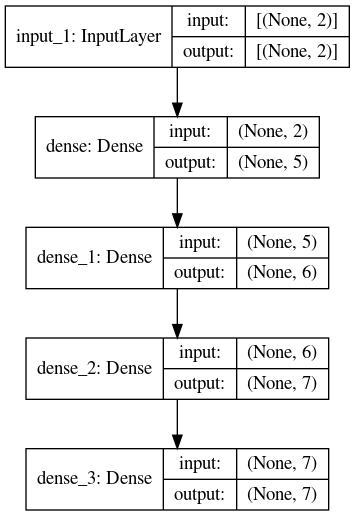

In [600]:
plot_model(model, to_file=path, show_shapes=True, show_layer_names=True)

In [601]:
import os

In [604]:
path = os.path.join(dir_model, save_name + f'.{v}')
path

'../saved_models/model_6.9'

In [605]:
model.save(path)

INFO:tensorflow:Assets written to: ../saved_models/model_6.9/assets


In [606]:
model

In [152]:
from tensorflow.keras.models import load_model

In [153]:
model = load_model(path)

In [157]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)